<a href="https://colab.research.google.com/github/fondofne/UTBK-2019-Analisis-Proses-Seleksi/blob/main/UTBK_2019_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# Eksplorasi Data
---
Dalam artikel ini, akan dibahas bagaimana persaingan dalam ujian masuk perguruan tinggi berbasis komputer (UTBK) tahun 2019 dan mengetahui kemungkinan passing grade untuk masing-masing jurusan di universitas perguruan tinggi.

In [3]:
majors_df = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/UTBK/majors.csv')
universities_df = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/UTBK/universities.csv')
score_humanities_df = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/UTBK/score_humanities.csv')
score_science_df = pd.read_csv('drive/My Drive/Colab Notebooks/Kaggle/UTBK/score_science.csv')


In [4]:
majors_df.sample(3)

Unnamed: 0  id_major  id_university        type             major_name  \
1278        1278   6121183            612     science             AKUAKULTUR   
2155        2155   3332047            333  humanities              MANAJEMEN   
1548        1548   7521013            752     science  PENDIDIKAN MATEMATIKA   

      capacity  
1278         6  
2155        40  
1548        72

In [5]:
universities_df.sample(3)

Unnamed: 0  id_university              university_name
38          38            354                ISI SURAKARTA
79          79            811        UNIVERSITAS PATTIMURA
53          53            383  UNIVERSITAS NEGERI SURABAYA

In [6]:
score_humanities_df.head(3)

Unnamed: 0  id_first_major  id_first_university  id_second_major  \
0           0         3322014                  332          3532154   
1           1         3212057                  321          3322022   
2           2         3722057                  372          1912042   

   id_second_university  id_user  score_eko  score_geo  score_kmb  score_kpu  \
0                   353       26        778        486        679        594   
1                   332       35        579        631        710        700   
2                   191       44        600        481        314        432   

   score_kua  score_mat  score_ppu  score_sej  score_sos  
0        643        686        559        392        676  
1        810        656        638        535        686  
2        522        494        461        467        574

In [7]:
score_science_df.head(3)

Unnamed: 0  id_first_major  id_first_university  id_second_major  \
0           0         3321065                  332          3331187   
1           1         3211015                  321          3611066   
2           2         3721093                  372          3551302   

   id_second_university  id_user  score_bio  score_fis  score_kim  score_kmb  \
0                   333        4        400        400        400        400   
1                   361       14        816        666        651        678   
2                   355       19        562        839        624        700   

   score_kpu  score_kua  score_mat  score_ppu  
0        400        400        400        400  
1        685        706        695        562  
2        781        464        551        668

Kita akan melihat informasi dari setiap dataset

In [8]:
print('\nInformasi mengenai dataframe jurusan: \n')
majors_df.info()
print('\nInformasi mengenai dataframe universitas: \n')
universities_df.info()


Informasi mengenai dataframe jurusan: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3167 non-null   int64 
 1   id_major       3167 non-null   int64 
 2   id_university  3167 non-null   int64 
 3   type           3167 non-null   object
 4   major_name     3167 non-null   object
 5   capacity       3167 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 148.6+ KB

Informasi mengenai dataframe universitas: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       85 non-null     int64 
 1   id_university    85 non-null     int64 
 2   university_name  85 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
print('\nInformasi mengenai nilai soshum (IPS): \n')
score_humanities_df.info()
print('\nInformasi mengenai nilai saintek (IPA): \n')
score_science_df.info()


Informasi mengenai nilai soshum (IPS): 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            61202 non-null  int64
 1   id_first_major        61202 non-null  int64
 2   id_first_university   61202 non-null  int64
 3   id_second_major       61202 non-null  int64
 4   id_second_university  61202 non-null  int64
 5   id_user               61202 non-null  int64
 6   score_eko             61202 non-null  int64
 7   score_geo             61202 non-null  int64
 8   score_kmb             61202 non-null  int64
 9   score_kpu             61202 non-null  int64
 10  score_kua             61202 non-null  int64
 11  score_mat             61202 non-null  int64
 12  score_ppu             61202 non-null  int64
 13  score_sej             61202 non-null  int64
 14  score_sos             61202 non-null  int64
dtypes: int64(15

# Membersihkan dan Menyederhanakan Data
---
Kita bisa melihat bahwa dari keempat dataframe, secara intuitif tidak memiliki data yang hilang (null). Bisa kita buktikan secara langsung:

In [10]:
print('Jumlah nilai hilang pada dataframe jurusan = ' + str(majors_df.isna().values.sum()))
print('Jumlah nilai hilang pada dataframe universitas = ' + str(universities_df.isna().values.sum()))
print('Jumlah nilai hilang pada dataframe nilai soshum = ' + str(score_humanities_df.isna().values.sum()))
print('Jumlah nilai hilang pada dataframe nilai saintek = ' + str(score_science_df.isna().values.sum()))

Jumlah nilai hilang pada dataframe jurusan = 0
Jumlah nilai hilang pada dataframe universitas = 0
Jumlah nilai hilang pada dataframe nilai soshum = 0
Jumlah nilai hilang pada dataframe nilai saintek = 0


Tabel keempat dataframe sangatlah tidak efisien. Setiap dataframe memiliki kolom tanpa nama yang memang ditujukan untuk menandai/sebagai indeks dari setiap data. Kita bisa membuang kolom tersebut dari semua dataframe. Kita juga bisa menjadikan tabel dataframe dapat dibaca dengan mudah

In [11]:
majors_df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)
universities_df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)
score_humanities_df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)
score_science_df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)

In [12]:
majors_df.rename({
    'id_major' : 'ID Jurusan',
    'id_university' : 'ID Universitas',
    'type' : 'Rumpun Bidang',
    'major_name' : 'Nama Jurusan',
    'capacity' : 'Kapasitas Total'
}, inplace = True, axis = 1)

universities_df.rename({
    'id_university' : 'ID Universitas',
    'university_name' : 'Nama Universitas'
}, inplace = True, axis = 1)

score_humanities_df.rename({
    'id_first_major' : 'Pilihan Jurusan Pertama',
    'id_first_university' : 'Pilihan Universitas Pertama',
    'id_second_major' : 'Pilihan Jurusan Kedua',
    'id_second_university' : 'Pilihan Universitas Kedua',
    'id_user' : 'ID Peserta',
    'score_eko' : 'Nilai Ekonomi',
    'score_geo' : 'Nilai Geografi',
    'score_kmb' : 'Nilai PBM',
    'score_kpu' : 'Nilai PU',
    'score_kua' : 'Nilai PK',
    'score_mat' : 'Nilai Matematika',
    'score_ppu' : 'Nilai PPU',
    'score_sej' : 'Nilai Sejarah',
    'score_sos' : 'Nilai Sosiologi'
}, inplace = True, axis = 1)

score_science_df.rename({
    'id_first_major' : 'Pilihan Jurusan Pertama',
    'id_first_university' : 'Pilihan Universitas Pertama',
    'id_second_major' : 'Pilihan Jurusan Kedua',
    'id_second_university' : 'Pilihan Universitas Kedua',
    'id_user' : 'ID Peserta',
    'score_bio' : 'Nilai Biologi',
    'score_fis' : 'Nilai Fisika',
    'score_kmb' : 'Nilai PBM',
    'score_kpu' : 'Nilai PU',
    'score_kua' : 'Nilai PK',
    'score_mat' : 'Nilai Matematika',
    'score_ppu' : 'Nilai PPU',
    'score_kim' : 'Nilai Kimia'
}, inplace = True, axis = 1)

In [13]:
print('Dataframe jurusan setelah diatur : \n')
display(majors_df.head(3))
print('\nDataframe universitas setelah diatur : \n')
display(universities_df.head(3))
print('\nDataframe nilai soshum setelah diatur : \n')
display(score_humanities_df.head(3))
print('Dataframe nilai saintek setelah diatur : \n')
display(score_science_df.head(3))


Dataframe jurusan setelah diatur : 



ID Jurusan  ID Universitas Rumpun Bidang             Nama Jurusan  \
0     1111014             111       science  PENDIDIKAN DOKTER HEWAN   
1     1111022             111       science             TEKNIK SIPIL   
2     1111037             111       science             TEKNIK MESIN   

   Kapasitas Total  
0               88  
1               64  
2               48


Dataframe universitas setelah diatur : 



ID Universitas          Nama Universitas
0             111   UNIVERSITAS SYIAH KUALA
1             112  UNIVERSITAS MALIKUSSALEH
2             113    UNIVERSITAS TEUKU UMAR


Dataframe nilai soshum setelah diatur : 



Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0                  3322014                          332   
1                  3212057                          321   
2                  3722057                          372   

   Pilihan Jurusan Kedua  Pilihan Universitas Kedua  ID Peserta  \
0                3532154                        353          26   
1                3322022                        332          35   
2                1912042                        191          44   

   Nilai Ekonomi  Nilai Geografi  Nilai PBM  Nilai PU  Nilai PK  \
0            778             486        679       594       643   
1            579             631        710       700       810   
2            600             481        314       432       522   

   Nilai Matematika  Nilai PPU  Nilai Sejarah  Nilai Sosiologi  
0               686        559            392              676  
1               656        638            535              686  
2               494        461            467              574

Dataframe nilai saintek setelah diatur : 



Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0                  3321065                          332   
1                  3211015                          321   
2                  3721093                          372   

   Pilihan Jurusan Kedua  Pilihan Universitas Kedua  ID Peserta  \
0                3331187                        333           4   
1                3611066                        361          14   
2                3551302                        355          19   

   Nilai Biologi  Nilai Fisika  Nilai Kimia  Nilai PBM  Nilai PU  Nilai PK  \
0            400           400          400        400       400       400   
1            816           666          651        678       685       706   
2            562           839          624        700       781       464   

   Nilai Matematika  Nilai PPU  
0               400        400  
1               695        562  
2               551        668

Selanjutnya untuk mempermudah analisis, kita gabungkan data jurusan dan universitas

In [14]:
univ_maj_df = pd.merge(majors_df, universities_df, how = 'inner',  on = 'ID Universitas' )
univ_maj_df.head()

ID Jurusan  ID Universitas Rumpun Bidang             Nama Jurusan  \
0     1111014             111       science  PENDIDIKAN DOKTER HEWAN   
1     1111022             111       science             TEKNIK SIPIL   
2     1111037             111       science             TEKNIK MESIN   
3     1111045             111       science             TEKNIK KIMIA   
4     1111053             111       science               ARSITEKTUR   

   Kapasitas Total         Nama Universitas  
0               88  UNIVERSITAS SYIAH KUALA  
1               64  UNIVERSITAS SYIAH KUALA  
2               48  UNIVERSITAS SYIAH KUALA  
3               48  UNIVERSITAS SYIAH KUALA  
4               48  UNIVERSITAS SYIAH KUALA

Kita juga dapat menyatukan data hasil tes untuk saintek dan soshum menjadi satu dataset. Namun untuk mempermudah, kita perlu menghitung nilai UTBK dari masing-masing kelompok rumpun bidang. Perhitungan nilai UTBK diberikan dengan cara berikut$^{[1]}$.

Rumpun bidang saintek:

- Nilai rata-rata TKA Saintek = Nilai dari 4 mata pelajaran (Biologi, Fisika, Kimia, Matematika Sains) dijumlah kemudian dibagi 4.
- Nilai rata-rata TPS Saintek = Nilai dari 4 jenis soal TPS (PU, PBM, PBU, PK) dijumlah kemudian dibagi 4. 
- Nilai rata-rata total = Nilai seluruh mata pelajaran dijumlah kemudian dibagi 8. 

Rumpun bidang soshum:

- Nilai rata-rata TKA Soshum = Nilai dari 5 mata pelajaran (Matematika, Sejarah, Sosiologi, Geografi, Ekonomi) dijumlah kemudian dibagi 5.
- Nilai rata-rata TPS Soshum = Nilai dari 4 jenis soal TPS (PU, PBM, PBU, PK) dijumlah kemudian dibagi 4.
- Nilai rata-rata total = Nilai seluruh mata pelajaran dijumlah kemudian dibagi 9. 

In [15]:
score_science_df['Nilai TKA Saintek'] = score_science_df.loc[:,['Nilai Fisika', 'Nilai Biologi', 'Nilai Kimia', 'Nilai Matematika']].mean(axis = 1)
score_science_df['Nilai TPS'] = score_science_df.loc[:,['Nilai PBM','Nilai PU','Nilai PPU', 'Nilai PK']].mean(axis = 1)
score_science_df['Nilai UTBK'] = score_science_df.loc[:,['Nilai TKA Saintek', 'Nilai TPS']].mean(axis = 1)

score_humanities_df['Nilai TKA Soshum'] = score_humanities_df.loc[:,['Nilai Sejarah', 'Nilai Geografi', 'Nilai Matematika', 'Nilai Sosiologi','Nilai Ekonomi']].mean(axis = 1)
score_humanities_df['Nilai TPS'] = score_humanities_df.loc[:,['Nilai PBM', 'Nilai PU', 'Nilai PPU', 'Nilai PK']].mean(axis = 1)
score_humanities_df['Nilai UTBK'] = score_humanities_df.loc[:,['Nilai TKA Soshum','Nilai TPS']].mean(axis = 1)

In [16]:
print('Data nilai saintek peserta: ')
display(score_science_df.head())

print('\nData nilai soshum peserta: ')
display(score_humanities_df.head())

Data nilai saintek peserta: 


Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0                  3321065                          332   
1                  3211015                          321   
2                  3721093                          372   
3                  3321096                          332   
4                  5211104                          521   

   Pilihan Jurusan Kedua  Pilihan Universitas Kedua  ID Peserta  \
0                3331187                        333           4   
1                3611066                        361          14   
2                3551302                        355          19   
3                3551194                        355          23   
4                5211085                        521          28   

   Nilai Biologi  Nilai Fisika  Nilai Kimia  Nilai PBM  Nilai PU  Nilai PK  \
0            400           400          400        400       400       400   
1            816           666          651        678       685       706   
2            562           839          624        700       781       464   
3            700           669          692        679       692       813   
4            461           619          441        593       563       500   

   Nilai Matematika  Nilai PPU  Nilai TKA Saintek  Nilai TPS  Nilai UTBK  
0               400        400             400.00     400.00     400.000  
1               695        562             707.00     657.75     682.375  
2               551        668             644.00     653.25     648.625  
3               507        573             642.00     689.25     665.625  
4               666        370             546.75     506.50     526.625


Data nilai soshum peserta: 


Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0                  3322014                          332   
1                  3212057                          321   
2                  3722057                          372   
3                  3212081                          321   
4                  3812106                          381   

   Pilihan Jurusan Kedua  Pilihan Universitas Kedua  ID Peserta  \
0                3532154                        353          26   
1                3322022                        332          35   
2                1912042                        191          44   
3                3212301                        321          55   
4                3852034                        385         171   

   Nilai Ekonomi  Nilai Geografi  Nilai PBM  Nilai PU  Nilai PK  \
0            778             486        679       594       643   
1            579             631        710       700       810   
2            600             481        314       432       522   
3            559             563        646       638       591   
4            838             734        654       613       690   

   Nilai Matematika  Nilai PPU  Nilai Sejarah  Nilai Sosiologi  \
0               686        559            392              676   
1               656        638            535              686   
2               494        461            467              574   
3               538        585            647              589   
4               315        628            660              674   

   Nilai TKA Soshum  Nilai TPS  Nilai UTBK  
0             603.6     618.75     611.175  
1             617.4     714.50     665.950  
2             523.2     432.25     477.725  
3             579.2     615.00     597.100  
4             644.2     646.25     645.225

Seperti ujian UTBK/SBMPTN di tahun-tahun sebelumnya, ada kemungkinan peserta memilih ujian **IPC** yang berarti campuran. Artinya peserta mengikuti saintek dan soshum sekaligus dengan satu ID Peserta saja. Namun, untuk kasus UTBK 2019 kondisinya berbeda. Peserta dapat mengikuti lebih dari satu kali UTBK dan akan mendapatkan ID Peserta yang berbeda dengan ID peserta UTBK sebelumnya. Jika ingin mengambil IPC, maka peserta harus mendaftar dua kali UTBK dan mendapatkan ID Peserta yang berbeda pula$^{[2]}$. Kita bisa membuktikan bahwa tidak ada ID Peserta yang sama di kelompok saintek dan soshum.

In [17]:
PesertaIPC = sum(score_science_df['ID Peserta'].isin(score_humanities_df['ID Peserta']))
print('Jumlah peserta yang mengambil ujian campuran saintek dan soshum ada ' + str(PesertaIPC) + ' peserta')

Jumlah peserta yang mengambil ujian campuran saintek dan soshum ada 0 peserta


Selanjutnya kita bisa menggabungkan kedua dataset hasil untuk saintek dan soshum menjadi satu dataset hasil UTBK. Namun kita perlu memberi label/kolom baru untuk menunjukkan rumpun bidang saintek dan soshum.

In [18]:
score_science_df['Rumpun Bidang'] = 'science'
score_humanities_df['Rumpun Bidang'] = 'humanities'

In [19]:
score_utbk_df = pd.concat([score_science_df,score_humanities_df])
score_utbk_df

Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0                      3321065                          332   
1                      3211015                          321   
2                      3721093                          372   
3                      3321096                          332   
4                      5211104                          521   
...                        ...                          ...   
61197                  3552127                          355   
61198                  3512053                          351   
61199                  6212115                          621   
61200                  3812056                          381   
61201                  3562362                          356   

       Pilihan Jurusan Kedua  Pilihan Universitas Kedua  ID Peserta  \
0                    3331187                        333           4   
1                    3611066                        361          14   
2                    3551302                        355          19   
3                    3551194                        355          23   
4                    5211085                        521          28   
...                      ...                        ...         ...   
61197                6212115                        621      328356   
61198                3532057                        353      328357   
61199                6212107                        621      328364   
61200                3822012                        382      328366   
61201                3562192                        356      328373   

       Nilai Biologi  Nilai Fisika  Nilai Kimia  Nilai PBM  Nilai PU  ...  \
0              400.0         400.0        400.0        400       400  ...   
1              816.0         666.0        651.0        678       685  ...   
2              562.0         839.0        624.0        700       781  ...   
3              700.0         669.0        692.0        679       692  ...   
4              461.0         619.0        441.0        593       563  ...   
...              ...           ...          ...        ...       ...  ...   
61197            NaN           NaN          NaN        498       522  ...   
61198            NaN           NaN          NaN        548       576  ...   
61199            NaN           NaN          NaN        567       486  ...   
61200            NaN           NaN          NaN        634       672  ...   
61201            NaN           NaN          NaN        468       457  ...   

       Nilai PPU  Nilai TKA Saintek  Nilai TPS  Nilai UTBK  Rumpun Bidang  \
0            400             400.00     400.00     400.000        science   
1            562             707.00     657.75     682.375        science   
2            668             644.00     653.25     648.625        science   
3            573             642.00     689.25     665.625        science   
4            370             546.75     506.50     526.625        science   
...          ...                ...        ...         ...            ...   
61197        541                NaN     533.50     531.850     humanities   
61198        548                NaN     553.25     525.425     humanities   
61199        518                NaN     515.75     498.975     humanities   
61200        504                NaN     584.25     572.325     humanities   
61201        524                NaN     494.75     530.175     humanities   

       Nilai Ekonomi Nilai Geografi  Nilai Sejarah  Nilai Sosiologi  \
0                NaN            NaN            NaN              NaN   
1                NaN            NaN            NaN              NaN   
2                NaN            NaN            NaN              NaN   
3                NaN            NaN            NaN              NaN   
4                NaN            NaN            NaN              NaN   
...              ...            ...            ...              ...   
61197          521.0          497.0          599.0

Kita bisa mengatur dataframe gabungan kita sedemikian rupa agar mudah dibaca dengan mengurutkan data menurut ID Peserta.


In [20]:
score_utbk_df = score_utbk_df[[
    'ID Peserta', 'Pilihan Jurusan Pertama', 'Pilihan Universitas Pertama', 'Pilihan Jurusan Kedua', 'Pilihan Universitas Kedua',
    'Rumpun Bidang', 'Nilai TPS', 'Nilai TKA Saintek', 'Nilai TKA Soshum', 'Nilai UTBK',
    'Nilai PBM', 'Nilai PU', 'Nilai PPU', 'Nilai PK',
    'Nilai Fisika', 'Nilai Kimia', 'Nilai Biologi', 'Nilai Matematika',
    'Nilai Geografi', 'Nilai Sejarah', 'Nilai Ekonomi', 'Nilai Sosiologi'
]].sort_values(by = 'ID Peserta')
score_utbk_df.head()

ID Peserta  Pilihan Jurusan Pertama  Pilihan Universitas Pertama  \
0           4                  3321065                          332   
1          14                  3211015                          321   
2          19                  3721093                          372   
3          23                  3321096                          332   
0          26                  3322014                          332   

   Pilihan Jurusan Kedua  Pilihan Universitas Kedua Rumpun Bidang  Nilai TPS  \
0                3331187                        333       science     400.00   
1                3611066                        361       science     657.75   
2                3551302                        355       science     653.25   
3                3551194                        355       science     689.25   
0                3532154                        353    humanities     618.75   

   Nilai TKA Saintek  Nilai TKA Soshum  Nilai UTBK  ...  Nilai PPU  Nilai PK  \
0              400.0               NaN     400.000  ...        400       400   
1              707.0               NaN     682.375  ...        562       706   
2              644.0               NaN     648.625  ...        668       464   
3              642.0               NaN     665.625  ...        573       813   
0                NaN             603.6     611.175  ...        559       643   

   Nilai Fisika  Nilai Kimia  Nilai Biologi  Nilai Matematika  Nilai Geografi  \
0         400.0        400.0          400.0               400             NaN   
1         666.0        651.0          816.0               695             NaN   
2         839.0        624.0          562.0               551             NaN   
3         669.0        692.0          700.0               507             NaN   
0           NaN          NaN            NaN               686           486.0   

   Nilai Sejarah  Nilai Ekonomi  Nilai Sosiologi  
0            NaN            NaN              NaN  
1            NaN            NaN              NaN  
2            NaN            NaN              NaN  
3            NaN            NaN              NaN  
0          392.0          778.0            676.0  

[5 rows x 22 columns]

# Distribusi Kapasitas Jurusan dan Universitas
---
Pada tahun 2019, tidak seluruh kapasitas jurusan di universitas dapat dimasuki melalui jalur UTBK. Menteri Nasir menjelaskan pola seleksi masuk PTN tahun 2019 tetap akan dilaksanakan melalui tiga jalur yaitu, yakni SNMPTN, SBMPTN(UTBK) dan Ujian Mandiri, dengan masing-masing  daya tampung SNMPTN minimal 20%, SBMPTN(UTBK) minimal 40% dan Seleksi Mandiri maksimal 30% dari kuota daya tampung tiap prodi di PTN. $^{[3]}$. Untuk mempermudah perhitungan, kita dapat mengasumsikan bahwa untuk semua jurusan di semua universitas memberikan 40% kuota untuk UTBK 2019. Dengan demikian kita dapat menambahkan kolom kuota UTBK pada dataframe jurusan dan universitas.

## Kapasitas Penerimaan Mahasiswa Baru Saintek dan Soshum
---
Di subbagian ini kita akan membahas perbandingan antara penerimaan total mahasiswa baru saintek dan soshum dan juga kapasitas jurusan saintek dan soshum

In [21]:
univ_maj_df['Kapasitas UTBK 2019'] = (0.4*univ_maj_df['Kapasitas Total']).apply(np.floor).astype(int)
univ_maj_df.head()

ID Jurusan  ID Universitas Rumpun Bidang             Nama Jurusan  \
0     1111014             111       science  PENDIDIKAN DOKTER HEWAN   
1     1111022             111       science             TEKNIK SIPIL   
2     1111037             111       science             TEKNIK MESIN   
3     1111045             111       science             TEKNIK KIMIA   
4     1111053             111       science               ARSITEKTUR   

   Kapasitas Total         Nama Universitas  Kapasitas UTBK 2019  
0               88  UNIVERSITAS SYIAH KUALA                   35  
1               64  UNIVERSITAS SYIAH KUALA                   25  
2               48  UNIVERSITAS SYIAH KUALA                   19  
3               48  UNIVERSITAS SYIAH KUALA                   19  
4               48  UNIVERSITAS SYIAH KUALA                   19

Selanjutnya kita bisa melihat distribusi kapasitas penerimaan mahasiswa baru melalui UTBK 2019

In [22]:
print('Kapasitas penerimaan mahasiswa baru melalui UTBK 2019: \n' + str(univ_maj_df.groupby('Rumpun Bidang')['Kapasitas UTBK 2019'].sum()))

Kapasitas penerimaan mahasiswa baru melalui UTBK 2019: 
Rumpun Bidang
humanities    31877
science       32111
Name: Kapasitas UTBK 2019, dtype: int64


Text(0.5, 1.0, 'Perbandingan Kapasitas Penerimaan Mahasiswa Baru UTBK 2019')

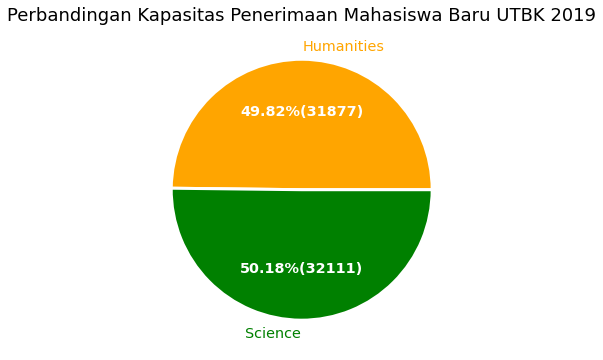

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    univ_maj_df.groupby('Rumpun Bidang')['Kapasitas UTBK 2019'].sum(), 
    labels = ['Humanities','Science'],
    autopct = lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*univ_maj_df['Kapasitas UTBK 2019'].sum()),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = ['orange','green'])
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
# Style just the percent values.
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Perbandingan Kapasitas Penerimaan Mahasiswa Baru UTBK 2019', fontsize=18)


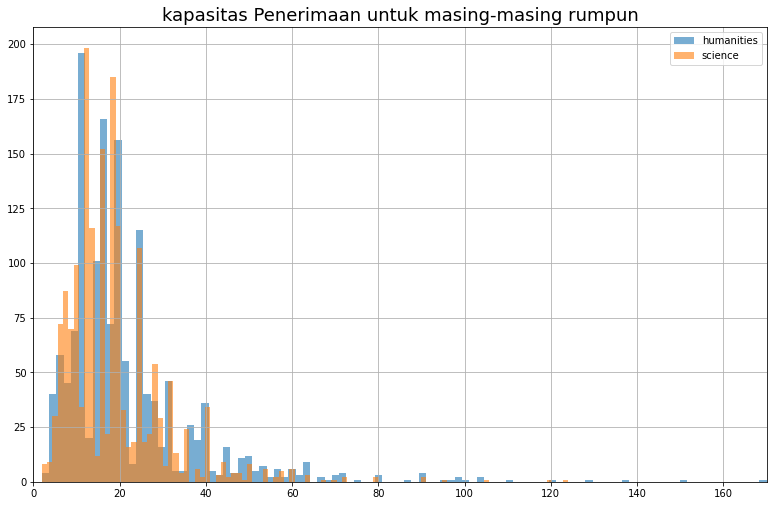

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))
fig.tight_layout(pad = 5)

#plot distribution of point by rumpun bidang
univ_maj_df.groupby('Rumpun Bidang')['Kapasitas UTBK 2019'].hist(bins = 100, alpha = 0.6, legend = True)
ax.set_title('kapasitas Penerimaan untuk masing-masing rumpun', fontsize = 18)
ax.legend(loc = 'best')
ax.set_xlim(0,max(univ_maj_df['Kapasitas UTBK 2019']))

plt.show()

Kita bisa melihat bahwa distribusi kapasitas untuk rumpun saintek dan soshum tidaklah berbeda jauh. Seperti yang telah kita ukur sebelumnya, kita bisa melihat bahwa jumlah peserta untuk rumpun bidang saintek adalah 86570 peserta sedangkan jumlah peserta untuk rumpun bidang soshum adalah 61202 peserta. Dengan demikian kita bisa melihat tingkat persaingan untuk saintek jauh lebih besar daripada soshum.

Selanjutnya kita bisa melihat secara umum distribusi penerimaan mahasiswa baru untuk setiap kampus

In [25]:
kap_univ_df = univ_maj_df.groupby(
    ['Nama Universitas', 'Rumpun Bidang']
    )['Kapasitas UTBK 2019'].sum().unstack().sort_values(['Nama Universitas'])
kap_univ_df

Rumpun Bidang                        humanities  science
Nama Universitas                                        
INSTITUT PERTANIAN BOGOR                    NaN    666.0
INSTITUT TEKNOLOGI BANDUNG                 82.0    569.0
INSTITUT TEKNOLOGI KALIMANTAN               NaN    231.0
INSTITUT TEKNOLOGI SEPULUH NOPEMBER        27.0    599.0
INSTITUT TEKNOLOGI SUMATERA                 NaN    772.0
...                                         ...      ...
UNIVERSITAS TRUNOJOYO MADURA              606.0    382.0
UNIVERSITAS UDAYANA                       536.0    631.0
UPN "VETERAN" JAKARTA                     320.0    225.0
UPN "VETERAN" JAWA TIMUR                  388.0    344.0
UPN "VETERAN" YOGYAKARTA                  244.0    392.0

[85 rows x 2 columns]

In [26]:
#Menjadikan NaN sebagai 0, yang berarti kampus tersebut tidak menerima mahasiswa baru untuk rumpun bidang tertentu
kap_univ_df.fillna(0, inplace = True)
kap_univ_df[['humanities','science']] = kap_univ_df[['humanities','science']].astype(int)
kap_univ_df

Rumpun Bidang                        humanities  science
Nama Universitas                                        
INSTITUT PERTANIAN BOGOR                      0      666
INSTITUT TEKNOLOGI BANDUNG                   82      569
INSTITUT TEKNOLOGI KALIMANTAN                 0      231
INSTITUT TEKNOLOGI SEPULUH NOPEMBER          27      599
INSTITUT TEKNOLOGI SUMATERA                   0      772
...                                         ...      ...
UNIVERSITAS TRUNOJOYO MADURA                606      382
UNIVERSITAS UDAYANA                         536      631
UPN "VETERAN" JAKARTA                       320      225
UPN "VETERAN" JAWA TIMUR                    388      344
UPN "VETERAN" YOGYAKARTA                    244      392

[85 rows x 2 columns]

[Text(0.5, 0, 'Kapasitas Soshum')]

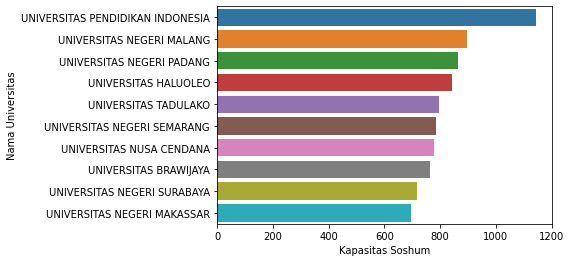

In [27]:
sns.barplot(data=kap_univ_df.reset_index().sort_values(['humanities'], ascending = False)[0:10], x='humanities', y='Nama Universitas').set(xlabel = 'Kapasitas Soshum')


[Text(0.5, 0, 'Kapasitas Saintek')]

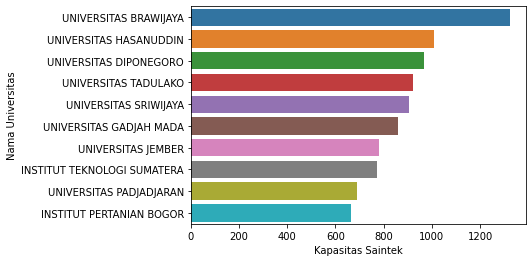

In [28]:
sns.barplot(data=kap_univ_df.reset_index().sort_values(['science'], ascending = False)[0:10], x='science', y='Nama Universitas').set(xlabel = 'Kapasitas Saintek')



dan kita bisa melihat distribusi jurusan dengan kapasitas pembukaan terbesar




In [29]:
univ_maj_df['Jurusan(Kampus)'] = univ_maj_df['Nama Jurusan'] + ' (' + univ_maj_df['Nama Universitas'] + ')'

Rumpun = dict(tuple(univ_maj_df.groupby('Rumpun Bidang')))

display(Rumpun['humanities'].sort_values(['Kapasitas UTBK 2019'], ascending = False).head())
display(Rumpun['science'].sort_values(['Kapasitas UTBK 2019'], ascending = False).head())


ID Jurusan  ID Universitas Rumpun Bidang Nama Jurusan  Kapasitas Total  \
1343     3552054             355    humanities        HUKUM              425   
2734     7312163             731    humanities   ILMU HUKUM              375   
2423     6312116             631    humanities   ILMU HUKUM              347   
2636     7212115             721    humanities   ILMU HUKUM              324   
2377     6212042             621    humanities   ILMU HUKUM              300   

               Nama Universitas  Kapasitas UTBK 2019  \
1343     UNIVERSITAS DIPONEGORO                  170   
2734       UNIVERSITAS TADULAKO                  150   
2423   UNIVERSITAS NUSA CENDANA                  138   
2636  UNIVERSITAS SAM RATULANGI                  129   
2377        UNIVERSITAS MATARAM                  120   

                             Jurusan(Kampus)  
1343          HUKUM (UNIVERSITAS DIPONEGORO)  
2734       ILMU HUKUM (UNIVERSITAS TADULAKO)  
2423   ILMU HUKUM (UNIVERSITAS NUSA CENDANA)  
2636  ILMU HUKUM (UNIVERSITAS SAM RATULANGI)  
2377        ILMU HUKUM (UNIVERSITAS MATARAM)

ID Jurusan  ID Universitas Rumpun Bidang  \
1686     3721263             372       science   
2694     7311063             731       science   
1688     3721286             372       science   
952      3321073             332       science   
2396     6311113             631       science   

                                   Nama Jurusan  Kapasitas Total  \
1686                           AGROEKOTEKNOLOGI              312   
2694                                  KEHUTANAN              300   
1688                                 PETERNAKAN              264   
952   SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)              238   
2396                            ILMU PETERNAKAN              225   

                Nama Universitas  Kapasitas UTBK 2019  \
1686       UNIVERSITAS BRAWIJAYA                  124   
2694        UNIVERSITAS TADULAKO                  120   
1688       UNIVERSITAS BRAWIJAYA                  105   
952   INSTITUT TEKNOLOGI BANDUNG                   95   
2396    UNIVERSITAS NUSA CENDANA                   90   

                                        Jurusan(Kampus)  
1686           AGROEKOTEKNOLOGI (UNIVERSITAS BRAWIJAYA)  
2694                   KEHUTANAN (UNIVERSITAS TADULAKO)  
1688                 PETERNAKAN (UNIVERSITAS BRAWIJAYA)  
952   SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI) (INS...  
2396         ILMU PETERNAKAN (UNIVERSITAS NUSA CENDANA)

[Text(0, 0.5, 'Nama Jurusan (Universitas)')]

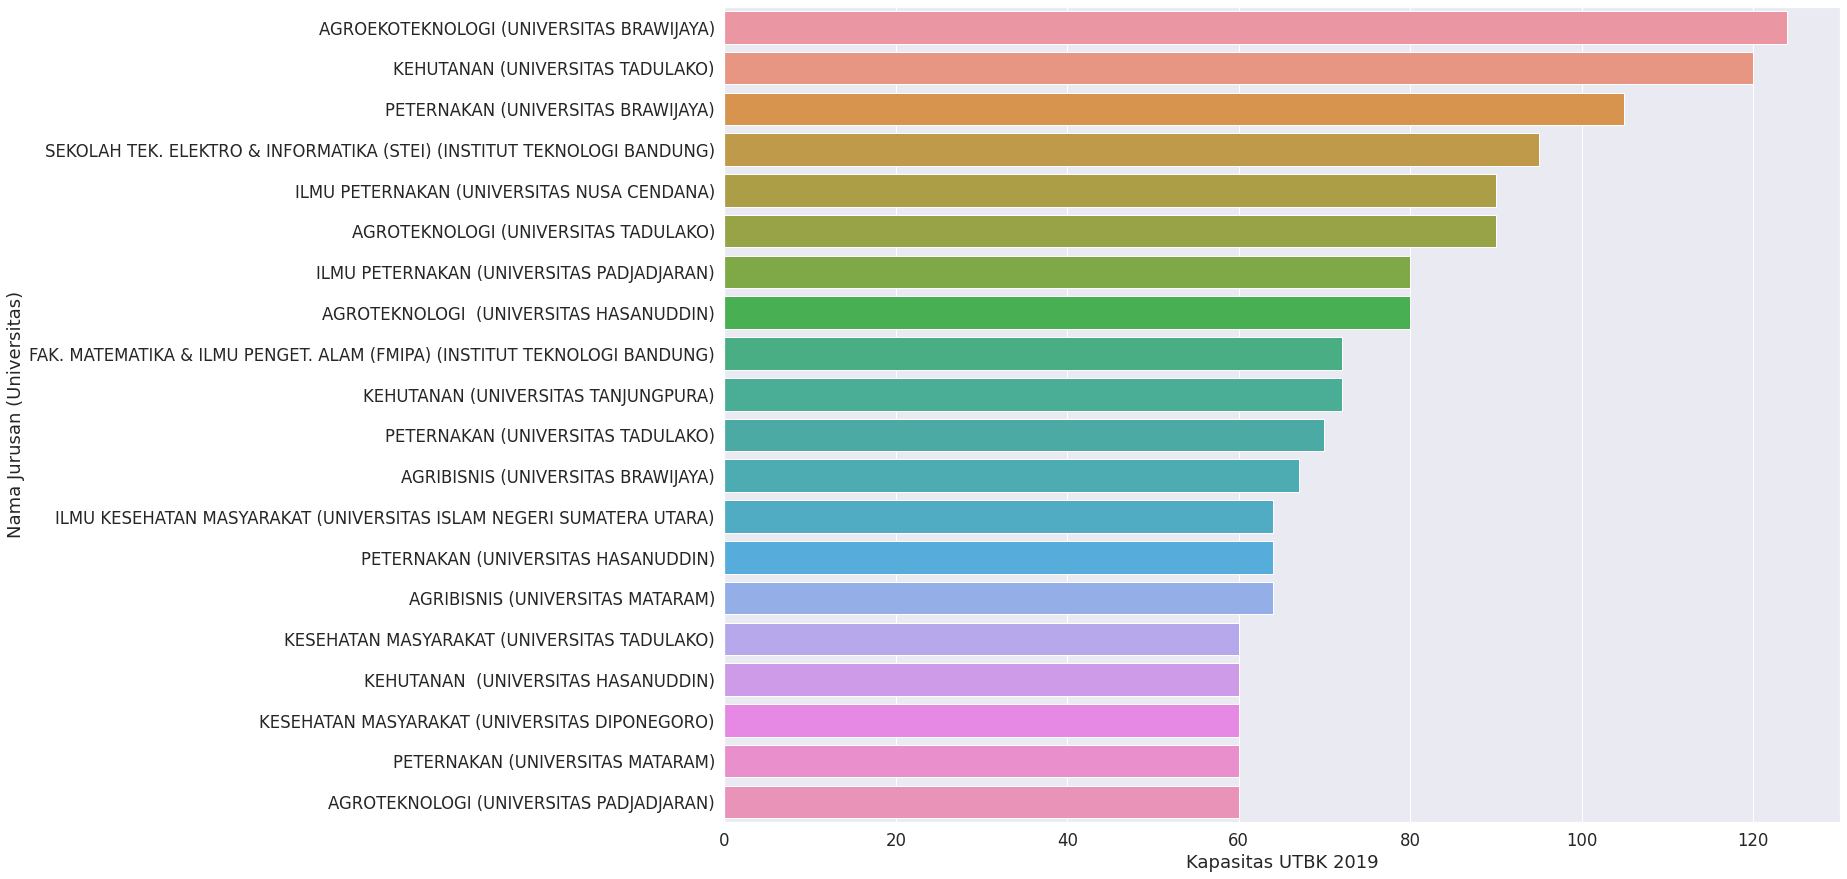

In [30]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=Rumpun['science'].sort_values(['Kapasitas UTBK 2019'], ascending = False)[0:20], x='Kapasitas UTBK 2019', y='Jurusan(Kampus)').set(ylabel = 'Nama Jurusan (Universitas)')


Text(0.5, 1.0, 'Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Rumpun Bidang Soshum')

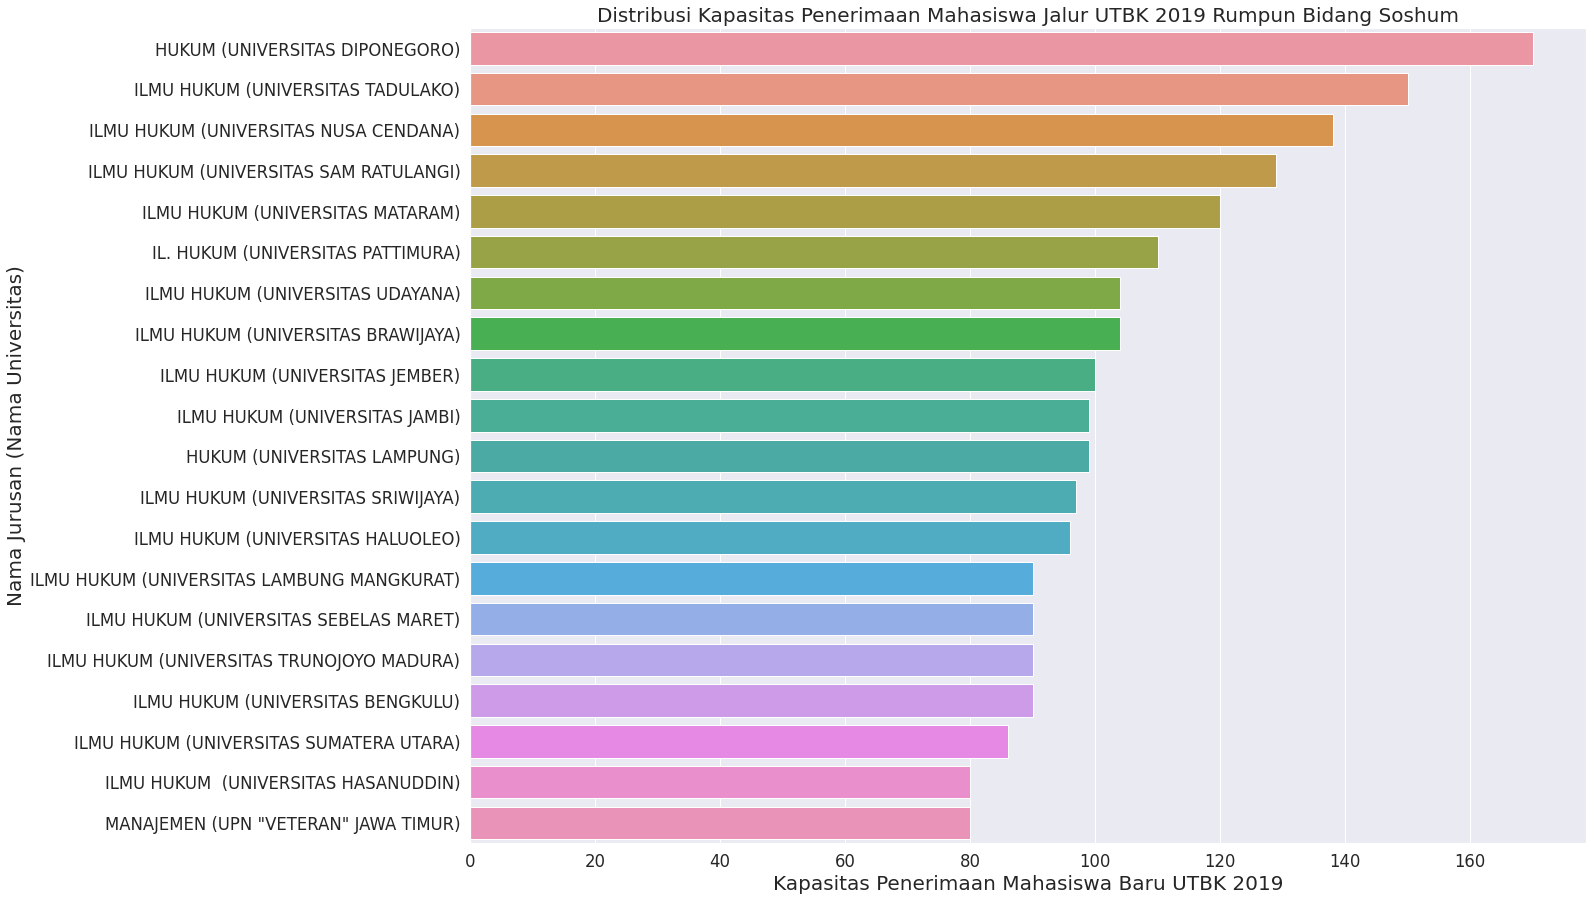

In [31]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=Rumpun['humanities'].sort_values(['Kapasitas UTBK 2019'], ascending = False)[0:20], x='Kapasitas UTBK 2019', y='Jurusan(Kampus)')
plt.xlabel('Kapasitas Penerimaan Mahasiswa Baru UTBK 2019', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Rumpun Bidang Soshum', fontsize = 20)


Selanjutnya kita bisa mengecek distribusi kapasitas jurusan untuk kampus tertentu, misalkan untuk UI

In [32]:
Kampus = dict(tuple(univ_maj_df.groupby('Nama Universitas')))
UI_rumpun = dict(tuple(Kampus['UNIVERSITAS INDONESIA'].groupby('Rumpun Bidang')))
display(UI_rumpun['humanities'].sort_values(['Kapasitas UTBK 2019'], ascending = False).head(3))
display(UI_rumpun['science'].sort_values(['Kapasitas UTBK 2019'], ascending = False).head(3))


ID Jurusan  ID Universitas Rumpun Bidang    Nama Jurusan  \
791     3212011             321    humanities      ILMU HUKUM   
805     3212154             321    humanities       MANAJEMEN   
794     3212042             321    humanities  ILMU PSIKOLOGI   

     Kapasitas Total       Nama Universitas  Kapasitas UTBK 2019  \
791              167  UNIVERSITAS INDONESIA                   66   
805               84  UNIVERSITAS INDONESIA                   33   
794               80  UNIVERSITAS INDONESIA                   32   

                            Jurusan(Kampus)  
791      ILMU HUKUM (UNIVERSITAS INDONESIA)  
805       MANAJEMEN (UNIVERSITAS INDONESIA)  
794  ILMU PSIKOLOGI (UNIVERSITAS INDONESIA)

ID Jurusan  ID Universitas Rumpun Bidang       Nama Jurusan  \
759     3211015             321       science  PENDIDIKAN DOKTER   
774     3211166             321       science      ILMU KOMPUTER   
780     3211224             321       science   SISTEM INFORMASI   

     Kapasitas Total       Nama Universitas  Kapasitas UTBK 2019  \
759               72  UNIVERSITAS INDONESIA                   28   
774               60  UNIVERSITAS INDONESIA                   24   
780               60  UNIVERSITAS INDONESIA                   24   

                               Jurusan(Kampus)  
759  PENDIDIKAN DOKTER (UNIVERSITAS INDONESIA)  
774      ILMU KOMPUTER (UNIVERSITAS INDONESIA)  
780   SISTEM INFORMASI (UNIVERSITAS INDONESIA)

Text(0.5, 1.0, 'Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Universitas Indonesia Rumpun Bidang Soshum')

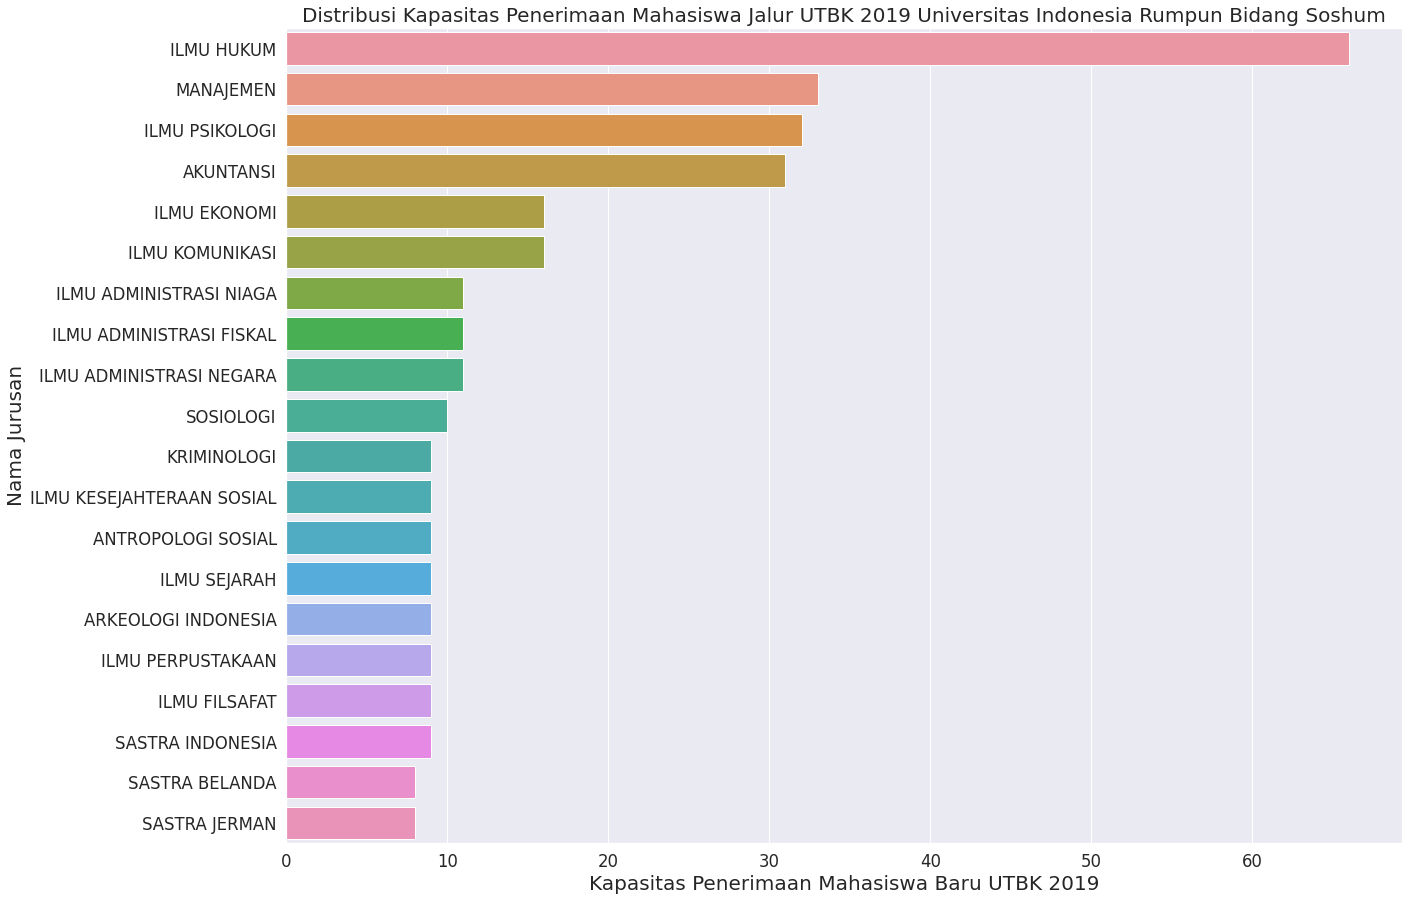

In [33]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=UI_rumpun['humanities'].sort_values(['Kapasitas UTBK 2019'], ascending = False)[0:20], x='Kapasitas UTBK 2019', y='Nama Jurusan')
plt.xlabel('Kapasitas Penerimaan Mahasiswa Baru UTBK 2019', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Universitas Indonesia Rumpun Bidang Soshum', fontsize = 20)


Text(0.5, 1.0, 'Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Universitas Indonesia Rumpun Bidang Saintek')

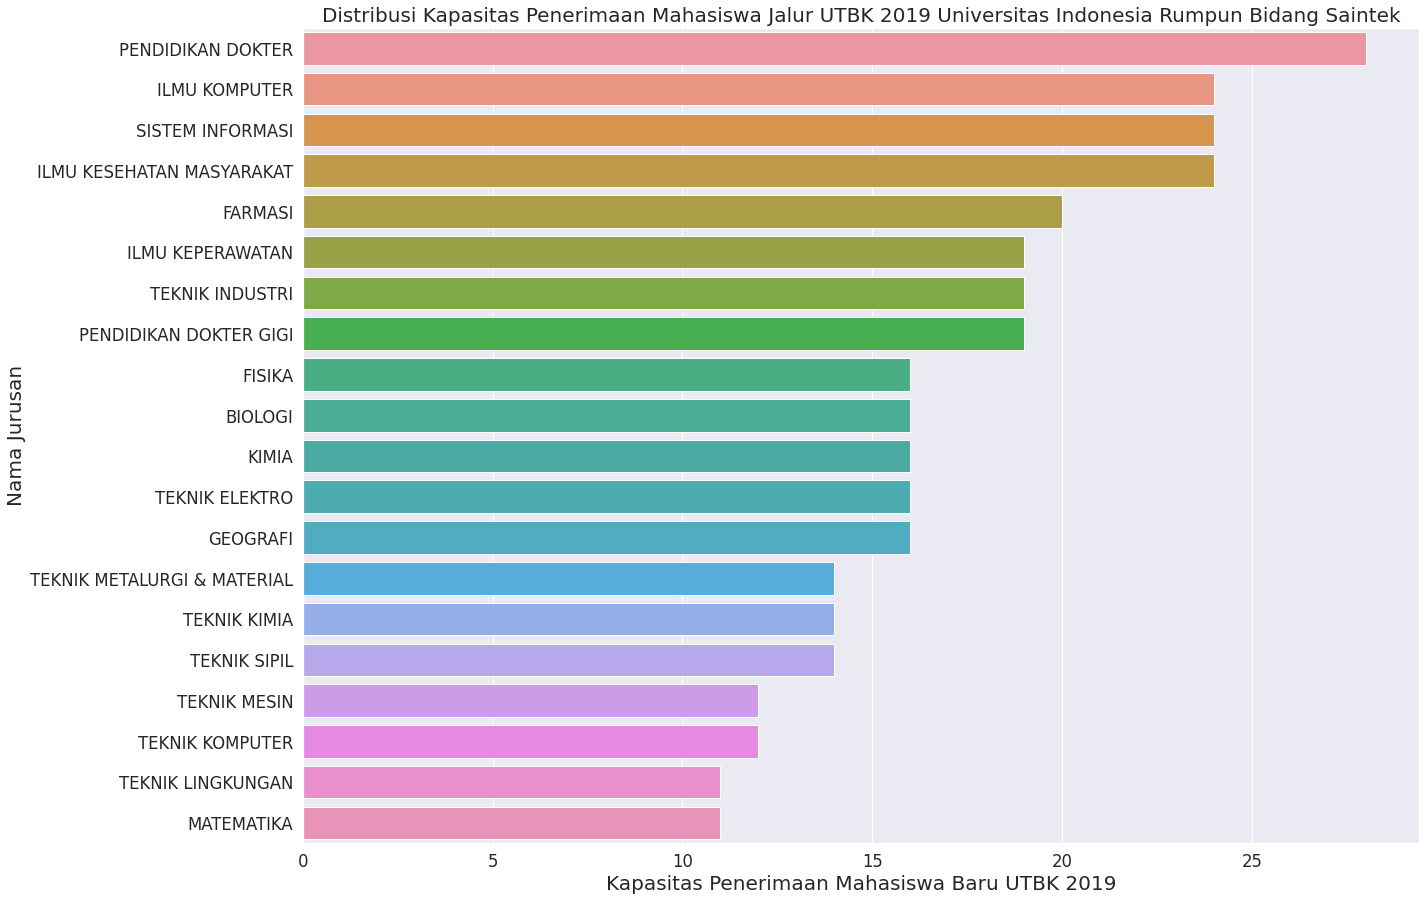

In [34]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=UI_rumpun['science'].sort_values(['Kapasitas UTBK 2019'], ascending = False)[0:20], x='Kapasitas UTBK 2019', y='Nama Jurusan')
plt.xlabel('Kapasitas Penerimaan Mahasiswa Baru UTBK 2019', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Kapasitas Penerimaan Mahasiswa Jalur UTBK 2019 Universitas Indonesia Rumpun Bidang Saintek', fontsize = 20)


Atau kita dapat melihat universitas mana dengan jurusan yang kita inginkan yang memiliki kapasitas paling banyak. Misalkan kita ingin mencari tahu universitas mana yang memiliki kapasitas kedokteran paling tinggi

In [35]:
Kedokteran = univ_maj_df[(univ_maj_df['Nama Jurusan'] == 'KEDOKTERAN') | (univ_maj_df['Nama Jurusan'] == 'FAKULTAS KEDOKTERAN') | (univ_maj_df['Nama Jurusan'] == 'PENDIDIKAN DOKTER')].sort_values(['Kapasitas UTBK 2019'], ascending = False)
Kedokteran.head()

ID Jurusan  ID Universitas Rumpun Bidang       Nama Jurusan  \
2455     7111076             711       science  PENDIDIKAN DOKTER   
2269     6111014             611       science  PENDIDIKAN DOKTER   
554      1711067             171       science  PENDIDIKAN DOKTER   
964      3331013             333       science  PENDIDIKAN DOKTER   
1237     3531015             353       science         KEDOKTERAN   

      Kapasitas Total           Nama Universitas  Kapasitas UTBK 2019  \
2455              125     UNIVERSITAS HASANUDDIN                   50   
2269              125        UNIVERSITAS UDAYANA                   50   
554               125      UNIVERSITAS SRIWIJAYA                   50   
964               125    UNIVERSITAS PADJADJARAN                   50   
1237              110  UNIVERSITAS SEBELAS MARET                   44   

                                  Jurusan(Kampus)  
2455   PENDIDIKAN DOKTER (UNIVERSITAS HASANUDDIN)  
2269      PENDIDIKAN DOKTER (UNIVERSITAS UDAYANA)  
554     PENDIDIKAN DOKTER (UNIVERSITAS SRIWIJAYA)  
964   PENDIDIKAN DOKTER (UNIVERSITAS PADJADJARAN)  
1237       KEDOKTERAN (UNIVERSITAS SEBELAS MARET)

[Text(0, 0.5, 'Nama Jurusan (Universitas)')]

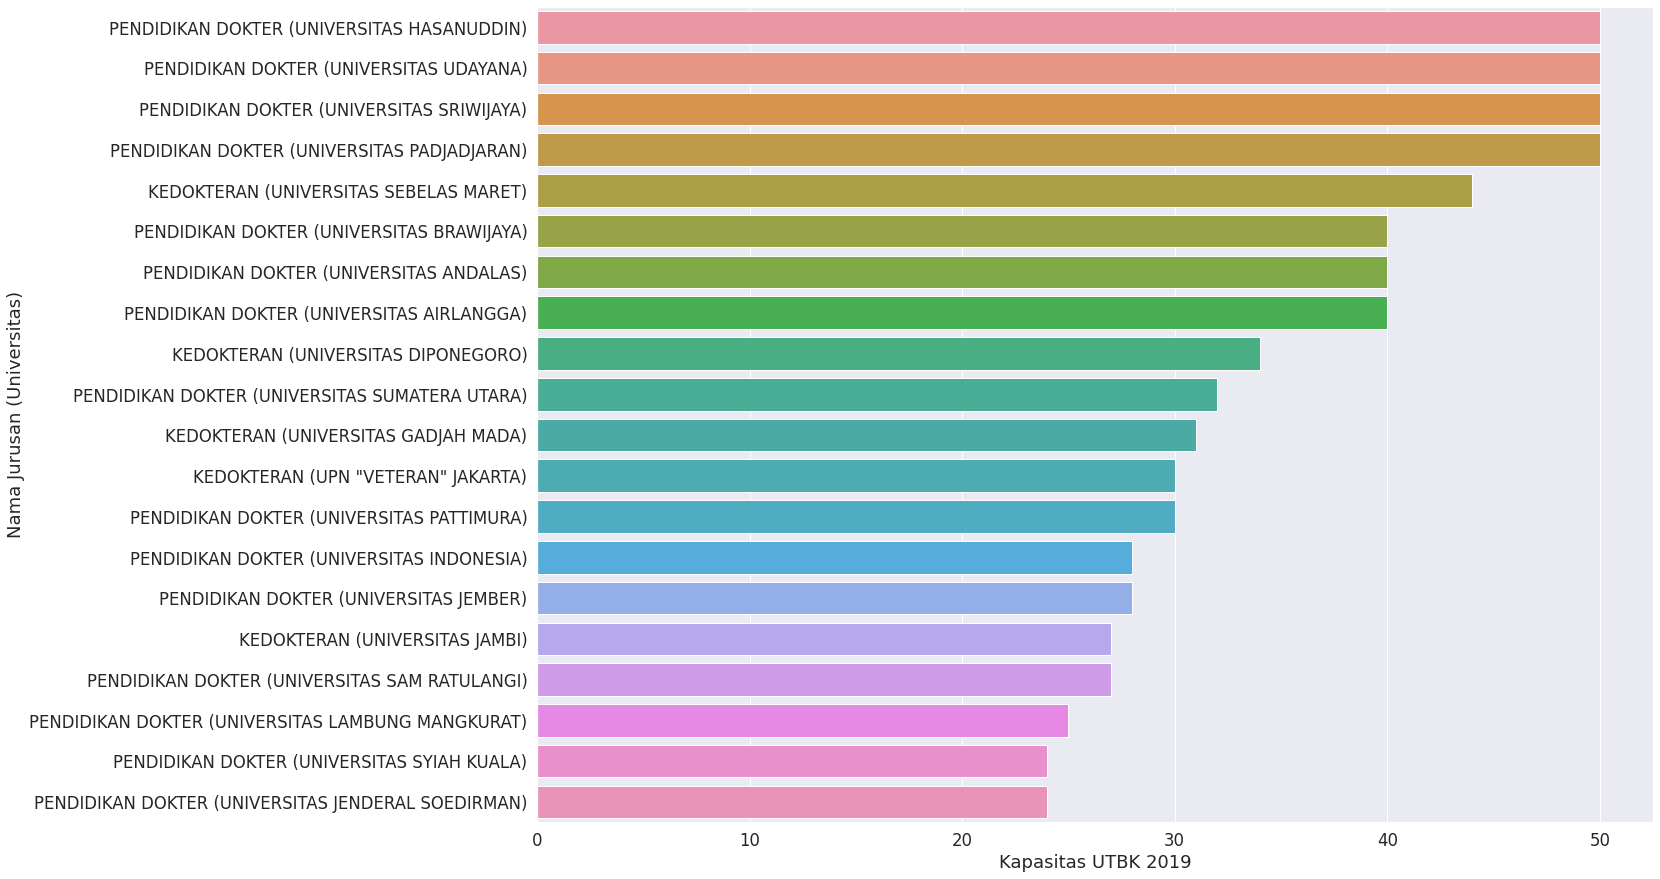

In [36]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=Kedokteran.sort_values(['Kapasitas UTBK 2019'], ascending = False)[0:20], x='Kapasitas UTBK 2019', y='Jurusan(Kampus)').set(ylabel = 'Nama Jurusan (Universitas)')


# Pilihan Jurusan dan Universitas
---
Meski begitu, universitas pilihan peserta tidaklah terdistribusi secara merata. Kita dapat melihat bahwa terdapat universitas yang memiliki peminat paling banyak, yang mana akan memiliki persaingan yang lebih ketat ketimbang universitas dengan peminat yang lebih sedikit. Dalam subbagian ini kami akan menampilkan distribusi jurusan dan kampus yang paling banyak diminati oleh peserta UTBK 2019. Selain itu akan dilakukan perbandingan antara jumlah peminat dengan kapasitas untuk jurusan yang sama dengan kampus berbeda-beda.

Pertama-tama kita bisa melihat bahwa setiap peserta memilih dua pilihan jurusan. Dengan demikian untuk mempermudah perhitungan, kita bisa memisahkan tabel untuk pilihan pertama dan kedua, dan kemudian kita gabungkan untuk mendapatkan tabel pilihan semua peserta. Dalam kondisi ini, setiap peserta akan memiliki dua baris berbeda yang masing-masing mengidentifikasi pilihan pertama dan pilihan kedua.

In [37]:
score_science_1_df = score_science_df.drop(columns = [
    'Pilihan Universitas Kedua', 
    'Pilihan Jurusan Kedua']).rename(columns = {
        'Pilihan Jurusan Pertama' : 'Pilihan Jurusan',
        'Pilihan Universitas Pertama' : 'Pilihan Universitas'
    })
score_science_1_df['Pilihan'] = 'Pertama'

score_science_2_df = score_science_df.drop(columns = [
    'Pilihan Universitas Pertama', 
    'Pilihan Jurusan Pertama']).rename(columns = {
        'Pilihan Jurusan Kedua' : 'Pilihan Jurusan',
        'Pilihan Universitas Kedua' : 'Pilihan Universitas'
    })
score_science_2_df['Pilihan'] = 'Kedua'

score_science_total_df = pd.concat([score_science_1_df, score_science_2_df]).drop(columns = [
    'Nilai Biologi',
    'Nilai Fisika',
    'Nilai Kimia',
    'Nilai Matematika',
    'Nilai PU',
    'Nilai PPU',
    'Nilai PK',
    'Nilai PBM'
]).rename(columns = {
    'Nilai TKA Saintek' : 'Nilai TKA'
})

score_science_total_df.sample(5)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
35617          3331125                  333      149392     490.75     512.00   
73243          3821202                  382      292186     639.50     695.75   
15998          3511123                  351       76175     547.25     653.25   
53046          3841044                  384      215767     534.75     501.25   
54873          3111196                  311      221717     543.00     587.00   

       Nilai UTBK Rumpun Bidang  Pilihan  
35617     501.375       science  Pertama  
73243     667.625       science    Kedua  
15998     600.250       science  Pertama  
53046     518.000       science  Pertama  
54873     565.000       science    Kedua

In [38]:
score_humanities_1_df = score_humanities_df.drop(columns = [
    'Pilihan Universitas Kedua', 
    'Pilihan Jurusan Kedua']).rename(columns = {
        'Pilihan Jurusan Pertama' : 'Pilihan Jurusan',
        'Pilihan Universitas Pertama' : 'Pilihan Universitas'
    })
score_humanities_1_df['Pilihan'] = 'Pertama'

score_humanities_2_df = score_humanities_df.drop(columns = [
    'Pilihan Universitas Pertama', 
    'Pilihan Jurusan Pertama']).rename(columns = {
        'Pilihan Jurusan Kedua' : 'Pilihan Jurusan',
        'Pilihan Universitas Kedua' : 'Pilihan Universitas'
    })
score_humanities_2_df['Pilihan'] = 'Kedua'

score_humanities_total_df = pd.concat([score_humanities_1_df, score_humanities_2_df]).drop(columns = [
    'Nilai Sosiologi',
    'Nilai Geografi',
    'Nilai Sejarah',
    'Nilai Ekonomi',
    'Nilai Matematika',
    'Nilai PU',
    'Nilai PPU',
    'Nilai PK',
    'Nilai PBM'
]).rename(columns = {
    'Nilai TKA Soshum' : 'Nilai TKA'
})

score_humanities_total_df.sample(5)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
37749          3542036                  354      228154      558.2     575.00   
34117          3212081                  321      213086      526.0     529.25   
17259          3732052                  373      117049      544.0     461.50   
26483          3632074                  363      176446      477.4     442.75   
47145          6112203                  611      272688      556.0     549.75   

       Nilai UTBK Rumpun Bidang  Pilihan  
37749     566.600    humanities    Kedua  
34117     527.625    humanities  Pertama  
17259     502.750    humanities    Kedua  
26483     460.075    humanities    Kedua  
47145     552.875    humanities  Pertama

In [39]:
score_utbk_total_df = pd.concat([score_science_total_df, score_humanities_total_df])
score_utbk_total_df.sample(5)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
40936          1711067                  171      173927     465.25     616.75   
2415           3551027                  355       12974     749.25     726.75   
4732           3821105                  382       23808     619.50     536.75   
66915          3531294                  353      263369     543.75     627.75   
7658           3511185                  351       40216     580.75     696.25   

       Nilai UTBK Rumpun Bidang  Pilihan  
40936     541.000       science  Pertama  
2415      738.000       science  Pertama  
4732      578.125       science  Pertama  
66915     585.750       science  Pertama  
7658      638.500       science    Kedua

## Universitas Favorit
---
Dalam subbagian ini kita akan mengeksplor universitas mana yang memiliki peminat terbanyak yang ditandai oleh banyaknya peserta yang memilih universitas tersebut. Kita juga akan mencari tahu mengapa universitas-universitas tersebut memiliki banyak peminat dari data yang kita miliki ini.

In [40]:
univ_choice_df = score_utbk_total_df.groupby('Pilihan Universitas').count().reset_index()
univ_choice_df = univ_choice_df[['Pilihan Universitas', 'Pilihan']].sort_values(by = 'Pilihan', ascending = False).rename(columns = {
    'Pilihan' : 'Jumlah Pemilih',
    'Pilihan Universitas' : 'ID Universitas'})
univ_choice_df = pd.merge(univ_choice_df, universities_df, on = 'ID Universitas').drop(columns = 'ID Universitas')
univ_choice_df.head()

Jumlah Pemilih           Nama Universitas
0           18839      UNIVERSITAS BRAWIJAYA
1           16193     UNIVERSITAS DIPONEGORO
2           15366    UNIVERSITAS PADJADJARAN
3           13836    UNIVERSITAS GADJAH MADA
4           13783  UNIVERSITAS SEBELAS MARET

Text(0.5, 1.0, 'Distribusi Universitas dengan Pemilih Terbanyak')

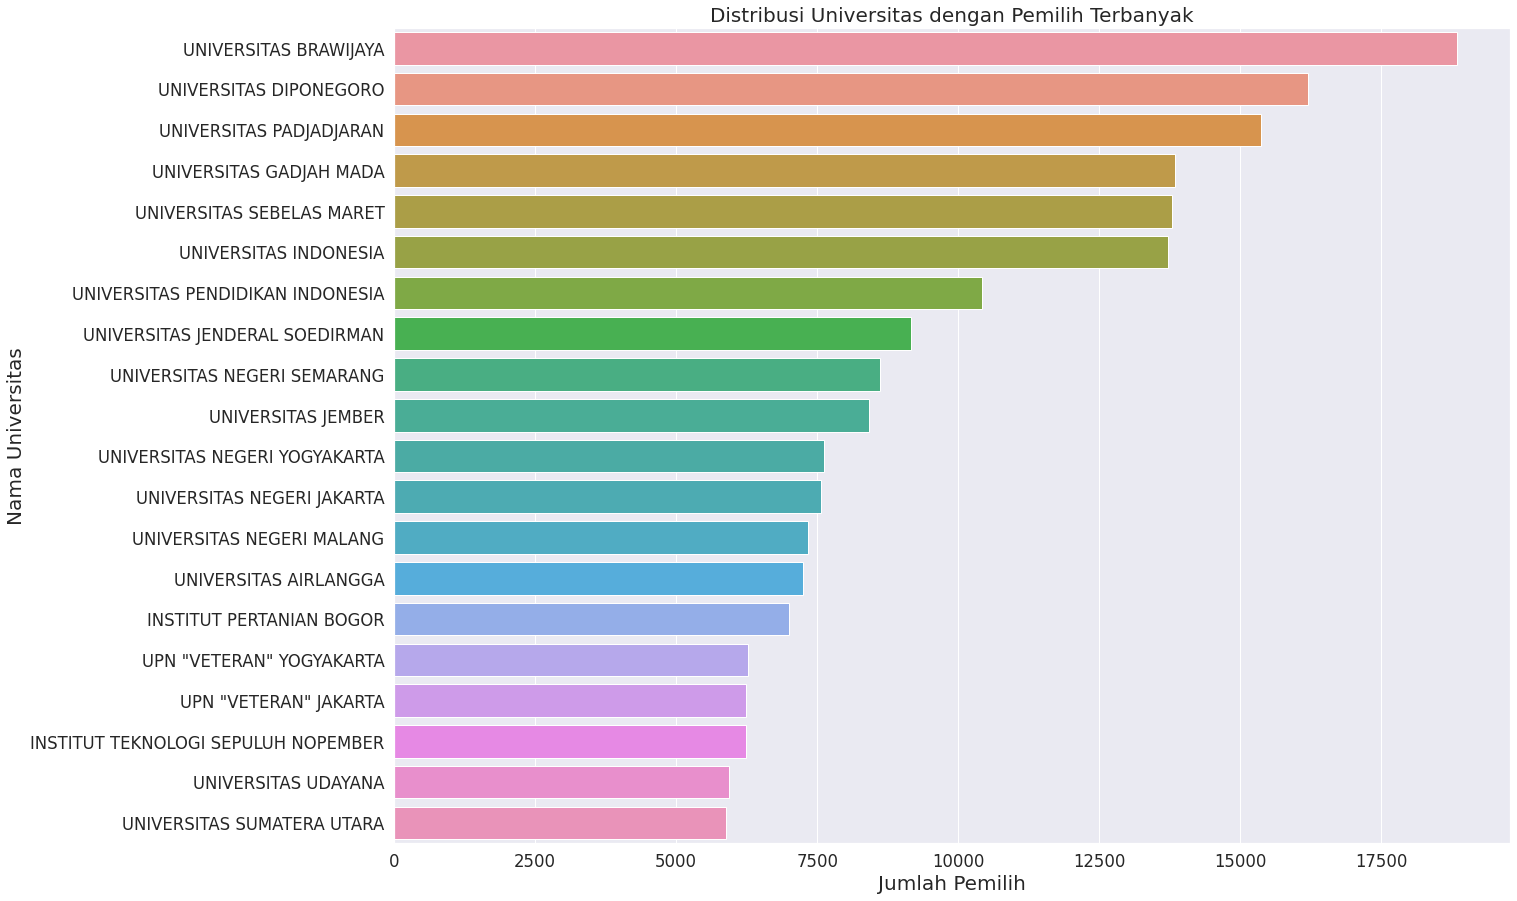

In [41]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_choice_df[0:20], x='Jumlah Pemilih', y='Nama Universitas')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Universitas', fontsize = 20)
plt.title('Distribusi Universitas dengan Pemilih Terbanyak', fontsize = 20)

Mengapa universitas-universitas diatas menjadi universitas favorit? Karena memang universitas diatas masuk dalam jajaran universitas terbaik dan memiliki ranking dunia yang bagus juga$^{[6]}$. Ini menyebabkan banyak peserta yang saling bersain untuk mendapatkan kursi di universitas-universitas terbaik di Indonesia.

Selanjutnya kita akan mengecek apakah ada korelasi antara jumlah pendaftar UTBK 2019 pada setiap universitas dengan kapasitas penerimaan yang diberikan oleh universitas

In [42]:
univ_choice_df2 = pd.merge(univ_choice_df, kap_univ_df.reset_index(), on = 'Nama Universitas')
univ_choice_df2['Jumlah Kapasitas UTBK 2019'] = univ_choice_df2['humanities'] + univ_choice_df2['science']
univ_choice_df2 = univ_choice_df2.drop(columns = ['humanities', 'science'])[['Nama Universitas', 'Jumlah Pemilih', 'Jumlah Kapasitas UTBK 2019']]
univ_choice_df2.head()


Nama Universitas  Jumlah Pemilih  Jumlah Kapasitas UTBK 2019
0      UNIVERSITAS BRAWIJAYA           18839                        2088
1     UNIVERSITAS DIPONEGORO           16193                        1616
2    UNIVERSITAS PADJADJARAN           15366                        1281
3    UNIVERSITAS GADJAH MADA           13836                        1219
4  UNIVERSITAS SEBELAS MARET           13783                        1325

### Hubungan Jumlah Pemilih dengan Jumlah Kapasitas
---
Secara intuitif, kita bisa melihat bahwa jumlah pemilih berkorelasi dengan kapasitas UTBK. Jika kapasitas banyak, maka peserta akan banyak yang beranggapan bahwa peluang masuknya lebih tinggi, sehingga peserta memilih pilihan universitas yang kapasitasnya banyak. Untuk memastikannya, kita akan melihat korelasi antara kedua data ini.

In [43]:
univ_choice_df2['Jumlah Pemilih'].corr(univ_choice_df2['Jumlah Kapasitas UTBK 2019'])

0.5697754317083267

Terlihat bahwa nilai korelasi antara *Jumlah Pemilih* dengan *Jumlah Kapasitas UTBK 2019* berkorelasi positif cukup kuat dengan nilai 0,57 yang berada di rentang 5 $\leq$ x $\leq$ 7. Ini masuk akal karena semakin banyak kapasitas kampus, semakin banyak pula jurusan di kampus itu yang mengakibatkan banyaknya peserta yang memilih kampus tersebut. Kita akan membahas korelasi kapasitas masing-masing jurusan terhadap jumlah pemilih di bagian selanjutnya, sekarang kita akan fokus mencari korelasi antara jumlah pemilih dengan kapasitas kampus dalam UTBK 2019. Kita akan mencoba mengecek korelasi antara *Jumlah Pemilih* dengan *Jumlah Kapasitas UTBK 2019* dalam model linier.

In [44]:
reg_model = LinearRegression()
reg_model.fit(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1),univ_choice_df2['Jumlah Pemilih'])
reg_model.score(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), univ_choice_df2['Jumlah Pemilih'])


0.3246440425784096

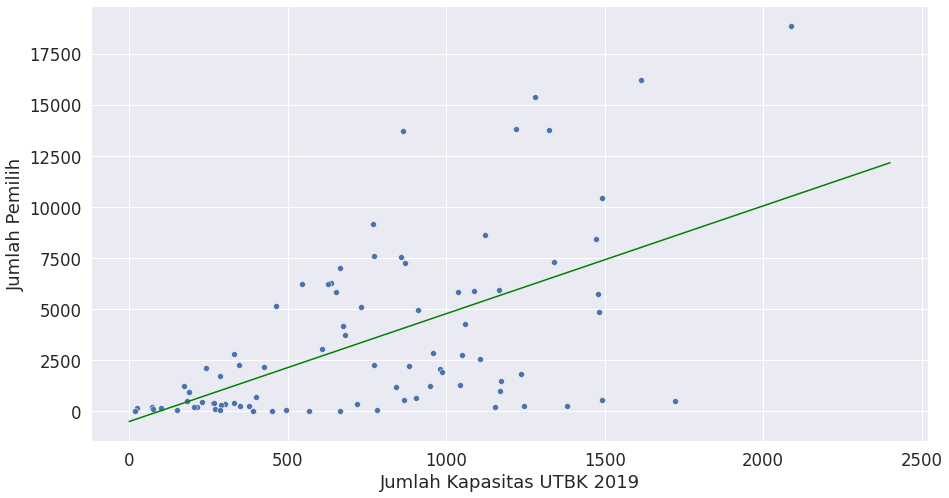

In [45]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Jumlah Kapasitas UTBK 2019', y = 'Jumlah Pemilih', data = univ_choice_df2)
x = np.arange(0,2500,100)
plt.plot(x, reg_model.intercept_ + reg_model.coef_ * x, color = 'green')


Terlihat bahwa skor $R^2$ dari regresi linier masihlah kurang, hal ini memungkinkan bahwa model korelasi tidaklah linier. Ini mungkin juga menjelaskan mengapa hasi korelasi *Pearson* juga menghasilkan nilai yang kuat sedang ($\approx 0,5$) karena korelasi *Pearson* hanya mendeteksi model linear saja. Selanjutnya kita akan membandingkan skor evaluasi, dalam hal ini evaluasi menggunakan pengujian $R^2$, dari sepuluh model regresi polinom, yaitu polinom orde pertama hingga orde ke sepuluh untuk mengetahui kemungkinan bahwa model korelasi kedua data tidaklah linier. Meski begitu, tetap mungkin bahwa hasil kesembilan model regresi polinom lain yang akan kita gunakan akan memiliki hasil lebih buruk ketimbang ini, namun tidak ada salahnya untuk mengecek.

In [46]:
for n in range(1,11):
  poly_reg = PolynomialFeatures(degree = n)
  feature = poly_reg.fit_transform(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1))
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(feature, univ_choice_df2['Jumlah Pemilih'])
  poly_reg_score = poly_reg_model.score(feature, univ_choice_df2['Jumlah Pemilih'])
  print('Hasil evaluasi model regresi polinom orde ' + str(n) + f' dengan uji R2  adalah ' + str(poly_reg_score))  

Hasil evaluasi model regresi polinom orde 1 dengan uji R2  adalah 0.3246440425784096
Hasil evaluasi model regresi polinom orde 2 dengan uji R2  adalah 0.3347056543967044
Hasil evaluasi model regresi polinom orde 3 dengan uji R2  adalah 0.3635570142079114
Hasil evaluasi model regresi polinom orde 4 dengan uji R2  adalah 0.3721843475856058
Hasil evaluasi model regresi polinom orde 5 dengan uji R2  adalah 0.3722817932936655
Hasil evaluasi model regresi polinom orde 6 dengan uji R2  adalah 0.37995001662142325
Hasil evaluasi model regresi polinom orde 7 dengan uji R2  adalah 0.4058906464514367
Hasil evaluasi model regresi polinom orde 8 dengan uji R2  adalah 0.3423474253814145
Hasil evaluasi model regresi polinom orde 9 dengan uji R2  adalah 0.33546331963606624
Hasil evaluasi model regresi polinom orde 10 dengan uji R2  adalah 0.3307696644580529


In [47]:
poly_reg = PolynomialFeatures(degree = 2)
feature = poly_reg.fit_transform(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(feature,univ_choice_df2['Jumlah Pemilih'])
prediction = poly_reg_model.predict(feature)
poly_reg_model.score(feature, univ_choice_df2['Jumlah Pemilih'])


0.3347056543967044

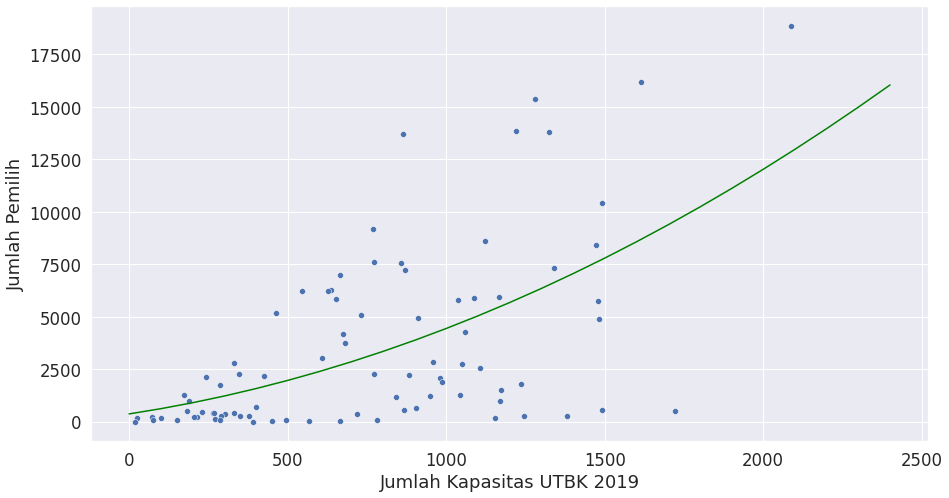

In [48]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Jumlah Kapasitas UTBK 2019', y = 'Jumlah Pemilih', data = univ_choice_df2)
x = np.arange(0,2500,100)
plt.plot(x, poly_reg_model.intercept_ + sum(poly_reg_model.coef_[n]*x**n for n in range(1,3)), color = 'green')


Kita bisa melihat bahwa hasil korelasi antara *Kapasitas UTBK 2019* dengan *Jumlah Pemilih* secara regresi polinomial dengan orde satu hingga sepuluh memiliki skor uji $R^2$ yang kecil, yaitu berada pada rentang 0,3 $\leq$ x $\leq$ 0,5. Hal ini menyatakan bahwa korelasi secara regresi cukup lemah$^{[3]}$. Maka dari itu kemungkinan terdapat model yang cocok dengan data diatas, misalkan kita coba gunakan model *DecisionTreeRegressor*

In [49]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), univ_choice_df2['Jumlah Pemilih'])
print('Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah ' + str(regressor.score(univ_choice_df2['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), univ_choice_df2['Jumlah Pemilih'])))


Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah 0.9898596453489529


Jadi kita bisa menyimpulkan bahwa salah satu faktor mengapa beberapa universitas diatas memiliki peminat yang banyak adalah bahwa universitas tersebut memiliki jumlah jurusan yang memiliki total kapasitas penerimaan mahasiswa baru yang juga banyak. Namun faktor ini sekali lagi bukanlah faktor utama, karena seperti yang telah kita lihat sebelumnya bahwa korelasinya meski terbilang cukup kuat, tetap memiliki faktor-faktor lain yang memengaruhi pilihan peserta. Faktor-faktor lain tersebut tidak dibahas disini karena keterbatasan data yang kita miliki.

### Peluang Keberhasilan
---
Kita dapat mencari tahu berapa persen peluang keberhasilan peserta memasuki universitas tersebut. Untuk mendapatkan persentase keberhasilan peserta, kita tinggal bandingkan  kapasitas yang disediakan oleh universitas dengan jumlah peserta yang berminat mendaftar pada universitas.

In [50]:
univ_choice_df2['Peluang Keberhasilan (%)'] = 100*univ_choice_df2['Jumlah Kapasitas UTBK 2019']/univ_choice_df2['Jumlah Pemilih']
univ_choice_df2.head()

Nama Universitas  Jumlah Pemilih  Jumlah Kapasitas UTBK 2019  \
0      UNIVERSITAS BRAWIJAYA           18839                        2088   
1     UNIVERSITAS DIPONEGORO           16193                        1616   
2    UNIVERSITAS PADJADJARAN           15366                        1281   
3    UNIVERSITAS GADJAH MADA           13836                        1219   
4  UNIVERSITAS SEBELAS MARET           13783                        1325   

   Peluang Keberhasilan (%)  
0                 11.083391  
1                  9.979621  
2                  8.336587  
3                  8.810350  
4                  9.613292

Selanjutnya kita dapat melakukan plot untuk mengetahui persebaran universitas terhadap peluang keberhasilannya.

Text(0.5, 1.0, 'Distribusi Universitas dengan Peluang Keberhasilan Tertinggi')

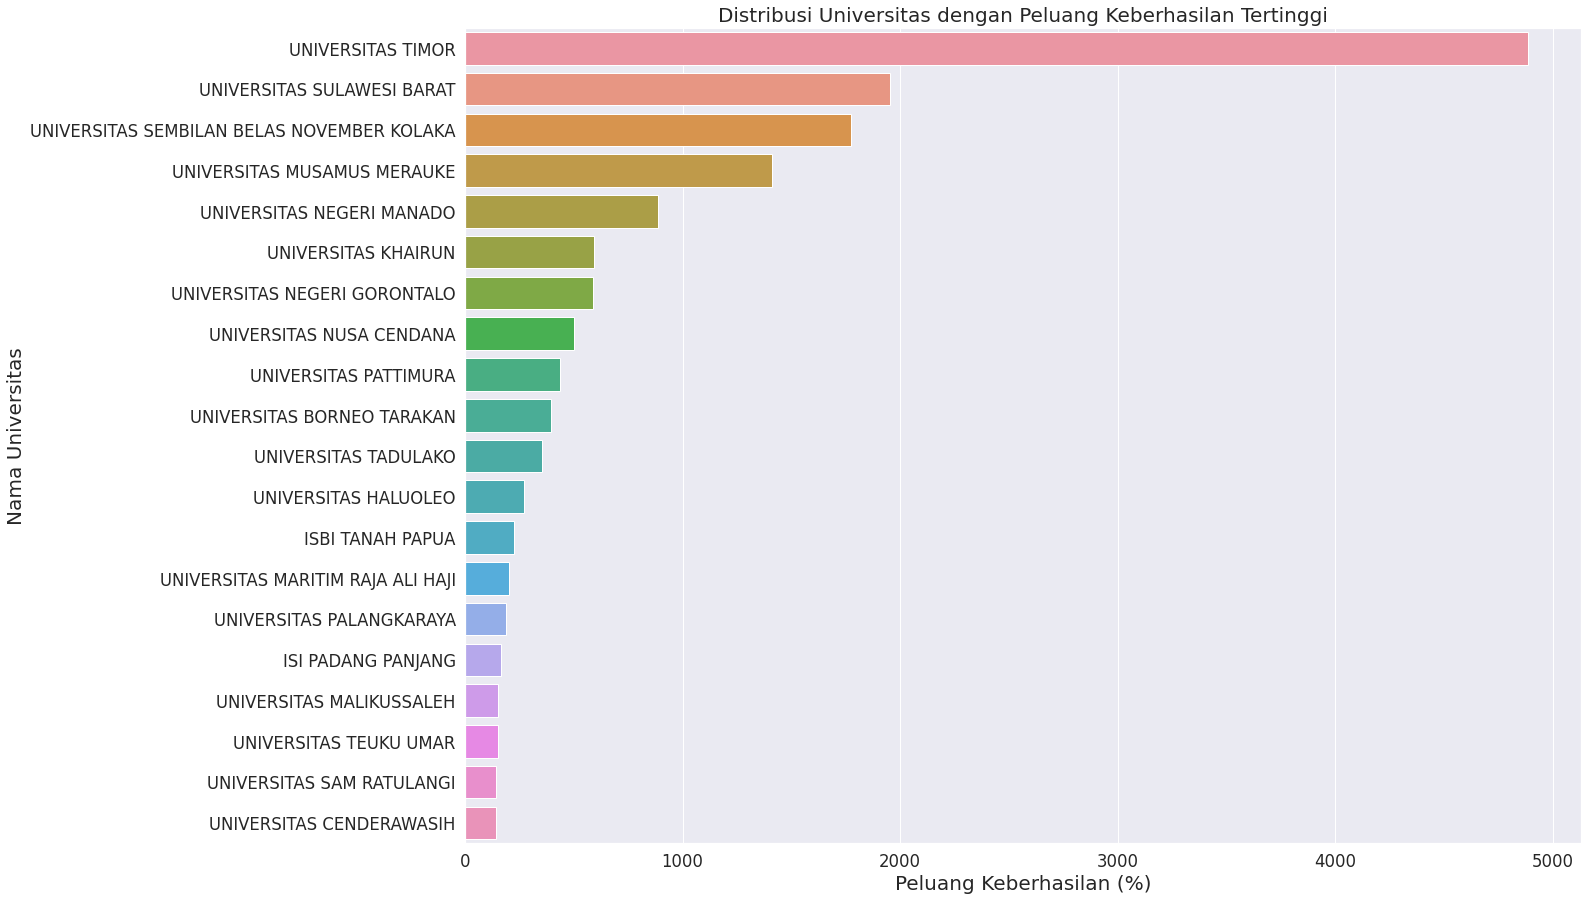

In [51]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_choice_df2.sort_values(by = 'Peluang Keberhasilan (%)', ascending = False)[0:20], x='Peluang Keberhasilan (%)', y='Nama Universitas')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Universitas', fontsize = 20)
plt.title('Distribusi Universitas dengan Peluang Keberhasilan Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Universitas dengan Peluang Keberhasilan Terkecil')

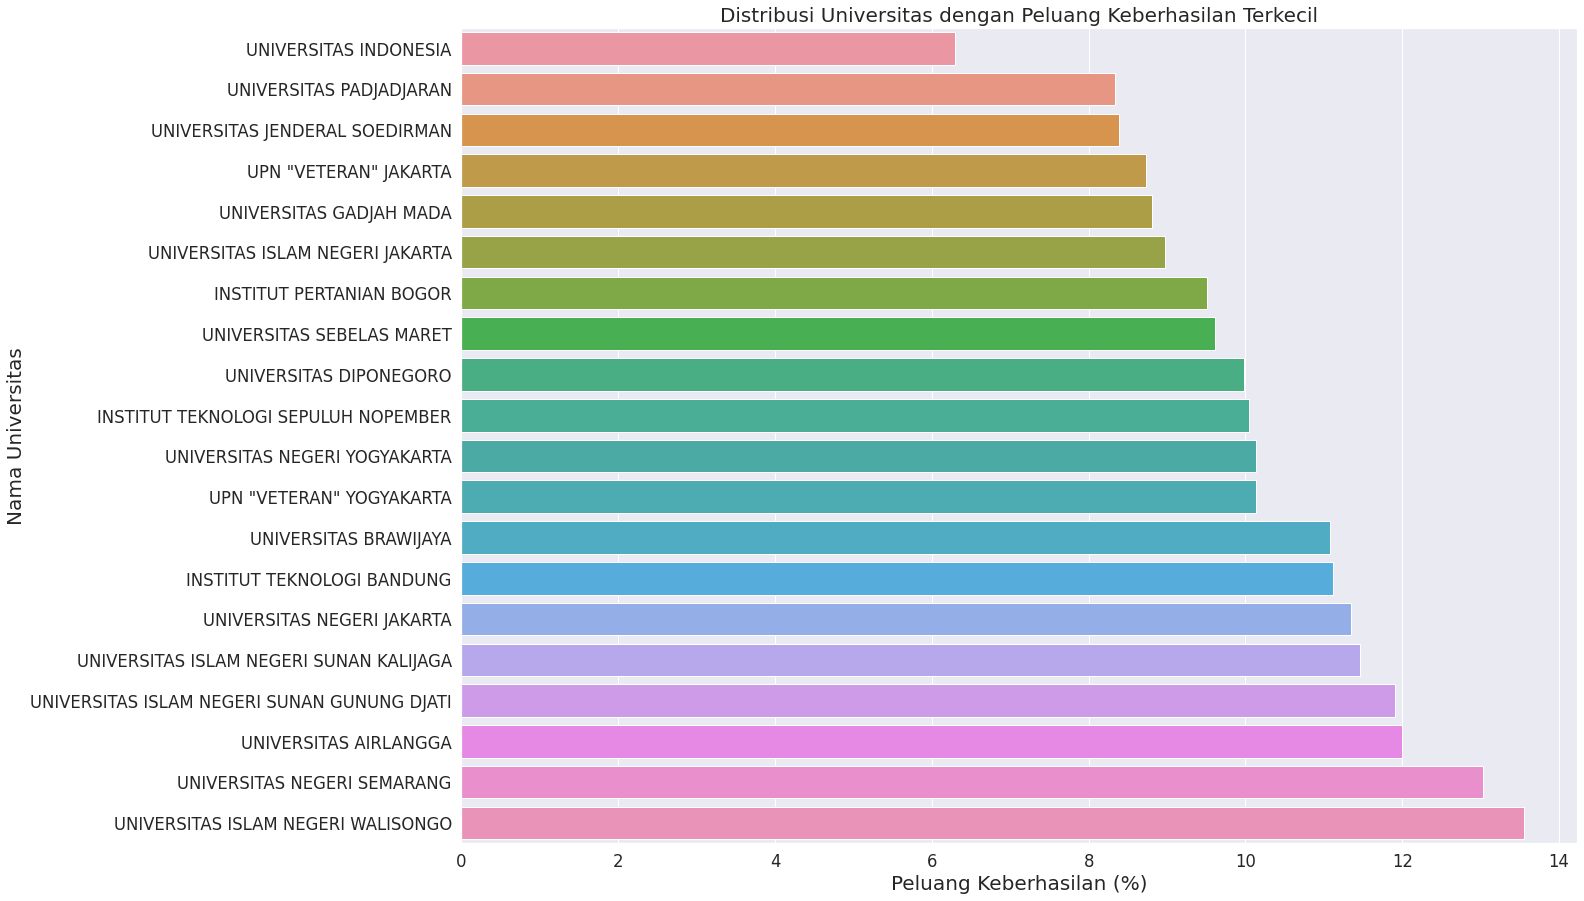

In [52]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_choice_df2.sort_values(by = 'Peluang Keberhasilan (%)', ascending = True)[0:20], x='Peluang Keberhasilan (%)', y='Nama Universitas')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Universitas', fontsize = 20)
plt.title('Distribusi Universitas dengan Peluang Keberhasilan Terkecil', fontsize = 20)

Kita bisa melihat bahwa universitas dengan tingkat persaingan tertinggi yang ditandakan oleh peluang keberhasilan yang kecil adalah Universitas Indonesia dan dilanjutkan oleh Universitas Padjadjaran. Sedangkan, universitas dengan tingkat persaingan terendah yang ditandakan oleh peluang keberhasilan yang tinggi adalah Universitas Timor dan dilanjutkan oleh Universitas Sulawesi Barat.


## Jurusan dan Universitas Favorit
---
Dalam subbagian ini kita akan mengeksplor jurusan dan universitas secara bersamaan mana yang memiliki peminat terbanyak yang ditandai oleh banyaknya peserta yang memilih universitas tersebut. Kita juga akan mencari tahu mengapa jurusan dari universitas-universitas tersebut memiliki banyak peminat dari data yang kita miliki ini.

Sebelumnya kita telah mendapatkan data pilihan peserta yang telah dijadikan satu

In [53]:
score_utbk_total_df.sample(5)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
17801          3832382                  383      120499     495.80     510.00   
85266          3211271                  321      332845     484.75     633.25   
54629          3811037                  381      221021     521.75     361.50   
48077          3821063                  382      200966     529.25     607.50   
44342          3612054                  361      257731     550.20     477.75   

       Nilai UTBK Rumpun Bidang  Pilihan  
17801     502.900    humanities    Kedua  
85266     559.000       science  Pertama  
54629     441.625       science  Pertama  
48077     568.375       science  Pertama  
44342     513.975    humanities  Pertama

Dalam bagian ini kita hanya akan melihat jurusan dan universitas, maka kita dapat membangun dataframe baru dan membuang kolom-kolom yang tidak diperlukan

In [54]:
major_univ_choice_df = score_utbk_total_df.groupby('Pilihan Jurusan').count().reset_index()
major_univ_choice_df = major_univ_choice_df[['Pilihan Jurusan', 'Pilihan']].sort_values(by = 'Pilihan', ascending = False).rename(columns = {
    'Pilihan' : 'Jumlah Pemilih',
    'Pilihan Jurusan' : 'ID Jurusan'})
major_univ_choice_df = pd.merge(major_univ_choice_df, majors_df, how = 'outer', on = 'ID Jurusan').rename(columns = {
    'Kapasitas Total' : 'Jumlah Kapasitas UTBK 2019'
})
major_univ_choice_df = pd.merge(major_univ_choice_df, universities_df, on = 'ID Universitas').drop(columns = ['ID Universitas'])
major_univ_choice_df['Jurusan (Universitas)'] = major_univ_choice_df['Nama Jurusan'] + ' (' + major_univ_choice_df['Nama Universitas'] + ')'
#Karena ada pilihan jurusan yang invalid (akan dibahas di proses seleksi)
major_univ_choice_df = major_univ_choice_df[major_univ_choice_df['Nama Jurusan'].notnull()]
major_univ_choice_df = major_univ_choice_df.sort_values(by = 'Jumlah Pemilih', ascending = False).drop(columns = ['Nama Jurusan', 'Nama Universitas']).fillna(0)
major_univ_choice_df[['Jumlah Pemilih','Jumlah Kapasitas UTBK 2019']] = major_univ_choice_df[['Jumlah Pemilih','Jumlah Kapasitas UTBK 2019']].astype(int)
major_univ_choice_df.head()

ID Jurusan  Jumlah Pemilih Rumpun Bidang  Jumlah Kapasitas UTBK 2019  \
0       3552054            1194    humanities                         425   
52      3722011             829    humanities                         260   
127     3531015             798       science                         110   
194     3331187             769       science                          80   
128     3532042             754    humanities                         225   

                      Jurusan (Universitas)  
0            HUKUM (UNIVERSITAS DIPONEGORO)  
52       ILMU HUKUM (UNIVERSITAS BRAWIJAYA)  
127  KEDOKTERAN (UNIVERSITAS SEBELAS MARET)  
194     PSIKOLOGI (UNIVERSITAS PADJADJARAN)  
128  ILMU HUKUM (UNIVERSITAS SEBELAS MARET)

Selanjutnya kita dapat melakukan plot untuk mengetahui distribusi jurusan dengan universitasnya yang paling diminati oleh peserta.

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Terbanyak')

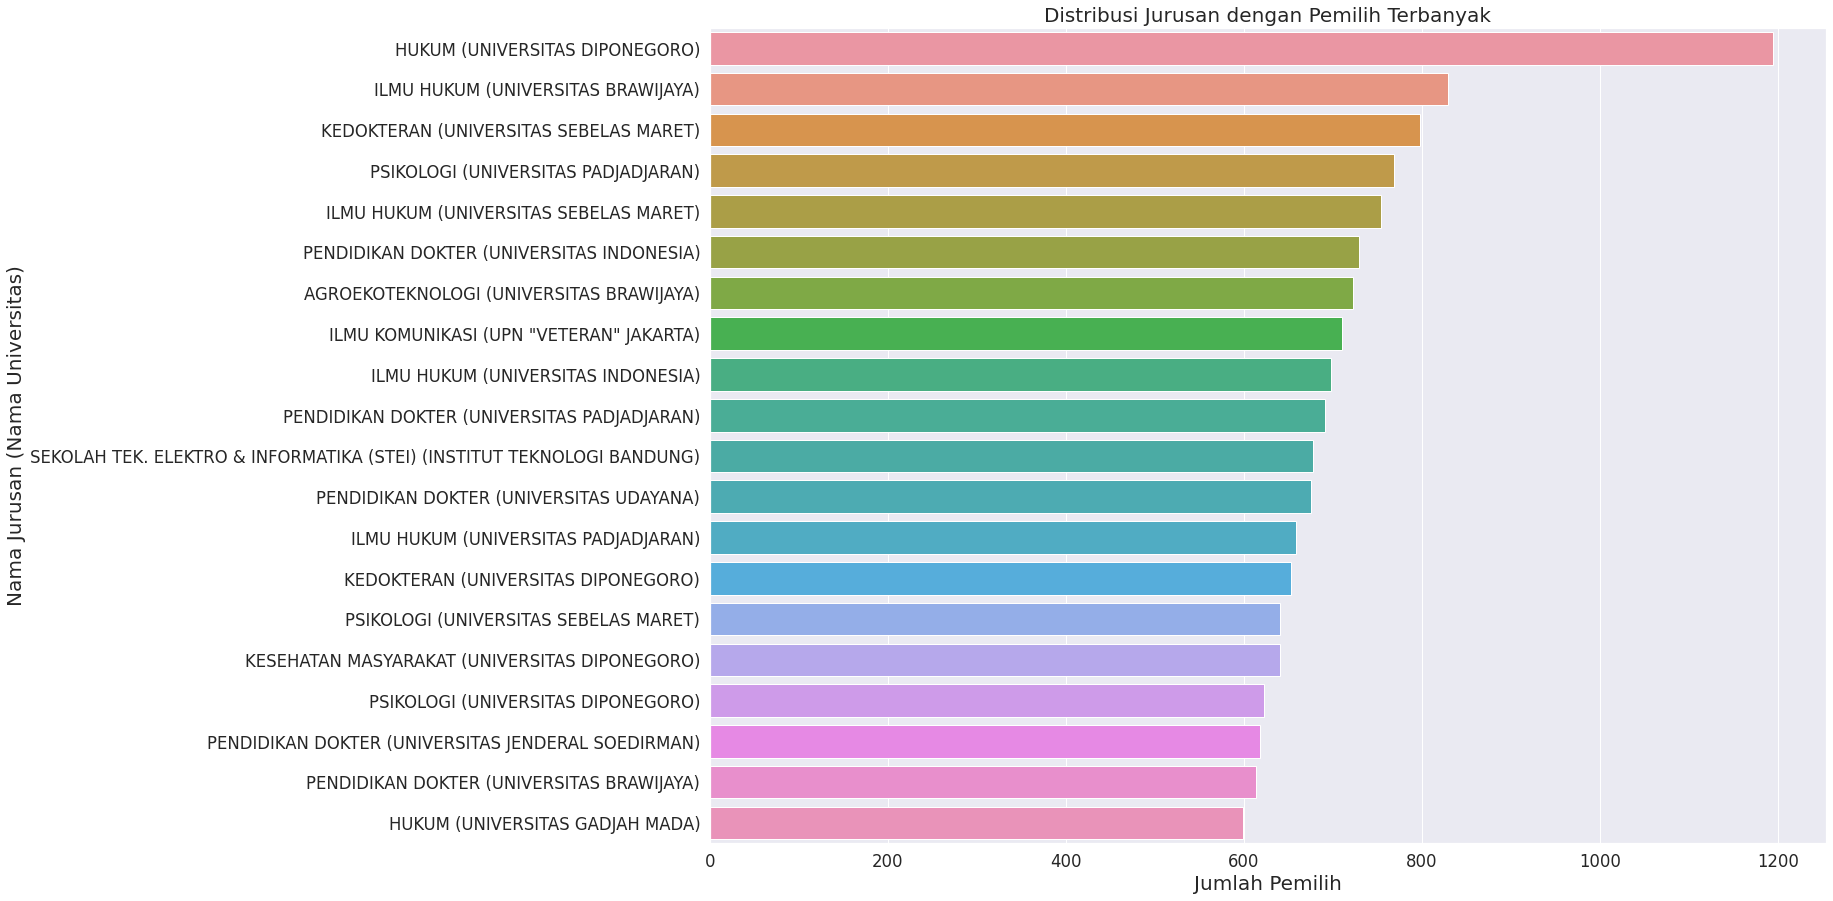

In [55]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_univ_choice_df[0:20], x='Jumlah Pemilih', y='Jurusan (Universitas)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Terbanyak', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Soshum dengan Pemilih Terbanyak')

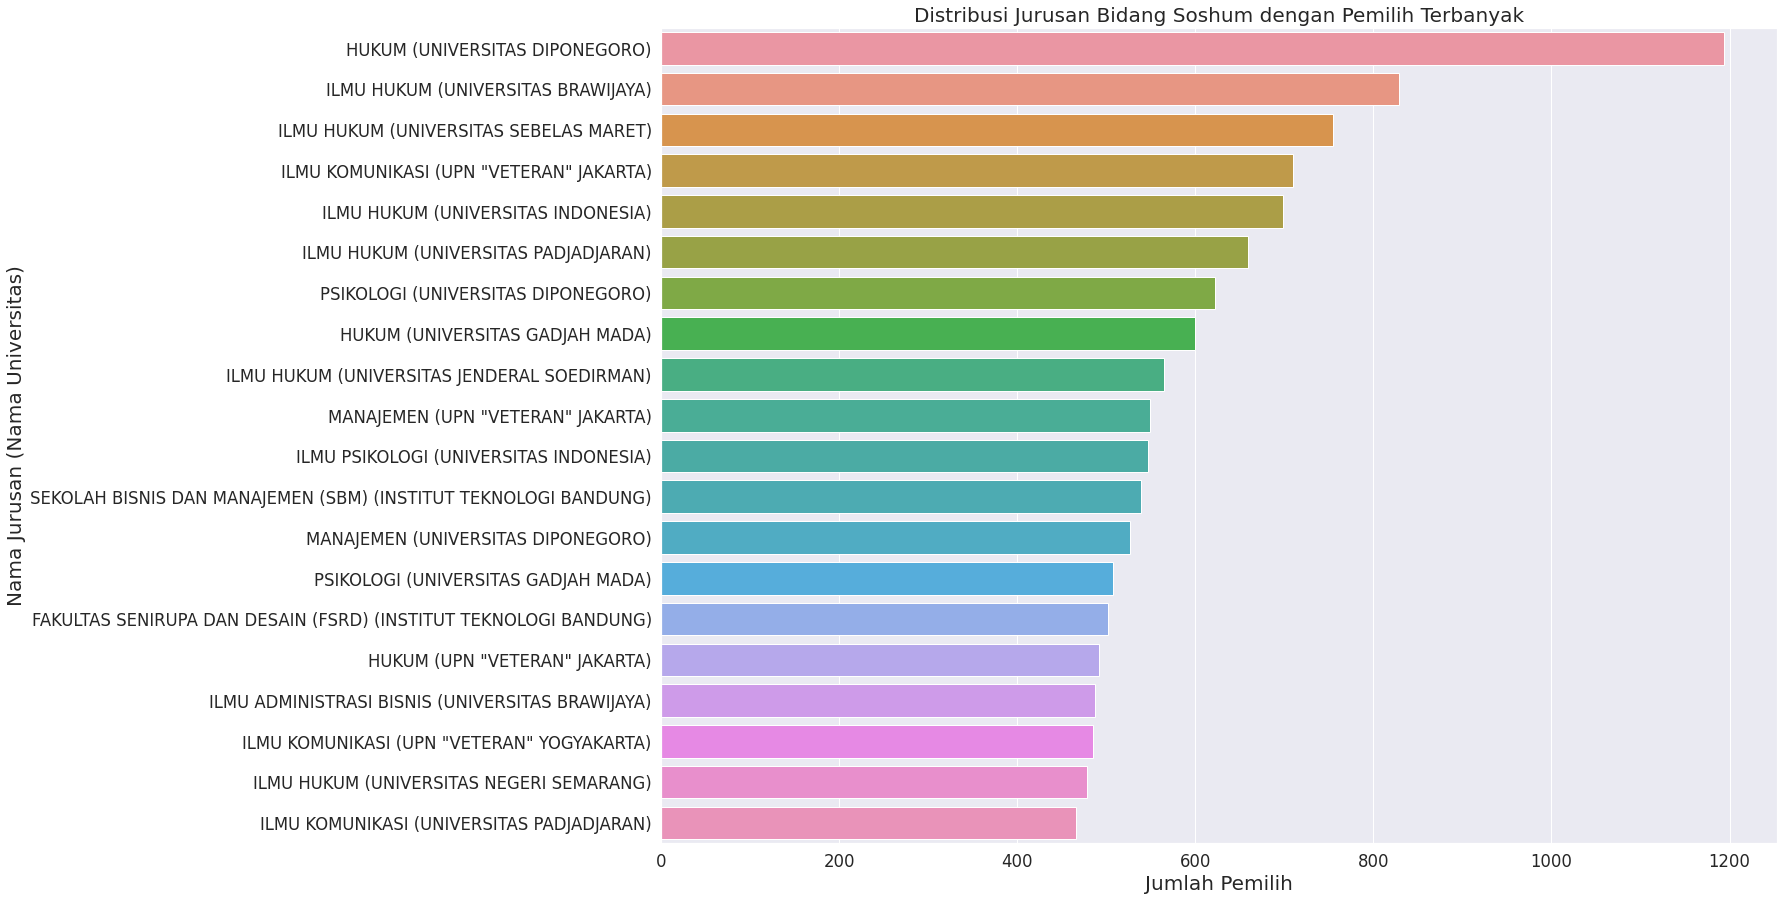

In [56]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_univ_choice_df[major_univ_choice_df['Rumpun Bidang'] == 'humanities'][0:20], x='Jumlah Pemilih', y='Jurusan (Universitas)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Soshum dengan Pemilih Terbanyak', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Saintek dengan Pemilih Terbanyak')

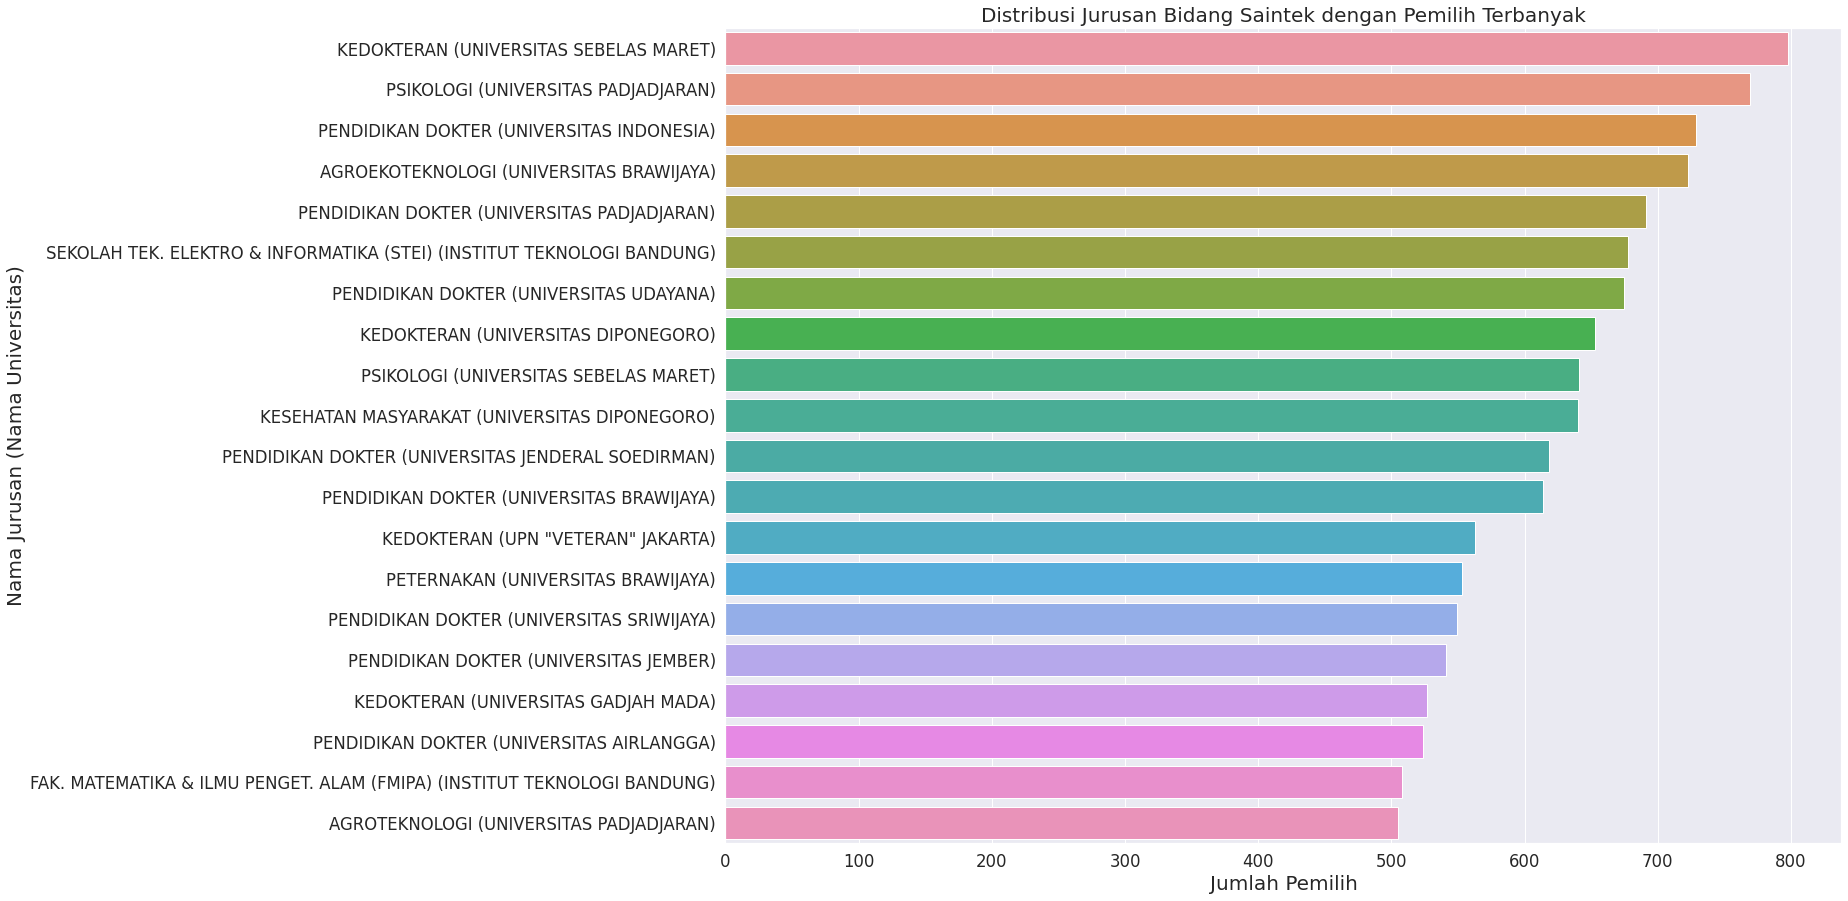

In [57]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_univ_choice_df[major_univ_choice_df['Rumpun Bidang'] == 'science'][0:20], x='Jumlah Pemilih', y='Jurusan (Universitas)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Saintek dengan Pemilih Terbanyak', fontsize = 20)

Kita dapat melihat bahwa dari semua rumpun bidang, Hukum Universitas Diponegoro menjadi yang paling diminati peserta dan dilanjutkan oleh Ilmu Hukum Universitas Brawijaya. Kedua jurusan tersebut juga pasti menjadi favorit di bidang soshum. Namun di bidang saintek, Kedokteran Universitas Sebelas Maret menjadi yang paling diminati peserta dan kemudian dilanjutkan oleh Psikologi Universitas Padjadjaran.

Mengapa Hukum Universitas Diponegoro menjadi yang paling diminati? padahal Hukum Universitas Diponegoro adalah rank 4 di Indonesia, ketimbang Universitas Indonesia dan Universitas Airlangga yang rank lebih tinggi$^{[7]}$. Ini dikarenakan seperti yang kita lihat di subbagian sebelumnya, Hukum Universitas Diponegoro memiliki jumlah kapasitas yang banyak dan juga rank 4 masih dapat dikatakan yang terbaik di Indonesia. Peserta akan berpikir bahwa akan lebih baik dan lebih mungkin masuk jurusan yang terbaik dan berkapasitas banyak.

Hal yang sedikit berbeda terlihat di bidang saintek. Kedokteran Universitas Sebelas Maret bukanlah yang memiliki kapasitas terbanyak, namun kapasitas terbanyak adalah Universitas Hassanuddin. Namun Mengapa Universitas Sebelas Maret yang menjadi favorit, padahal rank Kedokteran Universitas Hassanuddin bahkan satu tingkat lebih tinggi dari Universitas Sebelas Maret$^{[8]}$. Mungkin ini dikarenakan bahwa Kedokteran Universitas Sebelas Maret adalah salah dari jurusan Kedokteran di Indonesia yang terbaik, memiliki kapasitas banyak, dan terletak di pulau Jawa. Mengapa poin ketiga itu penting dan terlihat berpengaruh? Karena hampir 50% masyarakat Indonesia hidup di pulau Jawa, maka dari itu pastilah banyak peserta UTBK 2019 yang berasal dari pulau Jawa dan berpikir dua kali untuk mengambil universitas di luar pulau Jawa dikarenakan jarak atau alasan lain. Kedokteran Universitas Sebelas Maret adalah salah satu dari 5 jurusan kedokteran yang memiliki kapasitas terbanyak di Indonesia dan satu-satunya yang terletak di pulau Jawa.

### Hubungan Jumlah Pemilih dengan Jumlah Kapasitas
---
Selanjutnya kita akan mengecek apakah ada korelasi antara jumlah pendaftar pada jurusan terhadap kapasitas penerimaan jurusan tersebut.

In [58]:
major_univ_choice_df['Jumlah Pemilih'].corr(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'])

0.389840434014687

Korelasi antara *Jumlah Pemilih* dengan *Jumlah Kapasitas UTBK 2019* tidaklah kuat, meski sepertinya kedua data tersebut saling berkorelasi positif. Namun, korelasi $\approx$ 0,4 menunjukkan korelasi lemah$^{[5]}$. Kita bisa mencari alasan untuk hal ini, alasan yang paling mungkin adalah bahwa ketika memilih jurusan, berbeda dengan memilih universitas, pemilih akan fokus ke pilihan yang benar-benar mereka inginkan, bukan pada kapasitas yang menunjukkan peluang masuk, atau mungkin pemilih memilih target universitas dulu baru memilih jurusan terbaik yang ada di universitas tersebut. Meski begitu, kita tidak memiliki data yang cukup untuk mendapatkan kesimpulan atas masalah ini. Mungkin kita juga bisa mencari model non-linier yang menunjukkan korelasi antara kedua data ini.

0.1519755639927598

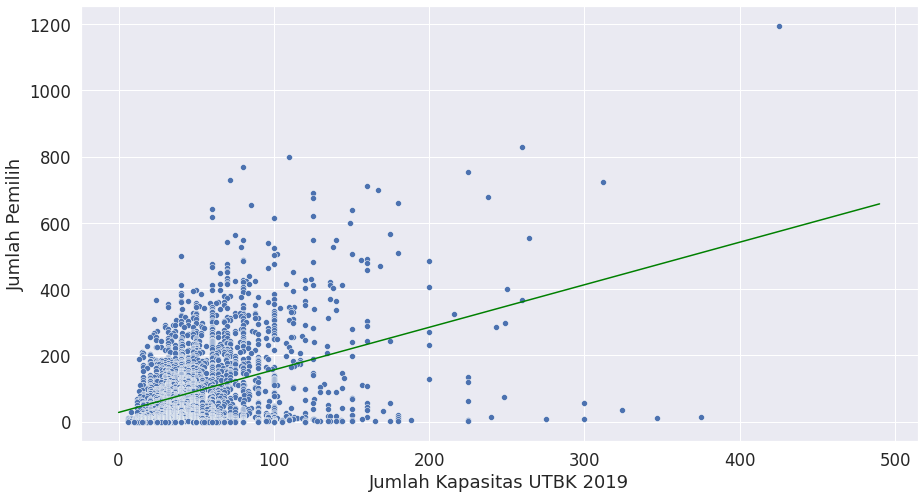

In [59]:
reg_model = LinearRegression()
reg_model.fit(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1),major_univ_choice_df['Jumlah Pemilih'])

plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Jumlah Kapasitas UTBK 2019', y = 'Jumlah Pemilih', data = major_univ_choice_df)
x = np.arange(0,500,10)
plt.plot(x, reg_model.intercept_ + reg_model.coef_ * x, color = 'green')


display(reg_model.score(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_univ_choice_df['Jumlah Pemilih']))


In [60]:
for n in range(1,11):
  poly_reg = PolynomialFeatures(degree = n)
  feature = poly_reg.fit_transform(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1))
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(feature, major_univ_choice_df['Jumlah Pemilih'])
  poly_reg_score = poly_reg_model.score(feature, major_univ_choice_df['Jumlah Pemilih'])
  print('Hasil evaluasi model regresi polinom orde ' + str(n) + f' dengan uji R2  adalah ' + str(poly_reg_score))  

Hasil evaluasi model regresi polinom orde 1 dengan uji R2  adalah 0.1519755639927598
Hasil evaluasi model regresi polinom orde 2 dengan uji R2  adalah 0.15715702399233622
Hasil evaluasi model regresi polinom orde 3 dengan uji R2  adalah 0.1640575350496719
Hasil evaluasi model regresi polinom orde 4 dengan uji R2  adalah 0.1697826346187994
Hasil evaluasi model regresi polinom orde 5 dengan uji R2  adalah 0.17614995269090494
Hasil evaluasi model regresi polinom orde 6 dengan uji R2  adalah 0.18104541069180757
Hasil evaluasi model regresi polinom orde 7 dengan uji R2  adalah 0.1815944535254822
Hasil evaluasi model regresi polinom orde 8 dengan uji R2  adalah 0.17952601408593316
Hasil evaluasi model regresi polinom orde 9 dengan uji R2  adalah 0.17133532258658668
Hasil evaluasi model regresi polinom orde 10 dengan uji R2  adalah 0.11171218365728586


In [61]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_univ_choice_df['Jumlah Pemilih'])
print('Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah ' + str(regressor.score(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_univ_choice_df['Jumlah Pemilih'])))


Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah 0.2981608629661887


Kita telah mencoba berbagai model untuk mencari korelasi antara *Jumlah Pemilih* jurusan pada UTBK 2022 dan *Jumlah Kapasitas UTBK 2019* yang menhasilkan nilai evaluasi dari model-model yang kita pakai sangatlah rendah. Maka dari itu, kesimpulan awal kita bahwa korelasi kedua data ini tidaklah kuat adalah benar. 

### Peluang Keberhasilan
---
Kita dapat mencari tahu berapa persen peluang keberhasilan peserta memasuki jurusan di universitas tertentu. Untuk mendapatkan persentase keberhasilan peserta, kita tinggal bandingkan  kapasitas yang disediakan oleh jurusan pada universitas dengan jumlah peserta yang berminat mendaftar pada jurusan tersebut.

In [62]:
major_univ_choice_df['Peluang Keberhasilan (%)'] = 100*major_univ_choice_df['Jumlah Kapasitas UTBK 2019']/major_univ_choice_df['Jumlah Pemilih']
major_univ_choice_df = major_univ_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = False)
major_univ_choice_df.tail()

ID Jurusan  Jumlah Pemilih Rumpun Bidang  Jumlah Kapasitas UTBK 2019  \
275     3212301             202    humanities                          15   
140     3531166             311       science                          23   
331     3241111             209       science                          15   
45      3551333             190       science                          13   
259     3212081             368    humanities                          24   

                                 Jurusan (Universitas)  \
275  BAHASA DAN KEBUDAYAAN KOREA (UNIVERSITAS INDON...   
140  PERENCANAAN WILAYAH DAN KOTA (PWK) (UNIVERSITA...   
331                    FARMASI (UPN "VETERAN" JAKARTA)   
45            KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)   
259                KRIMINOLOGI (UNIVERSITAS INDONESIA)   

     Peluang Keberhasilan (%)  
275                  7.425743  
140                  7.395498  
331                  7.177033  
45                   6.842105  
259                  6.521739

Terlihat bahwa cukup banyak jurusan yang tidak diminati sama sekali oleh peserta. Maka dari itu, alangkah lebih baik kita membuang jurusan-jurusan ini

In [63]:
major_univ_choice_df = major_univ_choice_df[major_univ_choice_df['Jumlah Pemilih']!=0]
major_univ_choice_df.tail()

ID Jurusan  Jumlah Pemilih Rumpun Bidang  Jumlah Kapasitas UTBK 2019  \
275     3212301             202    humanities                          15   
140     3531166             311       science                          23   
331     3241111             209       science                          15   
45      3551333             190       science                          13   
259     3212081             368    humanities                          24   

                                 Jurusan (Universitas)  \
275  BAHASA DAN KEBUDAYAAN KOREA (UNIVERSITAS INDON...   
140  PERENCANAAN WILAYAH DAN KOTA (PWK) (UNIVERSITA...   
331                    FARMASI (UPN "VETERAN" JAKARTA)   
45            KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)   
259                KRIMINOLOGI (UNIVERSITAS INDONESIA)   

     Peluang Keberhasilan (%)  
275                  7.425743  
140                  7.395498  
331                  7.177033  
45                   6.842105  
259                  6.521739

Selanjutnya kita dapat melakukan plot untuk mengetahui persebaran universitas terhadap peluang keberhasilannya.

Text(0.5, 1.0, 'Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Tertinggi')

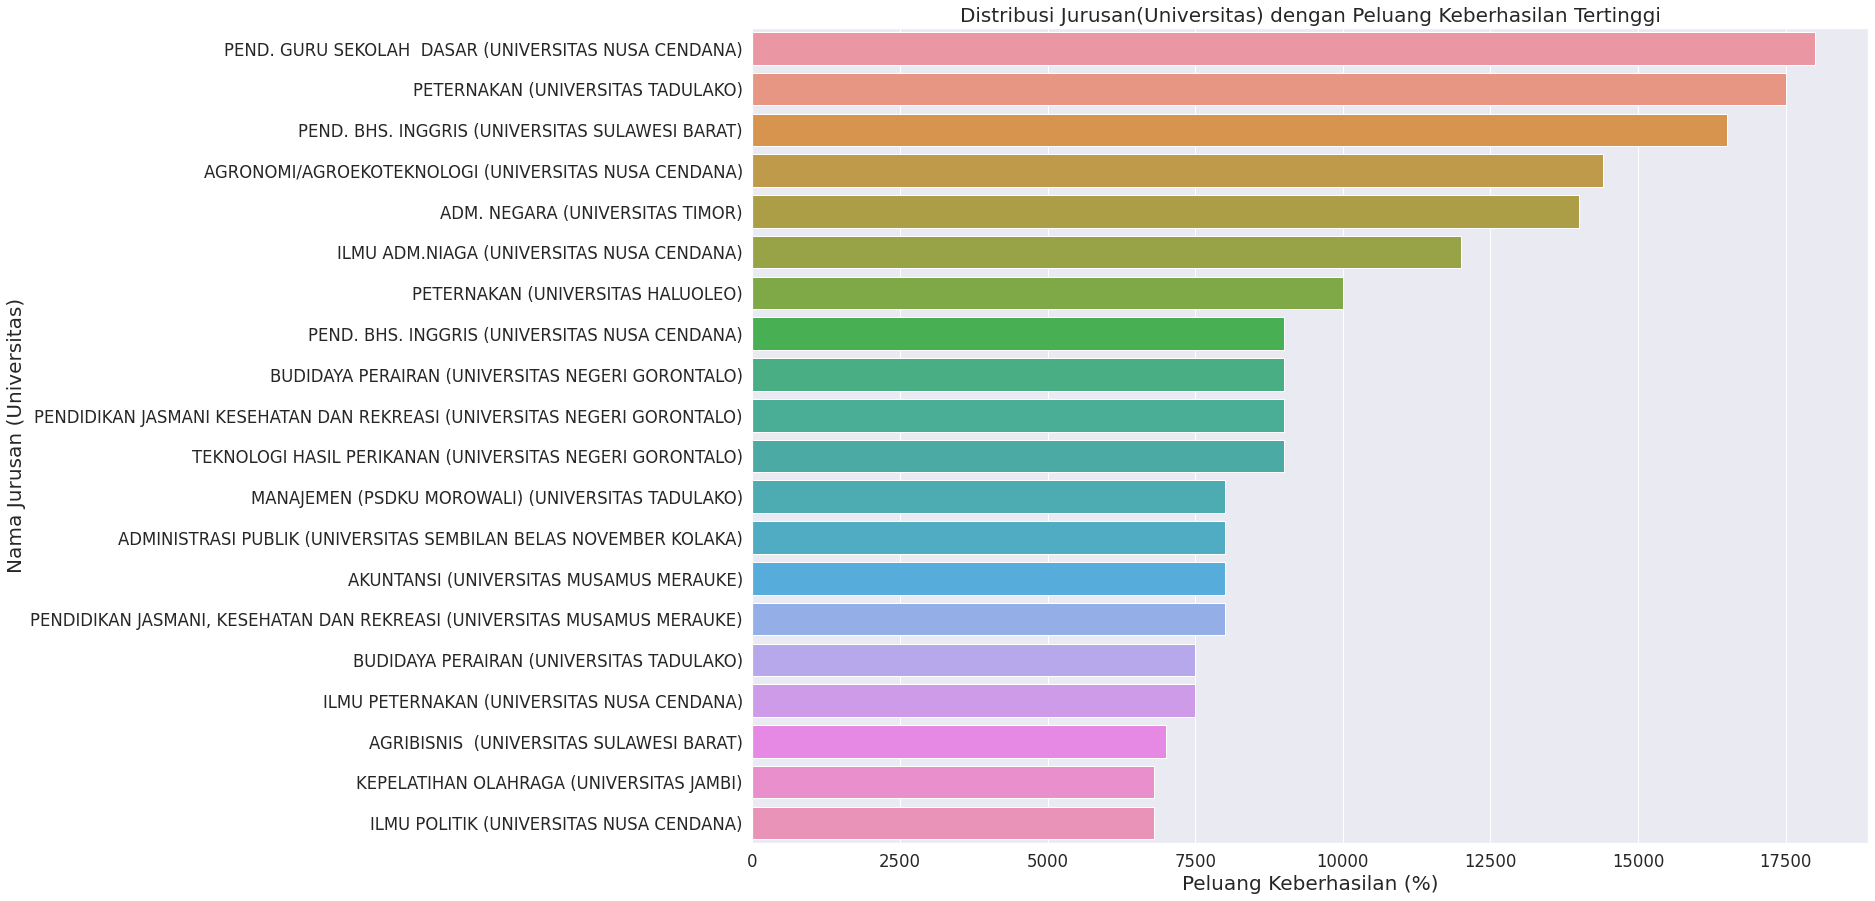

In [64]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_univ_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = False)[0:20], x='Peluang Keberhasilan (%)', y='Jurusan (Universitas)')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Jurusan (Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Terkecil')

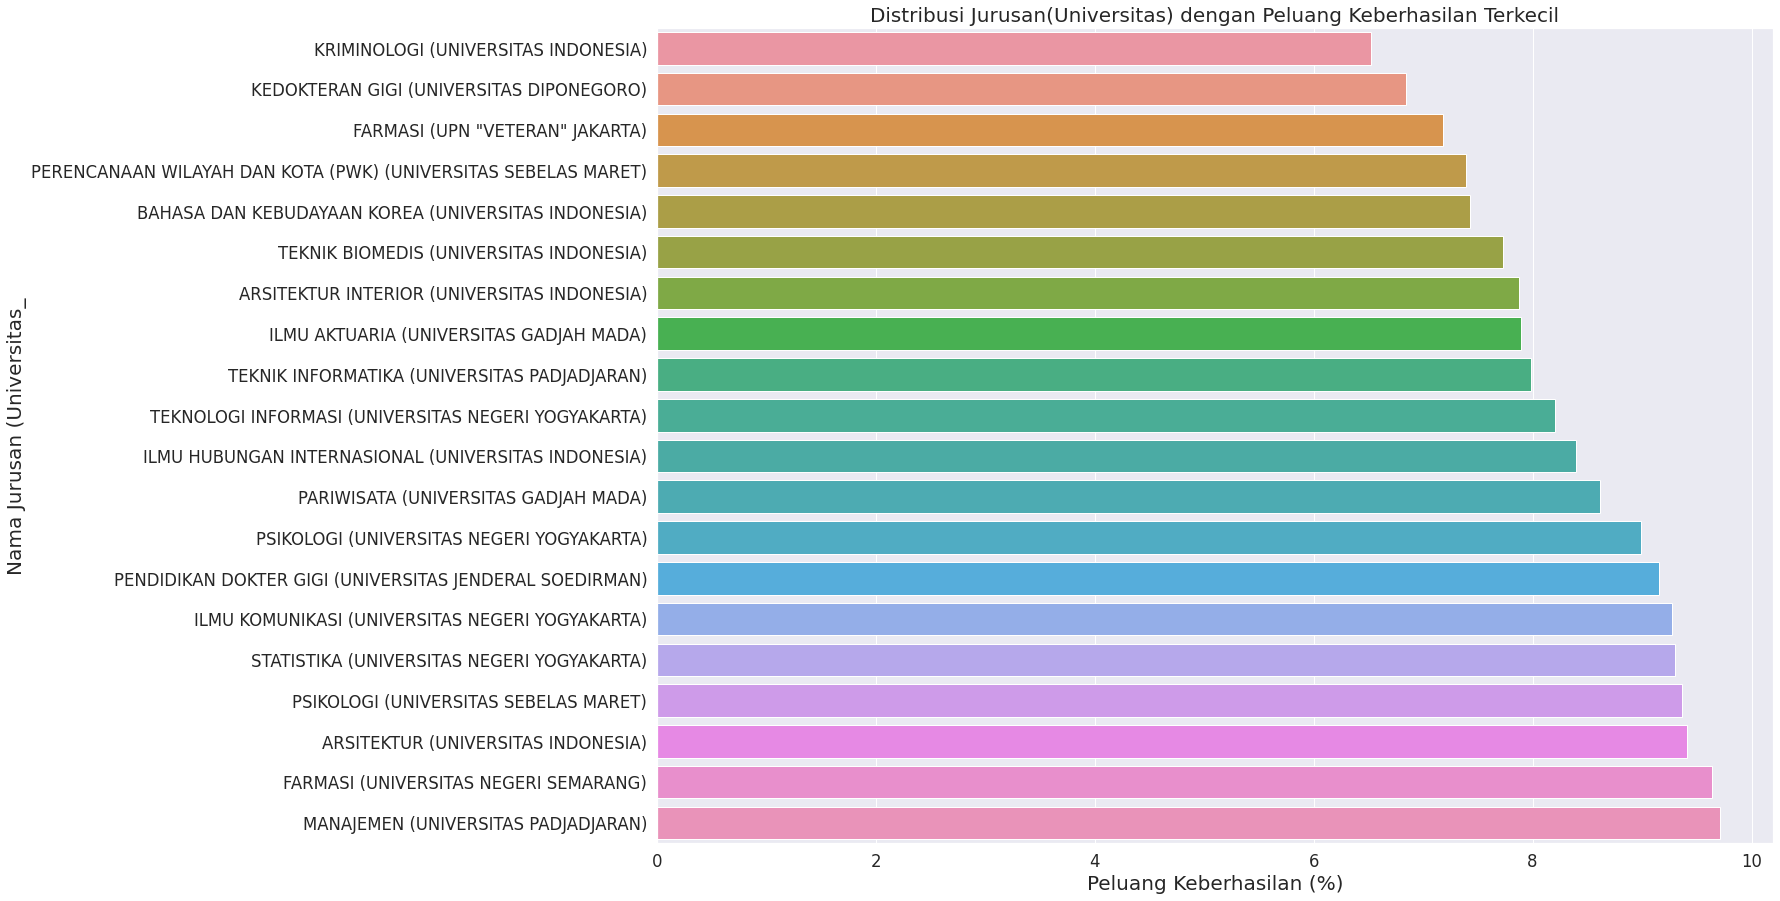

In [65]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_univ_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = True)[0:20], x='Peluang Keberhasilan (%)', y='Jurusan (Universitas)')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Jurusan (Universitas_', fontsize = 20)
plt.title('Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Terkecil', fontsize = 20)

Kita bisa melihat terdapat kesenjangan probabilitas keberhasilan masuk jurusan pada universitas untuk yang paling besar dan paling kecil. Kita juga dapat melihat bahwa terdapat perbedaan tipe jurusan dan universitas yang mencolok antara kedua kondisi diatas.

Semua jurusan dengan probabilitas masuk besar jauh lebih besar dari 100%, ini menyatakan bahwa jumlah pendaftar lebih sedikit ketimbang jumlah kapasitas yang disediakan, sedangkan persaingan di 20 jurusan pada universitas yang paling ketat hanya memberikan probabilitas masuk kurang dari 10%. Jurusan yang memiliki peluang masuk terbesar(sepi peminat) berkisar di bidang pendidikan, pertanian, peternakan, dan administrasi, sedangkan jurusan yang memiliki peluang masuk terkecil(paling kompetitif) berkisar di bidang kesehatan, data, kriminologi dan perencanaan. Namun tidak berhenti disitu. Kita akan melihat hubungan jurusan dengan peminat secara khusus di bagian berikutnya, disini kita akan melihat juga pengaruh universitas selain pengaruh jurusan. Memang benar bahwa peluang masuk terbesar berada di bidang pendidikan, pertanian, peternakan, dan administrasi, namun secara khusus kita bisa melihat bahwa jurusan-jurusan terendah tersebut berada di Universitas seperti Universitas Nusa Cendana, Universitas Gorontalo, Universitas Tadulako, atau Universitas Haluleo. Mengapa bukan Universitas Pendidikan Indonesia, Institut Pertanian Bogor, atau Universitas Gajah Mada? 

Kita sudah membahas pengaruh universitas sebelumnya, yaitu bahwa universitas di pulau Jawa jauh lebih diminati ketimbang universitas di luar pulau Jawa, makanya kita bisa melihat bahwa jurusan pendidikan di Universitas Pendidikan Indonesia memiliki persaingan yang cukup ketat, begitupula pertanian di Institut Pertanian Bogor. Namun ada alasan lain dan ini yang lebih penting. Kualitas dan akreditasi jurusan dan kampus juga sangat memengaruhi. Pendidikan Guru Sekolah Dasar universitas Nusa Cendana berakreditasi B, sedangkan Universitas Nusa Cendana itu sendiri juga berakreditasi B. Kita bisa bandingkan dengan akreditasi Pendidikan Guru Sekolah Dasar Universitas Pendidikan Indonesia yang berakreditasi A, selain itu Universitas Pendidikan Indonesia juga berakreditasi A$^{[9]}$. Maka dengan kombinasi alasan tersebut, terlihat mengapa jurusan-jurusan pada universitas tertentu sepi peminat sedangkan jurusan yang sama di universitas lain tidak. Selain itu sentimen jurusan bahwa peluang kerja di bidang kesehatan, data, kriminologi, teknik dan perencanaan sering dianggap lebih jelas ketimbang pendidikan, pertanian, dan peternakan, meski sebenarnya jurusan-jurusan ini pun juga memiliki peluang kerja yang jelas$^{[10,11]}$ juga memengaruhi minat peserta.




## Jurusan Favorit
---
Hal yang menarik adalah bahwa kita bisa mencari jurusan favorit tanpa memedulikan asal universitasnya. Kita ingin tahu jurusan apa sih yang paling diminati oleh peserta UTBK 2019. Maka dari itu kita akan membangun dataframe baru yang hanya berisi data-data yang kita perlukan saja.

In [66]:
major_choice_df = score_utbk_total_df.groupby('Pilihan Jurusan').count().reset_index()
major_choice_df = major_choice_df[['Pilihan Jurusan', 'Pilihan']].sort_values(by = 'Pilihan', ascending = False).rename(columns = {
    'Pilihan' : 'Jumlah Pemilih',
    'Pilihan Jurusan' : 'ID Jurusan'})
major_choice_df = pd.merge(major_choice_df, majors_df, on = 'ID Jurusan').drop(columns = ['ID Jurusan','ID Universitas']).rename(columns = {
    'Kapasitas Total' : 'Jumlah Kapasitas UTBK 2019'
})

major_choice_science_df = major_choice_df[major_choice_df['Rumpun Bidang'] == 'science' ]
major_choice_science_df = major_choice_science_df.groupby('Nama Jurusan').sum().reset_index().sort_values(by = 'Jumlah Pemilih', ascending = False)

major_choice_humanities_df = major_choice_df[major_choice_df['Rumpun Bidang'] == 'humanities' ].reset_index(drop = True).sort_values(by = 'Jumlah Pemilih', ascending = False)
major_choice_humanities_df = major_choice_humanities_df.groupby('Nama Jurusan').sum().reset_index().sort_values(by = 'Jumlah Pemilih', ascending = False)

major_choice_df = major_choice_df.groupby('Nama Jurusan').sum().reset_index().sort_values(by = 'Jumlah Pemilih', ascending = False)

major_choice_df.head()

Nama Jurusan  Jumlah Pemilih  Jumlah Kapasitas UTBK 2019
271          MANAJEMEN           10759                        5248
482  PENDIDIKAN DOKTER            9415                        1720
185         ILMU HUKUM            8346                        7239
205    ILMU KOMUNIKASI            7938                        2778
656          PSIKOLOGI            7513                        2419

Selanjutnya kita dapat melakukan plot mengenai jurusan yang memiliki peminat terbanyak dan jurusan yang memiliki peminat terkecil

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Terbanyak')

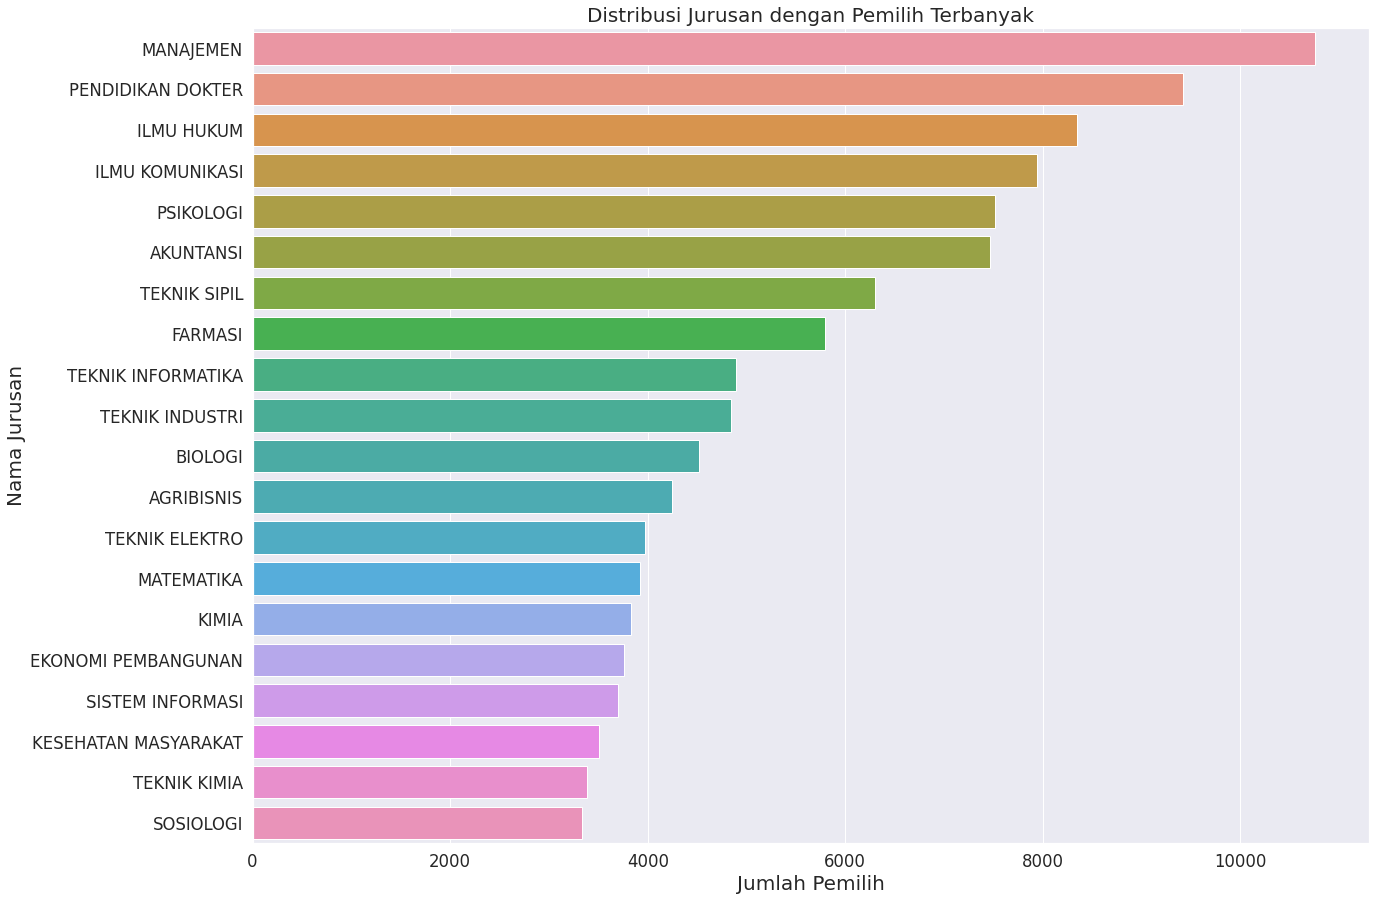

In [67]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_df[0:20], x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Terbanyak', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Tersedikit')

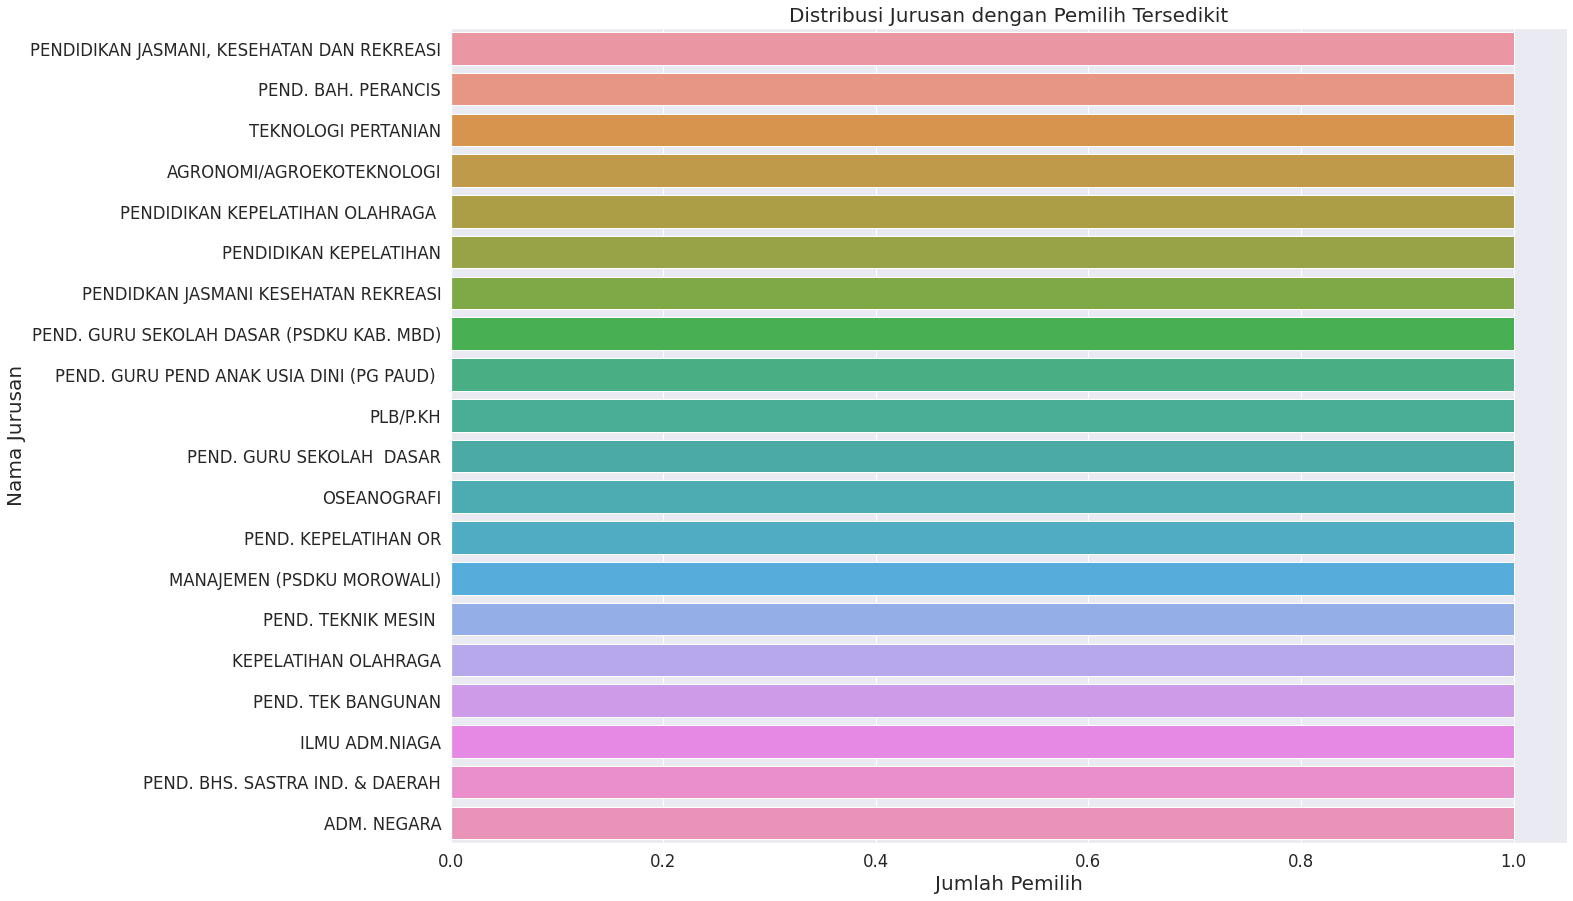

In [68]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_df.tail(20), x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Tersedikit', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Terbanyak Bidang Saintek')

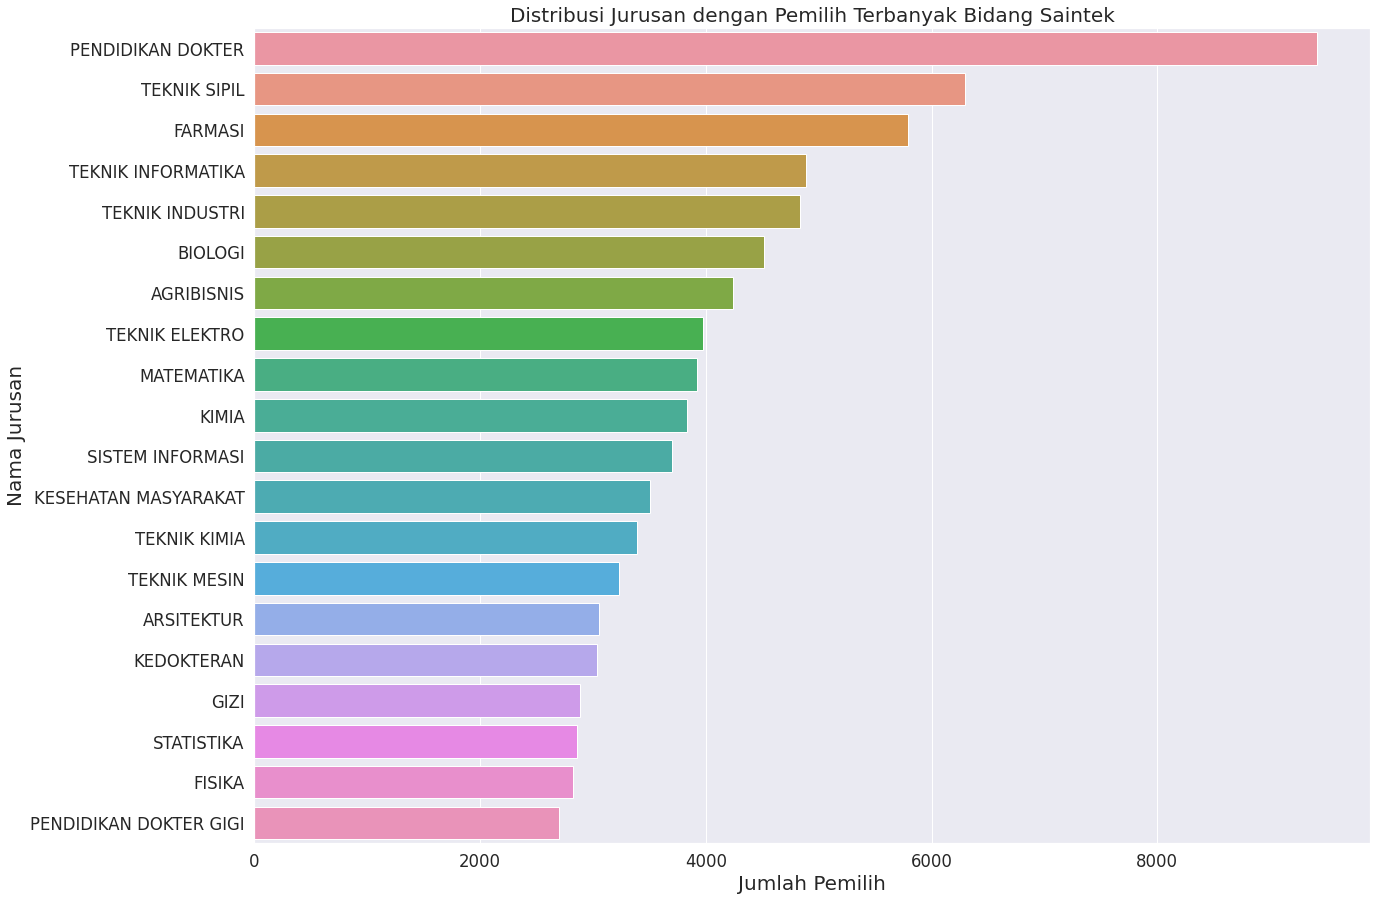

In [69]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_science_df.reset_index().head(20), x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Terbanyak Bidang Saintek', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Tersedikit Bidang Saintek')

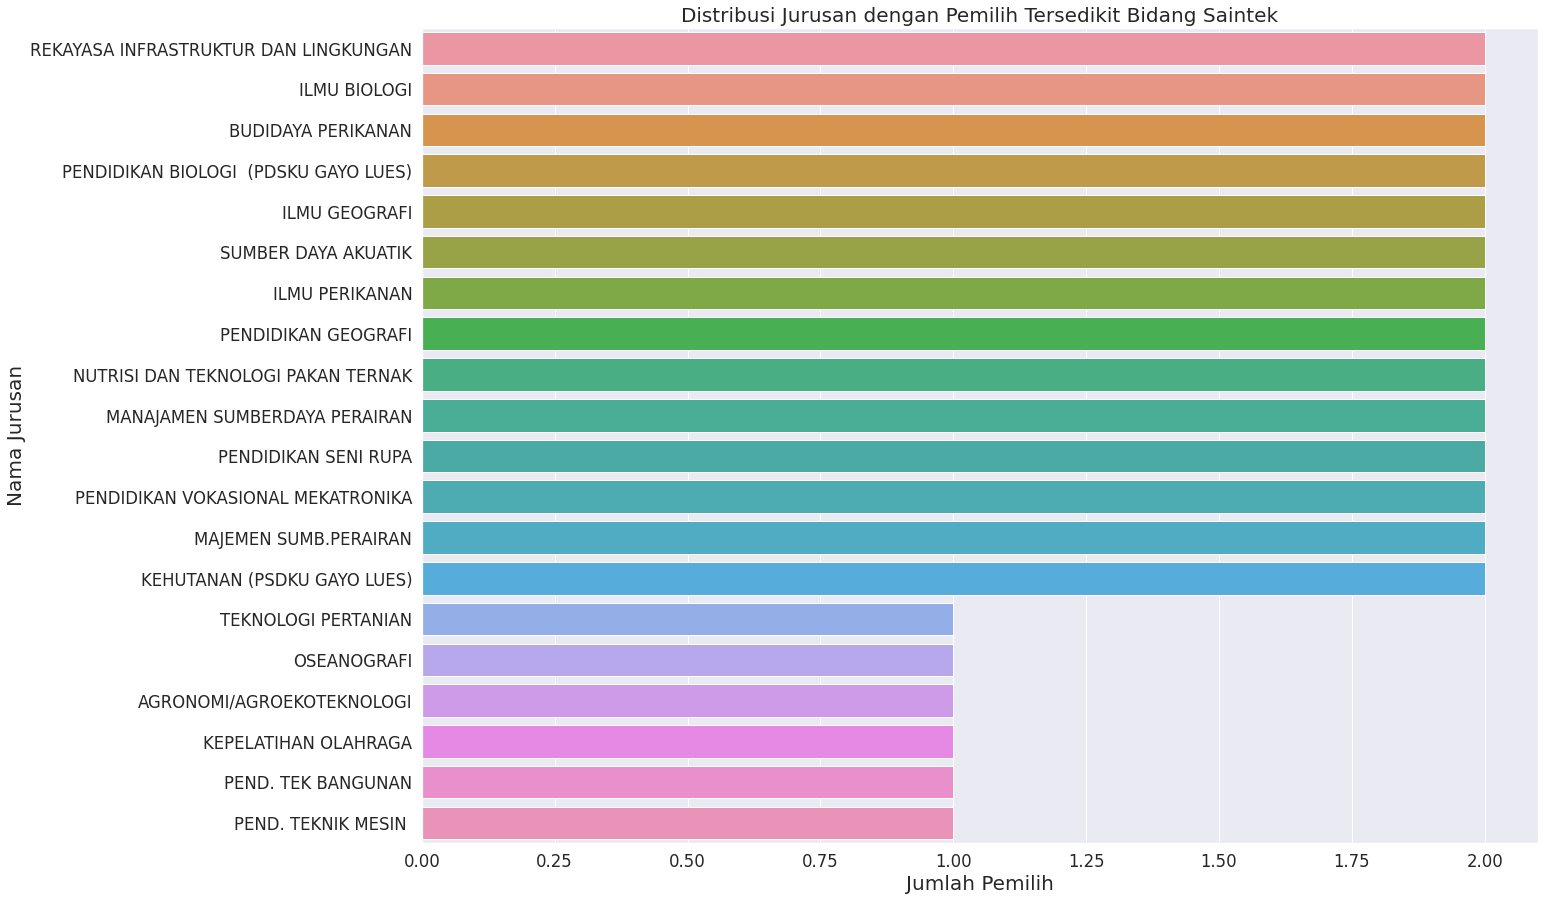

In [70]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_science_df.reset_index().tail(20), x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Tersedikit Bidang Saintek', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Terbanyak Bidang Soshum')

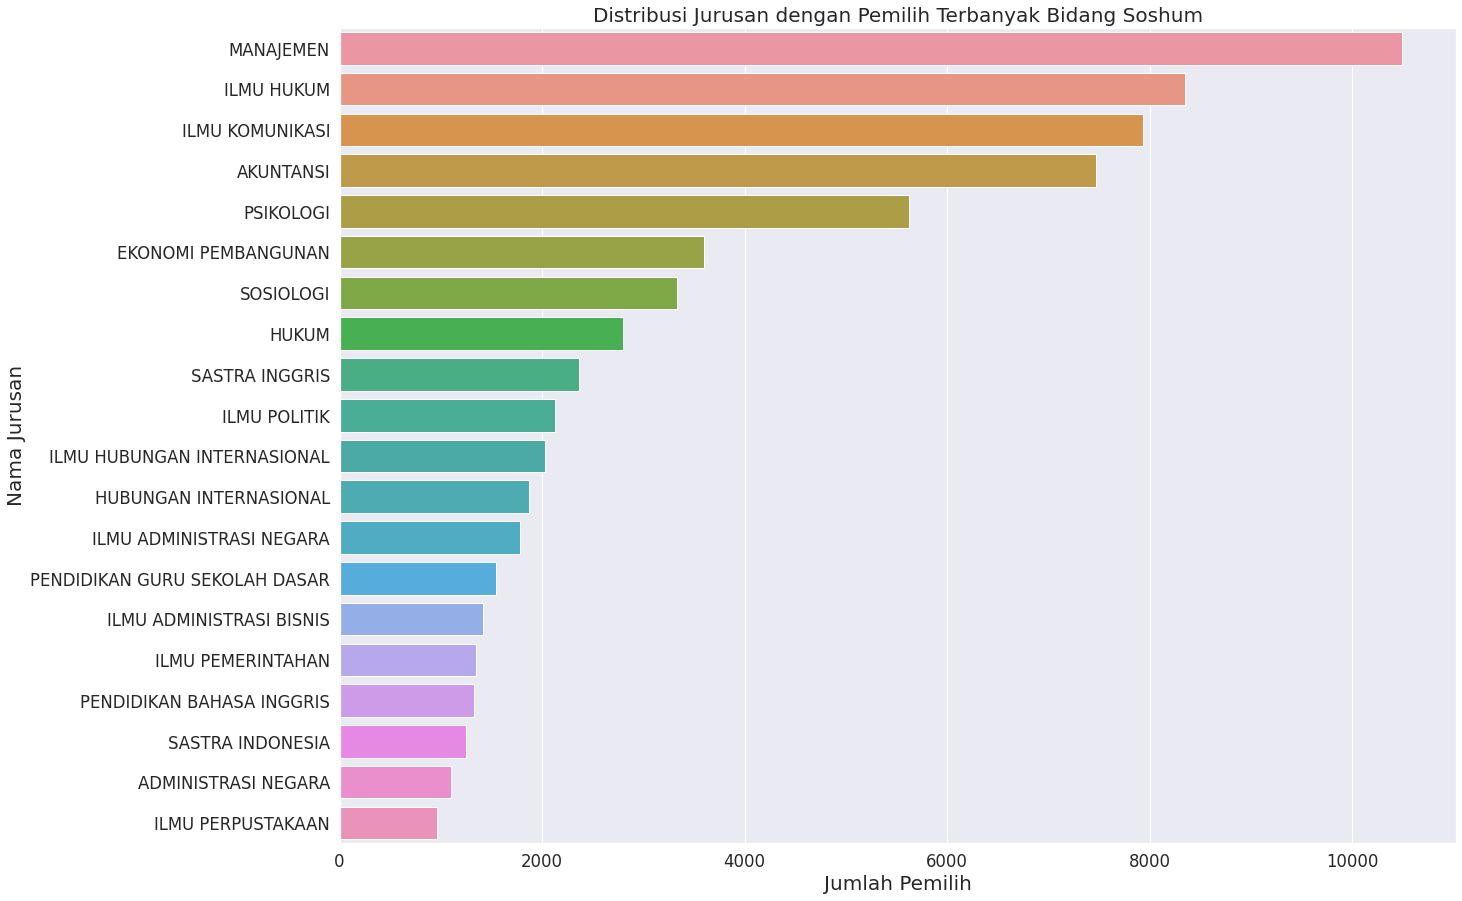

In [71]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_humanities_df.reset_index()[0:20], x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Terbanyak Bidang Soshum', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Pemilih Tersedikit Bidang Soshum')

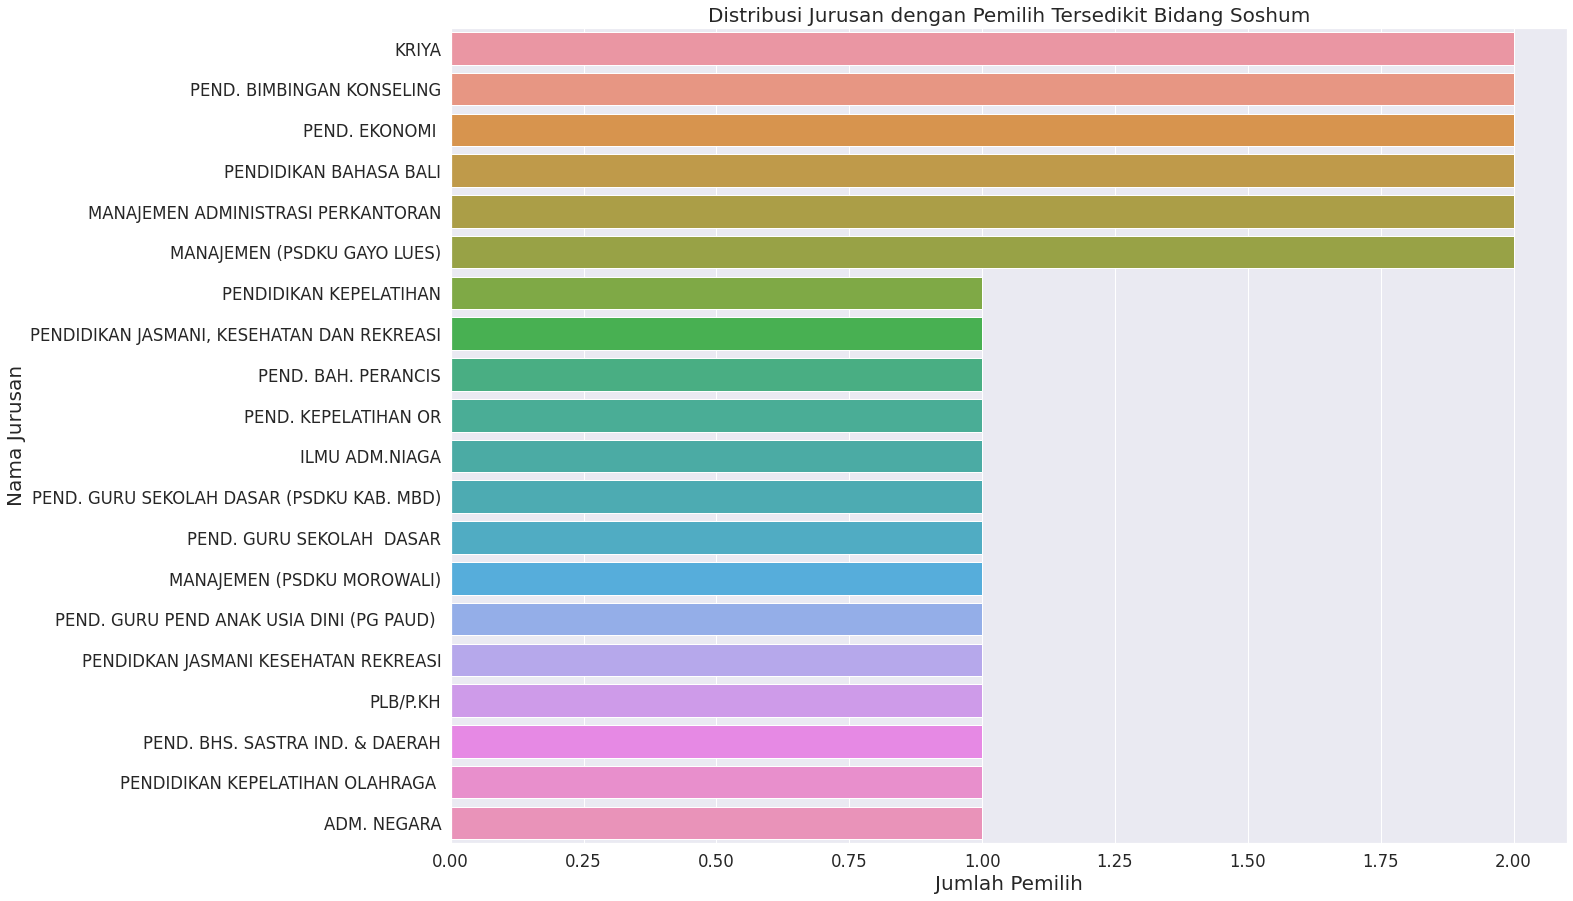

In [72]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_humanities_df.reset_index().tail(20), x='Jumlah Pemilih', y='Nama Jurusan')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Pemilih Tersedikit Bidang Soshum', fontsize = 20)

Kita bisa melihat bahwa jurusan yang paling diminati adalah manajemen, kedokteran, hukum, komunikasi, psikologi atau akutansi. Sedangkan jurusan yang paling sedikit peminatnya adalah lagi-lagi pendidikan. Ini juga karena alasan yang sudah kita bahas di bagian sebelumnya bahwa jurusan-jurusan yang paling diminati adalah jurusan yang memiliki prospek kerja yang pasti dan luas. Pendidikan juga memiliki prospek kerja yang pasti: Guru. Namun, berbeda dengan bidang kedokteran, hukum, ekonomi atau teknik, menjadi guru kurang diminati oleh peserta yang mengakibatkan peminat jurusan tersebut sangatlah kecil.

### Hubungan Jumlah Pemilih dengan Jumlah Kapasitas
---

Selanjutnya kita akan mengecek apakah ada korelasi antara jumlah pendaftar pada jurusan terhadap kapasitas penerimaan jurusan tersebut.

In [73]:
major_choice_df['Jumlah Pemilih'].corr(major_choice_df['Jumlah Kapasitas UTBK 2019'])

0.8988763660431965

Ternyata kita bisa melihat bahwa korelasi antara *Jumlah Pemilih* dengan *Jumlah Kapasitas UTBK 2019* sangatlah kuat. Ini ditunjukkan dari nilai korelasi Pearson dari kedua data tersebut adalah $\approx$ 0,9 yang berada pada rentang 0,8 $\leq$ x $\leq$ 1,0 yang memiliki korelasi kuat$^{[5]}$. Mengapa demikian? Kita tidak memiliki data untuk mendapat jawaban pasti mengenai pertanyaan sebab akibat dari hasil korelasi ini. Namun, kita bisa berasumsi bahwa semakin banyak peminat suatu jurusan, maka universitas akan membuka jurusan itu sebagai peluang yang akan menaikkan peminat. Namun ini hanyalah asumsi logis yang dapat diambil dari data korelasi yang kita miliki yang kebenarannya tidaklah pasti.

Kita akan melihat hubungan linier antara kedua data diatas.

0.8079787214310226

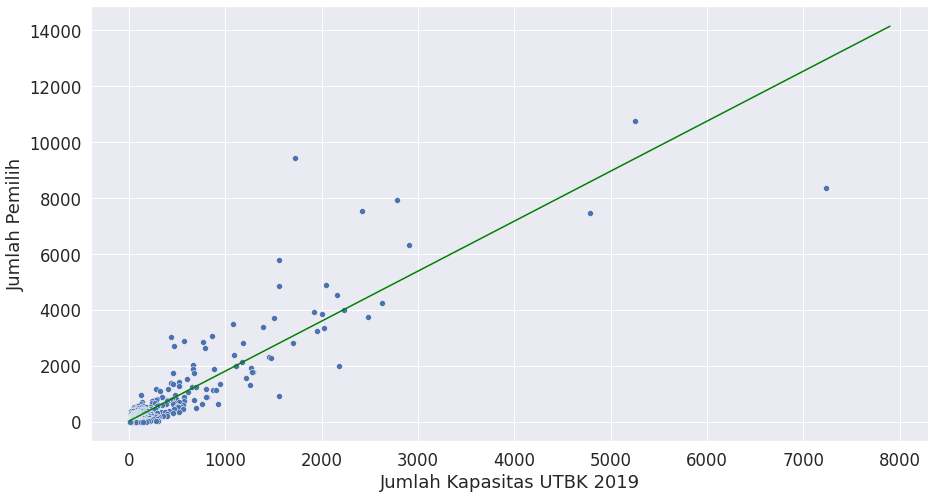

In [74]:
reg_model = LinearRegression()
reg_model.fit(major_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1),major_choice_df['Jumlah Pemilih'])

plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Jumlah Kapasitas UTBK 2019', y = 'Jumlah Pemilih', data = major_choice_df)
x = np.arange(0,8000,100)
plt.plot(x, reg_model.intercept_ + reg_model.coef_ * x, color = 'green')


display(reg_model.score(major_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_choice_df['Jumlah Pemilih']))


Kita juga bisa mengecek model lain yang tidak linear karena mengapa tidak?

In [75]:
for n in range(1,11):
  poly_reg = PolynomialFeatures(degree = n)
  feature = poly_reg.fit_transform(major_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1))
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(feature, major_choice_df['Jumlah Pemilih'])
  poly_reg_score = poly_reg_model.score(feature, major_choice_df['Jumlah Pemilih'])
  print('Hasil evaluasi model regresi polinom orde ' + str(n) + f' dengan uji R2  adalah ' + str(poly_reg_score))  

Hasil evaluasi model regresi polinom orde 1 dengan uji R2  adalah 0.8079787214310226
Hasil evaluasi model regresi polinom orde 2 dengan uji R2  adalah 0.8352931988016401
Hasil evaluasi model regresi polinom orde 3 dengan uji R2  adalah 0.8449734120700714
Hasil evaluasi model regresi polinom orde 4 dengan uji R2  adalah 0.8450384418412351
Hasil evaluasi model regresi polinom orde 5 dengan uji R2  adalah 0.8414329527514997
Hasil evaluasi model regresi polinom orde 6 dengan uji R2  adalah 0.8134489539643002
Hasil evaluasi model regresi polinom orde 7 dengan uji R2  adalah 0.7552467014601728
Hasil evaluasi model regresi polinom orde 8 dengan uji R2  adalah 0.6904040480613457
Hasil evaluasi model regresi polinom orde 9 dengan uji R2  adalah 0.6350543642705088
Hasil evaluasi model regresi polinom orde 10 dengan uji R2  adalah 0.589801243150979


In [76]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_univ_choice_df['Jumlah Pemilih'])
print('Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah ' + str(regressor.score(major_univ_choice_df['Jumlah Kapasitas UTBK 2019'].values.reshape(-1,1), major_univ_choice_df['Jumlah Pemilih'])))


Hasil evaluasi model Decision Tree Regressor dengan uji R2  adalah 0.3011403314799931


Kita bisa melihat bahwa korelasi antara data *Jumlah Pemilih* dengan *Jumlah Kapasitas UTBK 2019* bersifat kuat dalam model linier. Kita dapat menyimpulkan ini dengan melihat hasil pemodelan diatas bahwa semakin kita menggunakan model yang nonlinier, kita akan mendapatkan nilai evaluasi $R^2$ yang berkurang. Pada model linier kita mendapatkan hasil evaluasi $R^2$ sebesar $\approx$ 0,81 dan pada model polinom orde 10 kita mendapatkan hasil evaluasi $R^2$ sebesar $\approx 0,6$ dan pada model Decision Tree Regressor kita mendapatkan hasil evaluasi $R^2$ sebesar $\approx 0,3$

### Peluang Keberhasilan
---
Kita dapat mencari tahu berapa persen peluang keberhasilan peserta memasuki jurusan di universitas tertentu. Untuk mendapatkan persentase keberhasilan peserta, kita tinggal bandingkan  kapasitas yang disediakan oleh jurusan pada universitas dengan jumlah peserta yang berminat mendaftar pada jurusan tersebut.

In [77]:
major_choice_df['Peluang Keberhasilan (%)'] = 100*major_choice_df['Jumlah Kapasitas UTBK 2019']/major_choice_df['Jumlah Pemilih']
major_choice_df = major_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = False)
major_univ_choice_df.head()

ID Jurusan  Jumlah Pemilih Rumpun Bidang  Jumlah Kapasitas UTBK 2019  \
2715     6312101               1    humanities                         180   
2028     7311086               1       science                         175   
3088     7412067               1    humanities                         165   
2718     6311086               1       science                         144   
3155     6322014               1    humanities                         140   

                                  Jurusan (Universitas)  \
2715  PEND. GURU SEKOLAH  DASAR (UNIVERSITAS NUSA CE...   
2028                  PETERNAKAN (UNIVERSITAS TADULAKO)   
3088    PEND. BHS. INGGRIS (UNIVERSITAS SULAWESI BARAT)   
2718  AGRONOMI/AGROEKOTEKNOLOGI (UNIVERSITAS NUSA CE...   
3155                    ADM. NEGARA (UNIVERSITAS TIMOR)   

      Peluang Keberhasilan (%)  
2715                   18000.0  
2028                   17500.0  
3088                   16500.0  
2718                   14400.0  
3155                   14000.0

Selanjutnya kita dapat melakukan plot untuk mengetahui persebaran universitas terhadap peluang keberhasilannya.

Text(0.5, 1.0, 'Distribusi Jurusan dengan Peluang Keberhasilan Tertinggi')

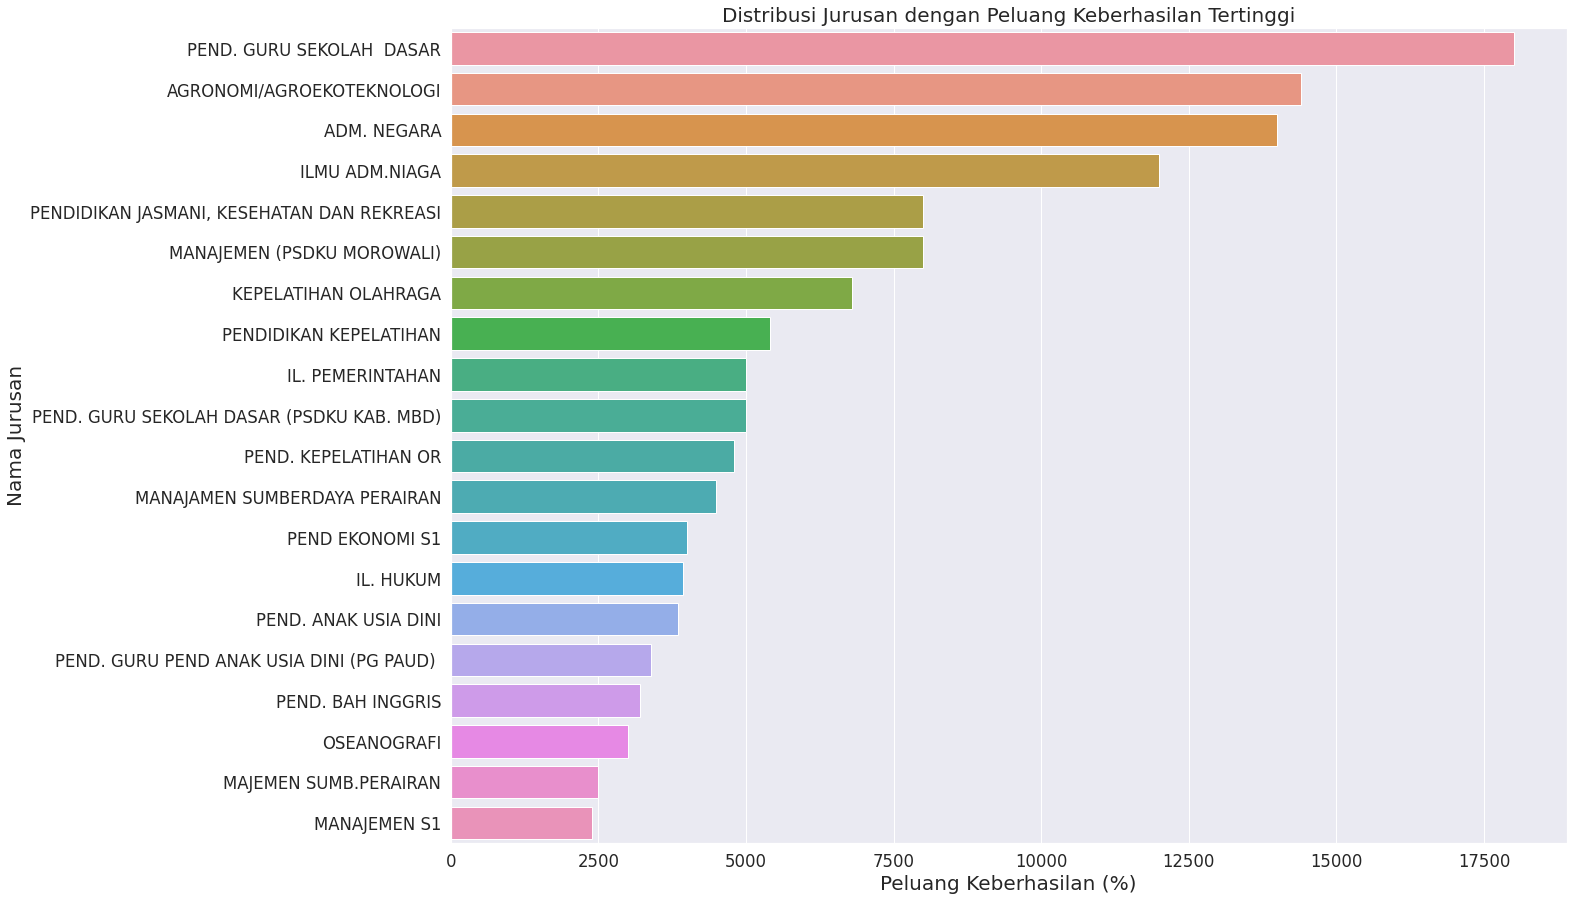

In [78]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = False)[0:20], x='Peluang Keberhasilan (%)', y='Nama Jurusan')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan dengan Peluang Keberhasilan Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Terkecil')

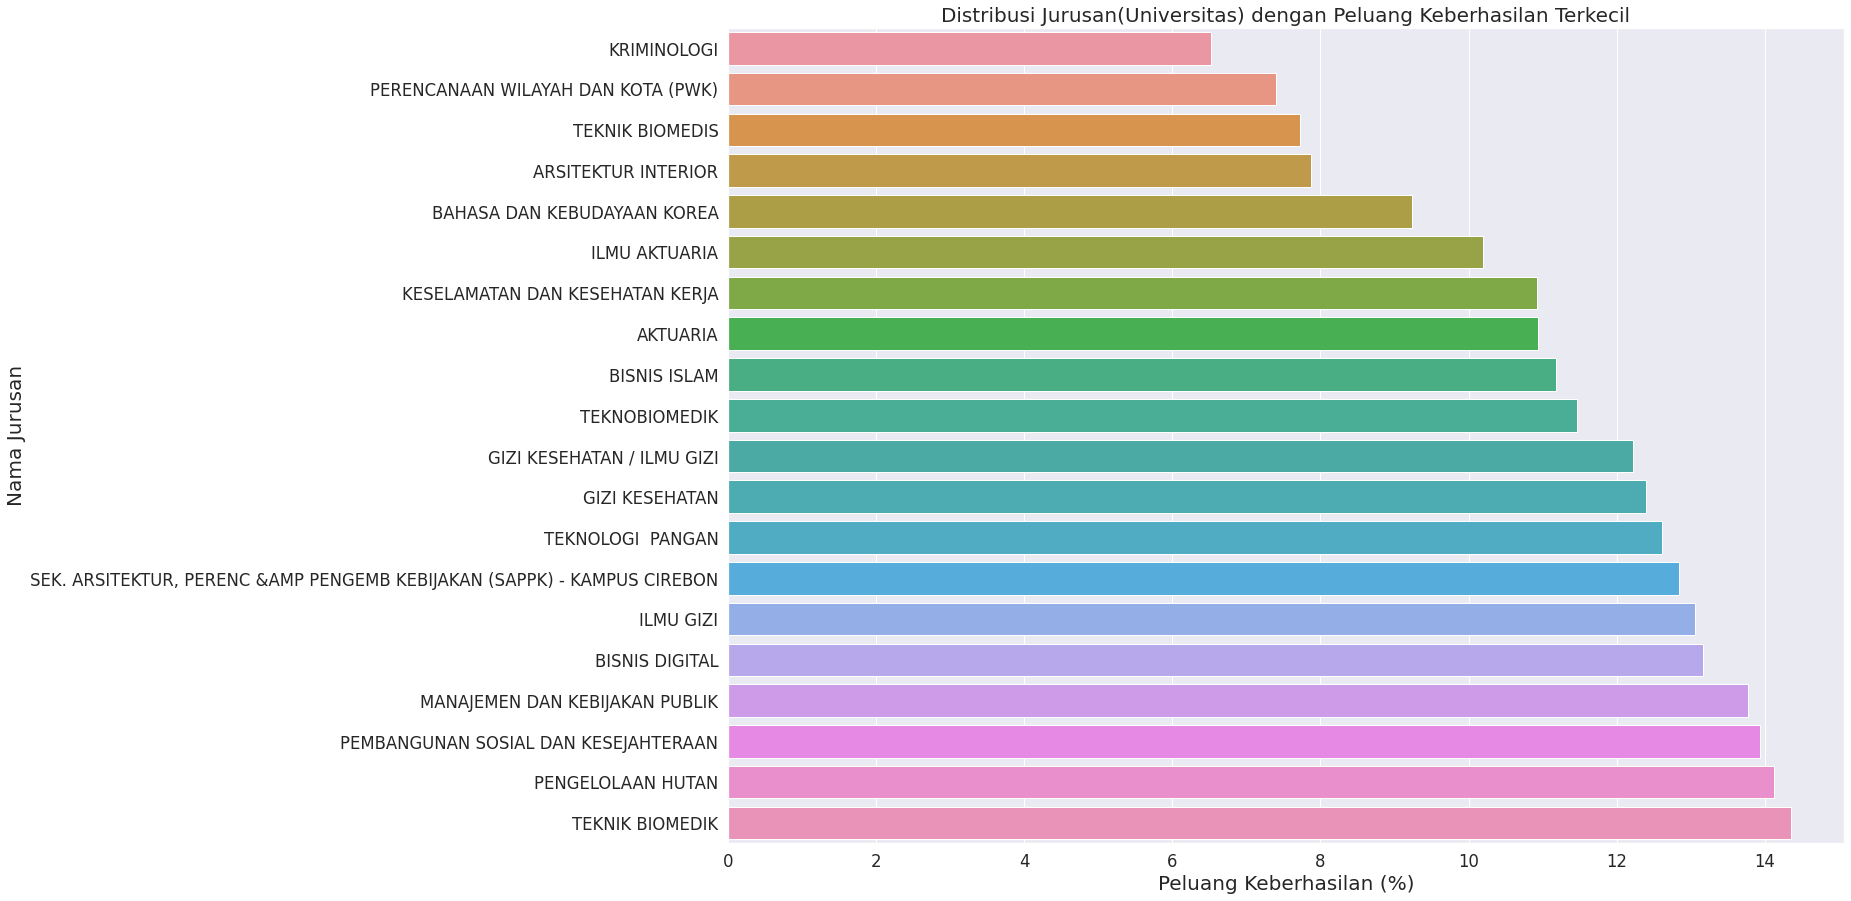

In [79]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=major_choice_df.sort_values(by = 'Peluang Keberhasilan (%)', ascending = True)[0:20], x='Peluang Keberhasilan (%)', y='Nama Jurusan')
plt.xlabel('Peluang Keberhasilan (%)', fontsize = 20)
plt.ylabel('Nama Jurusan', fontsize = 20)
plt.title('Distribusi Jurusan(Universitas) dengan Peluang Keberhasilan Terkecil', fontsize = 20)

# Distribusi Nilai
---

Dalam bidang ini, kita akan mengetahui distribusi nilai UTBK dari peserta dan korelasi nilai antar bidang uji (mata pelajaran ujian)

In [80]:
display(score_science_total_df.sample(5))
display(score_humanities_total_df.sample(5))
display(score_utbk_total_df.sample(5))

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
46642          3111103                  311      196698     501.25     470.00   
37875          7311183                  731      159631     618.75     530.50   
63391          1311086                  131      252511     602.50     603.25   
57819          3611155                  361      231173     396.50     743.00   
77751          3721085                  372      307426     549.00     490.50   

       Nilai UTBK Rumpun Bidang  Pilihan  
46642     485.625       science    Kedua  
37875     574.625       science  Pertama  
63391     602.875       science  Pertama  
57819     569.750       science    Kedua  
77751     519.750       science  Pertama

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
58358          3632066                  363      316402      573.0     433.25   
10479          3722355                  372       77037      525.4     546.00   
46534          3532146                  353      268775      471.2     517.75   
2872           3232077                  323       23831      497.8     576.25   
54818          5112072                  511      301838      551.0     581.25   

       Nilai UTBK Rumpun Bidang  Pilihan  
58358     503.125    humanities  Pertama  
10479     535.700    humanities    Kedua  
46534     494.475    humanities  Pertama  
2872      537.025    humanities  Pertama  
54818     566.125    humanities    Kedua

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
50192          3651044                  365      207592     569.75     490.00   
55480          3531062                  353      223683     597.75     563.00   
27412          3861072                  386      117400     501.25     538.25   
28275          3821024                  382      120520     644.00     587.00   
25091          3331292                  333      109551     569.75     597.00   

       Nilai UTBK Rumpun Bidang  Pilihan  
50192     529.875       science  Pertama  
55480     580.375       science    Kedua  
27412     519.750       science    Kedua  
28275     615.500       science  Pertama  
25091     583.375       science    Kedua

Agar lebih mudah dibaca, kita akan mengubah pilihan jurusan dan pilihan universitas dalam bentuk nama jurusan dan nama tulisan target

In [81]:
score_science_total_df.reset_index()['Pilihan Jurusan'][2]

3721093

In [82]:
univ_maj_df2 = univ_maj_df.groupby(['ID Universitas', 'Nama Universitas']).count().reset_index().set_index('ID Universitas')
univ_maj_df2['Nama Universitas']

ID Universitas
111        UNIVERSITAS SYIAH KUALA
112       UNIVERSITAS MALIKUSSALEH
113         UNIVERSITAS TEUKU UMAR
114            UNIVERSITAS SAMUDRA
115                      ISBI ACEH
                  ...             
821            UNIVERSITAS KHAIRUN
911       UNIVERSITAS CENDERAWASIH
912    UNIVERSITAS MUSAMUS MERAUKE
913               ISBI TANAH PAPUA
921              UNIVERSITAS PAPUA
Name: Nama Universitas, Length: 85, dtype: object

In [83]:
# score_science_total_df2 = score_science_total_df.copy()
score_science_total_df['Nama Pilihan Jurusan'] = score_science_total_df['Pilihan Jurusan'].map(univ_maj_df.set_index('ID Jurusan')['Nama Jurusan'])
score_science_total_df['Nama Pilihan Universitas'] = score_science_total_df['Pilihan Universitas'].map(univ_maj_df.groupby(['ID Universitas', 'Nama Universitas']).count().reset_index().set_index('ID Universitas')['Nama Universitas'])
score_science_total_df['Kapasitas UTBK 2019'] = score_science_total_df['Pilihan Jurusan'].map(univ_maj_df.groupby(['ID Jurusan', 'Kapasitas UTBK 2019']).count().reset_index().set_index('ID Jurusan')['Kapasitas UTBK 2019']).fillna(0).astype(int)

# score_humanities_total_df2 =score_humanities_total_df.copy()
score_humanities_total_df['Nama Pilihan Jurusan'] = score_humanities_total_df['Pilihan Jurusan'].map(univ_maj_df.set_index('ID Jurusan')['Nama Jurusan'])
score_humanities_total_df['Nama Pilihan Universitas'] = score_humanities_total_df['Pilihan Universitas'].map(univ_maj_df.groupby(['ID Universitas', 'Nama Universitas']).count().reset_index().set_index('ID Universitas')['Nama Universitas'])
score_humanities_total_df['Kapasitas UTBK 2019'] = score_humanities_total_df['Pilihan Jurusan'].map(univ_maj_df.groupby(['ID Jurusan', 'Kapasitas UTBK 2019']).count().reset_index().set_index('ID Jurusan')['Kapasitas UTBK 2019']).fillna(0).astype(int)

# score_utbk_total_df2 = score_utbk_total_df.copy()
score_utbk_total_df['Nama Pilihan Jurusan'] = score_utbk_total_df['Pilihan Jurusan'].map(univ_maj_df.set_index('ID Jurusan')['Nama Jurusan'])
score_utbk_total_df['Nama Pilihan Universitas'] = score_utbk_total_df['Pilihan Universitas'].map(univ_maj_df.groupby(['ID Universitas', 'Nama Universitas']).count().reset_index().set_index('ID Universitas')['Nama Universitas'])
score_utbk_total_df['Kapasitas UTBK 2019'] = score_utbk_total_df['Pilihan Jurusan'].map(univ_maj_df.groupby(['ID Jurusan', 'Kapasitas UTBK 2019']).count().reset_index().set_index('ID Jurusan')['Kapasitas UTBK 2019']).fillna(0).astype(int)

display(score_science_total_df.sample(5))
display(score_humanities_total_df.sample(5))
display(score_utbk_total_df.sample(5))

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
6667           3341197                  334       35729     548.25     668.25   
79150          1211112                  121      312027     455.75     535.50   
45299          3611406                  361      191641     562.00     482.00   
65291          3611325                  361      258246     536.50     560.75   
57672          3651052                  365      230752     592.50     628.25   

       Nilai UTBK Rumpun Bidang  Pilihan          Nama Pilihan Jurusan  \
6667      608.250       science  Pertama                  TEKNIK SIPIL   
79150     495.625       science  Pertama                        FISIKA   
45299     522.000       science  Pertama                  TEKNIK SIPIL   
65291     548.625       science  Pertama  ILMU DAN INDUSTRI PETERNAKAN   
57672     610.375       science    Kedua            TEKNIK INFORMATIKA   

                      Nama Pilihan Universitas  Kapasitas UTBK 2019  
6667          UNIVERSITAS PENDIDIKAN INDONESIA                   21  
79150               UNIVERSITAS SUMATERA UTARA                   17  
45299                  UNIVERSITAS GADJAH MADA                   27  
65291                  UNIVERSITAS GADJAH MADA                   54  
57672  UNIVERSITAS ISLAM NEGERI SUNAN KALIJAGA                   10

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
25946          3562273                  356      173665      507.2     550.25   
46323          3732222                  373      266754      514.2     626.00   
2958           3722011                  372       24473      453.2     511.25   
39434          3622385                  362      236314      439.0     560.25   
11299          3242017                  324       81823      601.6     646.50   

       Nilai UTBK Rumpun Bidang  Pilihan Nama Pilihan Jurusan  \
25946     528.725    humanities  Pertama       SASTRA INGGRIS   
46323     570.100    humanities  Pertama           PSIKOLOGI    
2958      482.225    humanities  Pertama           ILMU HUKUM   
39434     499.625    humanities    Kedua            PSIKOLOGI   
11299     624.050    humanities    Kedua            MANAJEMEN   

            Nama Pilihan Universitas  Kapasitas UTBK 2019  
25946    UNIVERSITAS NEGERI SEMARANG                   13  
46323      UNIVERSITAS NEGERI MALANG                   40  
2958           UNIVERSITAS BRAWIJAYA                  104  
39434  UNIVERSITAS NEGERI YOGYAKARTA                   12  
11299          UPN "VETERAN" JAKARTA                   56

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  Nilai TPS  \
48460          3511193                  351      202286     528.75     597.25   
57745          3341054                  334      230942     647.00     377.50   
46025          3512092                  351      263768     593.00     518.75   
35265          3711373                  371      147714     581.50     578.00   
31159          3632012                  363      200184     528.00     627.25   

       Nilai UTBK Rumpun Bidang  Pilihan         Nama Pilihan Jurusan  \
48460     563.000       science  Pertama                   PETERNAKAN   
57745     512.250       science  Pertama     PENDIDIKAN ILMU KOMPUTER   
46025     555.875    humanities    Kedua  BAHASA DAN SASTRA INDONESIA   
35265     579.750       science    Kedua                   PETERNAKAN   
31159     577.625    humanities  Pertama                    MANAJEMEN   

               Nama Pilihan Universitas  Kapasitas UTBK 2019  
48460    UNIVERSITAS JENDERAL SOEDIRMAN                   44  
57745  UNIVERSITAS PENDIDIKAN INDONESIA                   16  
46025    UNIVERSITAS JENDERAL SOEDIRMAN                   12  
35265                UNIVERSITAS JEMBER                   10  
31159          UPN "VETERAN" YOGYAKARTA                   64

Kita dapat melihat distribusi nilai UTBK untuk rumpun bidang saintek dan soshum

Text(0.01, 0.5, 'Jumlah')

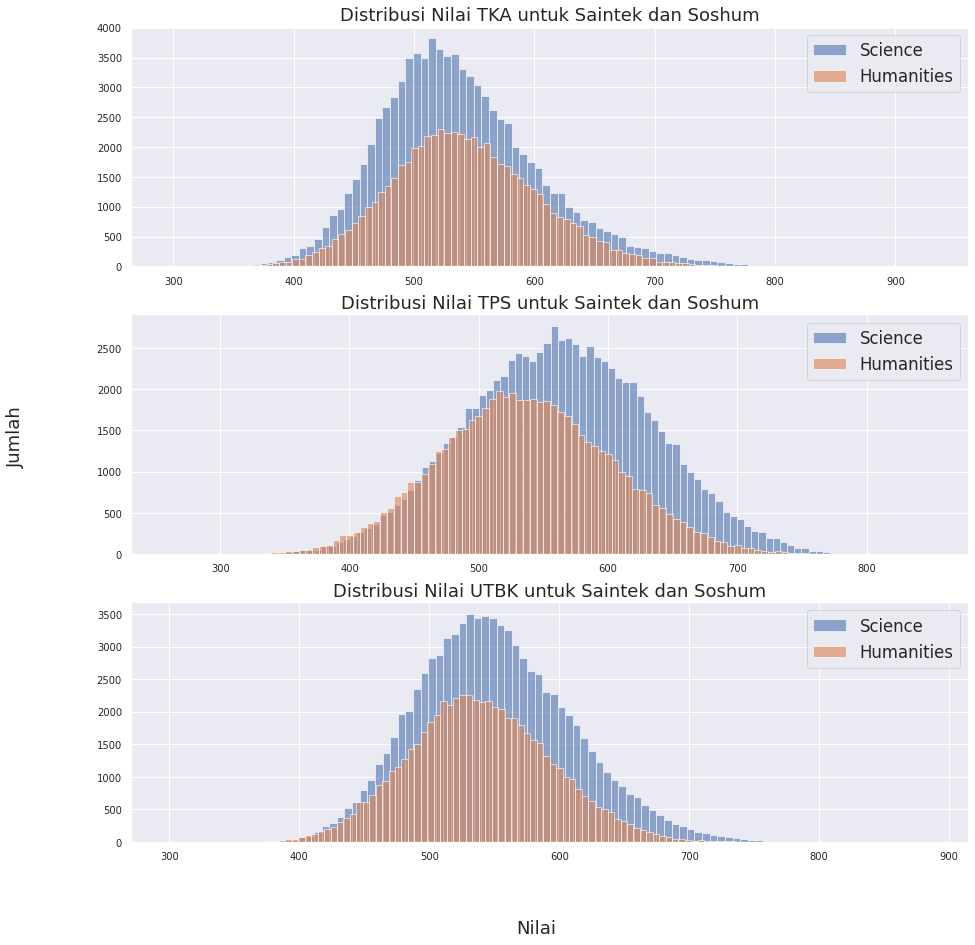

In [84]:
fig,(ax_tka,ax_tps, ax_utbk) = plt.subplots(3, figsize = (15,15))
ax_utbk.hist(score_science_df['Nilai UTBK'], bins = 100, alpha = 0.6, label = 'Science')
ax_utbk.hist(score_humanities_df['Nilai UTBK'], bins = 100, alpha = 0.6, label = 'Humanities')
ax_utbk.tick_params(axis='both', which='major', labelsize=10)
ax_utbk.title.set_text('Distribusi Nilai UTBK untuk Saintek dan Soshum')
ax_utbk.legend()

ax_tka.hist(score_science_df['Nilai TKA Saintek'], bins = 100, alpha = 0.6, label = 'Science')
ax_tka.hist(score_humanities_df['Nilai TKA Soshum'], bins = 100, alpha = 0.6, label = 'Humanities')
ax_tka.tick_params(axis='both', which='major', labelsize=10)
ax_tka.title.set_text('Distribusi Nilai TKA untuk Saintek dan Soshum')
ax_tka.legend()


ax_tps.hist(score_science_df['Nilai TPS'], bins = 100, alpha = 0.6, label = 'Science')
ax_tps.hist(score_humanities_df['Nilai TPS'], bins = 100, alpha = 0.6, label = 'Humanities')
ax_tps.tick_params(axis='both', which='major', labelsize=10)
ax_tps.title.set_text('Distribusi Nilai TPS untuk Saintek dan Soshum')
ax_tps.legend()

fig.text(0.5, 0.04, 'Nilai', ha='center')
fig.text(0.01, 0.5, 'Jumlah', va='center', rotation='vertical')

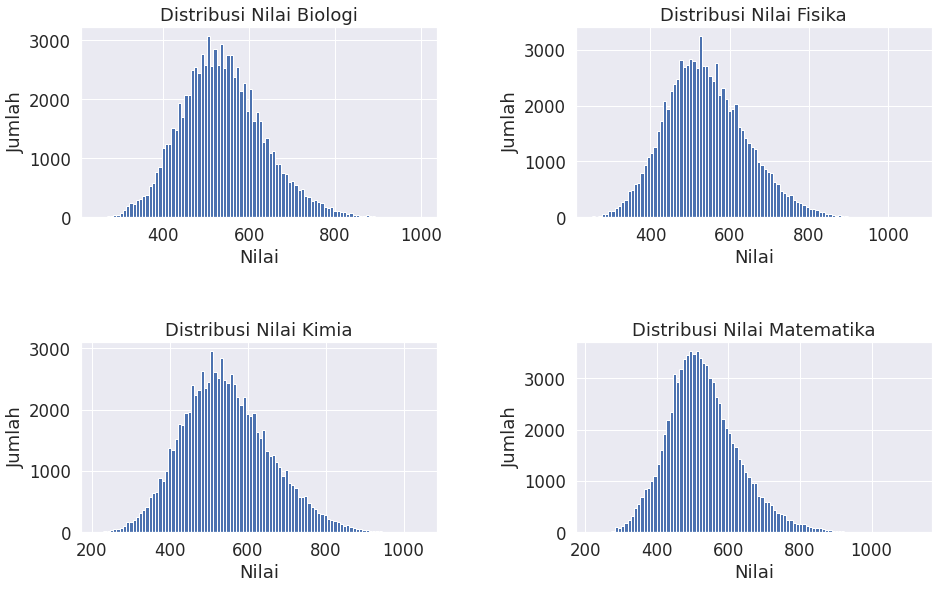

In [85]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.tight_layout(pad = 5)

# Define numeric columns on "Score Humanities" Data
science_tka = ['Nilai Biologi', 'Nilai Fisika', 'Nilai Kimia', 'Nilai Matematika']

for ax, n in zip(ax.flatten(), science_tka):
    ax.hist(score_science_df[n], bins = 100)
    ax.title.set_text('Distribusi ' + n)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Jumlah')

plt.show()

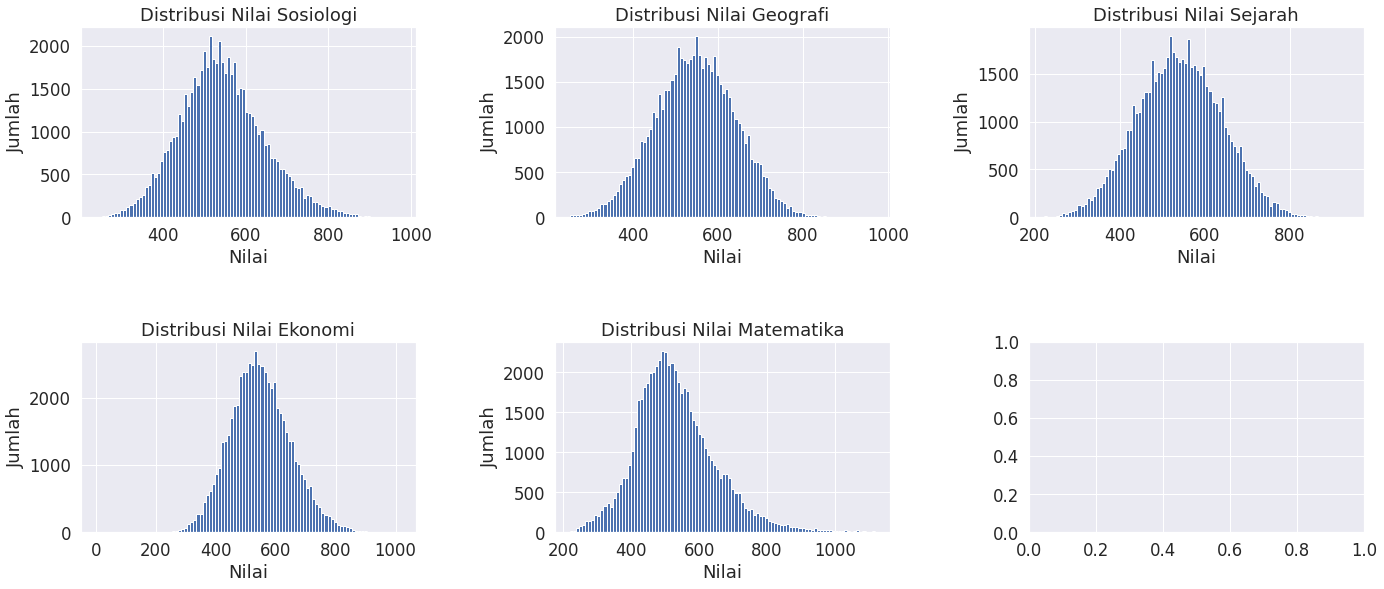

In [86]:
fig, ax = plt.subplots(2, 3, figsize = (21, 10))
fig.tight_layout(pad = 5)

# Define numeric columns on "Score Humanities" Data
humanities_tka = ['Nilai Sosiologi', 'Nilai Geografi', 'Nilai Sejarah', 'Nilai Ekonomi', 'Nilai Matematika']

for ax, n in zip(ax.flatten(), humanities_tka):
    ax.hist(score_humanities_df[n], bins = 100)
    ax.title.set_text('Distribusi ' + n)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Jumlah')

plt.show()

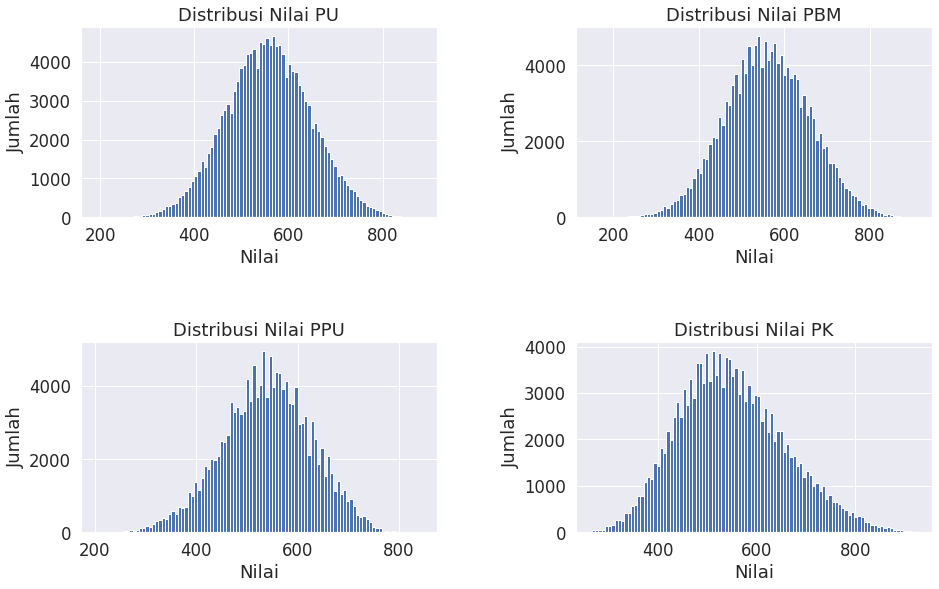

In [87]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.tight_layout(pad = 5)

# Define numeric columns on "Score Humanities" Data
tps = ['Nilai PU', 'Nilai PBM', 'Nilai PPU', 'Nilai PK']

for ax, n in zip(ax.flatten(), tps):
    ax.hist(score_utbk_df[n], bins = 100)
    ax.title.set_text('Distribusi ' + n)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Jumlah')

plt.show()

## Mencari Korelasi antar nilai
---

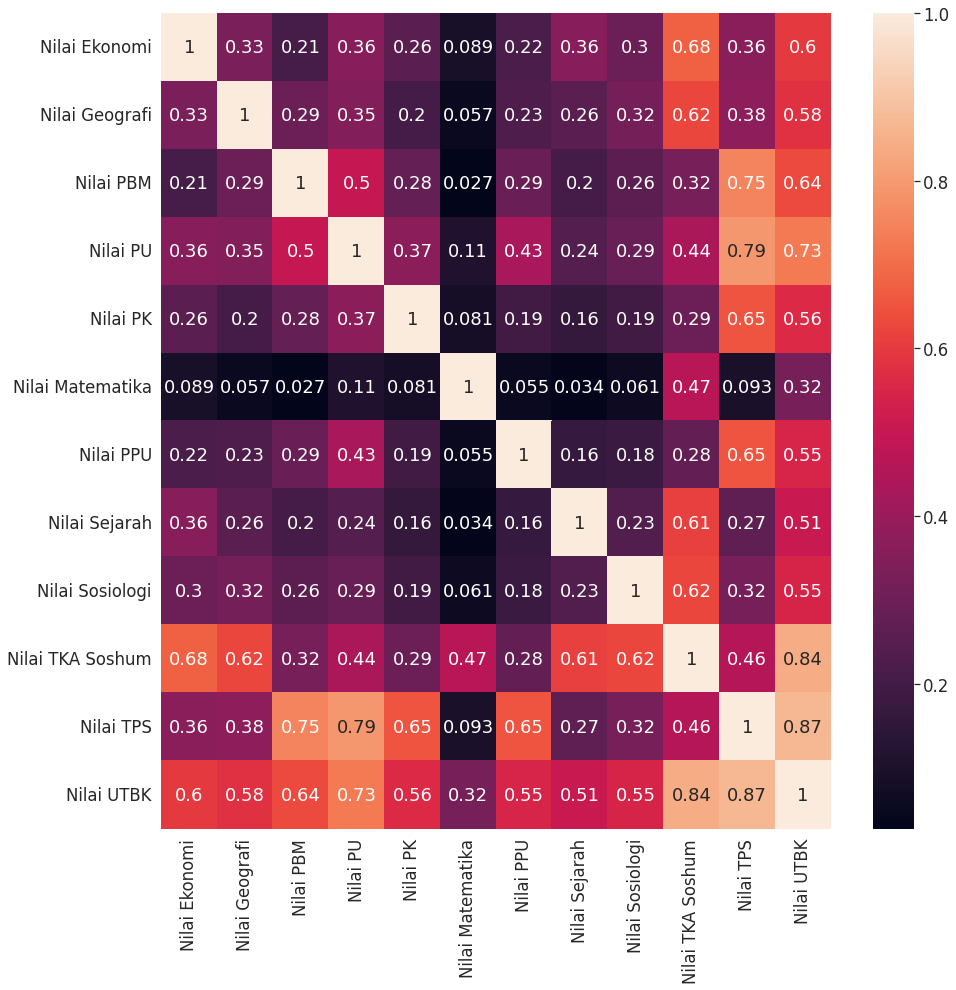

In [88]:
nilai_soshum = ['Nilai Ekonomi', 'Nilai Geografi',	'Nilai PBM',	'Nilai PU',	'Nilai PK',	'Nilai Matematika',	'Nilai PPU',	'Nilai Sejarah',	'Nilai Sosiologi',	'Nilai TKA Soshum',	'Nilai TPS',	'Nilai UTBK']

corr_matrix = score_humanities_df[nilai_soshum].corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(ax = ax, data = corr_matrix, annot = True)
ax.set_yticklabels(corr_matrix,rotation = 0)
plt.show()

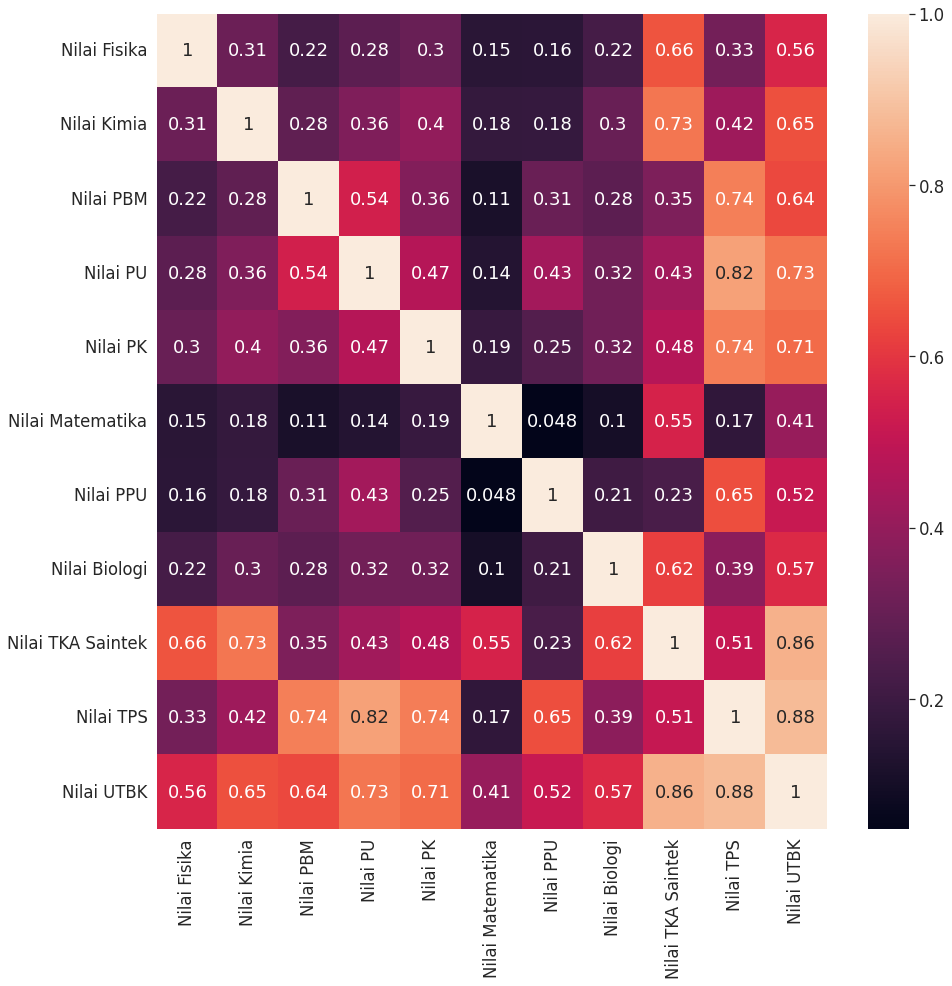

In [89]:
nilai_saintek = ['Nilai Fisika', 'Nilai Kimia',	'Nilai PBM',	'Nilai PU',	'Nilai PK',	'Nilai Matematika',	'Nilai PPU',	'Nilai Biologi',	'Nilai TKA Saintek',	'Nilai TPS',	'Nilai UTBK']

corr_matrix = score_science_df[nilai_saintek].corr()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(ax = ax, data = corr_matrix, annot = True)
ax.set_yticklabels(corr_matrix,rotation = 0)
plt.show()

Kita bisa melihat bahwa hasil dari matriks korelasi semua bernilai positif, namun tidak semua memiliki korelasi linier yang cukup baik. Jika kita lihat bahwa ada beberapa data yang memiliki korelasi lebih dari 0,5. Sebagai contoh, nilai TKA saintek memiliki korelasi paling kuat dengan nilai kimia dengan korelasi Pearson sebesar 0,73, dilanjutkan fisika dengan korelasi Pearson sebesar 0,65 dan biologi dengan korelasi Pearson sebesar 0,62. Mengapa kimia? Ada kemungkinan bahwa kimia adalah pelajaran TKA saintek yang paling umum dan lebih sederhana ketimbang matematika. Berbeda dengan fisika yang dikuasai oleh peserta yang berminat di bidang teknik, dan biologi dikuasai oleh peserta yang berminat di bidang medis, sedangkan bidang teknik maupun medis tetaplah butuh kimia. Inilah kenapa memungkinkan bahwa kemampuan TKA Saintek peserta berkorelasi dengan kimia secara cukup kuat. Semangat dan kemampuan belajar kimia akan meningkatkan semangat dan kemampuan belajar mata pelajaran lain yang dapat meningkatkan nilai TKA Saintek.

Sedangkan nilai TPS Saintek sangat berkorelasi kuat dengan nilai PU dengan nilai korelasi 0,82 dilanjutkan oleh nilai PBM dan nilai PK dengan nilai korelasi 0,74. PBM adalah pemahaman bacaan dan menulis, sedangkan PK adalah pengetahuan kuantitatif. PU adalah penalaran umum yang berfokus dengan metode penalaran. Ini memang secara teori sangat memengaruhi nilai TPS yang bersifat skolastik. Kekuatan peserta dalam PU juga akan memengaruhi baik tidaknya nilai TPS secara keseluruhan, meskipun tidak ada korelasi langsung yang kuat antara PU dengan PBK, PK, atau PPU. 

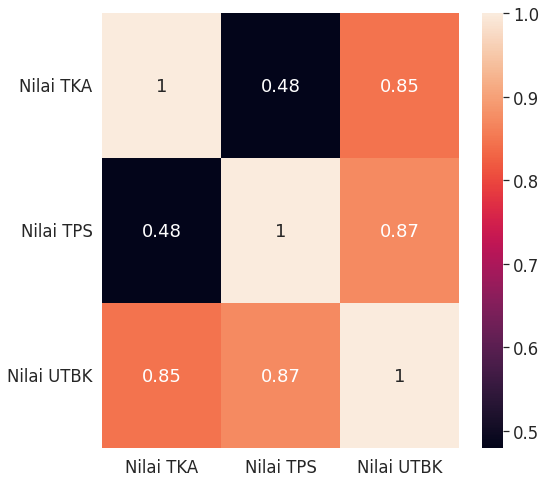

In [90]:
nilai_total = ['Nilai TKA',	'Nilai TPS',	'Nilai UTBK']

corr_matrix = score_utbk_total_df[nilai_total].corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(ax = ax, data = corr_matrix, annot = True)
ax.set_yticklabels(corr_matrix,rotation = 0)
plt.show()

Tentu saja nilai TPS dan TKA berkorelasi dengan nilai akhir UTBK. Namun menariknya adalah bahwa nilai TKA dan TPS memiliki korelasi yang cukup rendah, atau bahkan terlihat tidak berkorelasi. Ini mengimplikasikan bahwa peserta yang kuat di TKA belum tentu kuat di TPS begitupula sebaliknya, peserta yang kuat di TPS belum tentu kuat di TKA. TPS berisi pemahaman logis dalam suatu permasalahan. Soal-soal TPS tidaklah bersifat menghafal, namun lebih khusus untuk analisis permasalahan dan mencari pola dari soal yang diberikan. Berbeda dengan TKA, meski terdapat bagian analisis, namun dalam TKA kita perlu memiliki pemahaman konsep materi yang diujikan, dan menggunakan rumus atau hafalan jawaban pasti, tidak mencari pola secara mandiri seperti di TPS. Itulah sebabnya nilai TKA peserta tidak berkorelasi kuat dengan nilai TPSnya.

# Seleksi
----

Dalam bagian ini kita akan mencari tingkat persaingan peserta untuk mendapatkan kursi di jurusan dan kampus pilihan impian mereka. Kita akan mencari berapa kemungkinan keberhasilan peserta dan mengetahui apakah siswa berhasil di pilihan pertama atau kedua atau bahkan gagal dalam seleksi. Kita juga akan menghitung nilai ambang kelulusan (passing grade).

Namun dalam seleksi, kita harus mengetahui bahwa semua ID Jurusan memiliki tujuh digit angka, maka dari itu, peserta yang memilih jurusan dengan ID kurang dari 7 angka akan secara otomatis gagal.

In [91]:
Jumlah_ID_Jurusan = univ_maj_df['ID Jurusan'].astype(str).str.count('\d')
Jumlah_ID_Jurusan.head()

0    7
1    7
2    7
3    7
4    7
Name: ID Jurusan, dtype: int64

In [92]:
#Kita akan melihat bahwa tidak ada juruasn dengan id kurang dari 7 angka
Jumlah_ID_Jurusan[Jumlah_ID_Jurusan != 7]

Series([], Name: ID Jurusan, dtype: int64)

In [93]:
score_utbk_total_df.reset_index(drop = True, inplace = True)
univ_maj_df.reset_index(drop = True, inplace = True)
score_utbk_total_df['Hasil'] = ''

for x in score_utbk_total_df[score_utbk_total_df['Pilihan Jurusan'].astype(str).str.count('\d') != 7].index:
  score_utbk_total_df.at[x,'Hasil'] = 'Gagal'

score_utbk_total_df[score_utbk_total_df['Pilihan Jurusan'].astype(str).str.count('\d') != 7].sample(5)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  \
195464              253                    9      150201      437.8   
108739             1025                   33       99120      582.0   
187410             2333                   67       99695      490.2   
22169              1496                   46       99120      582.0   
248612             2329                   67       99695      490.2   

        Nilai TPS  Nilai UTBK Rumpun Bidang  Pilihan Nama Pilihan Jurusan  \
195464     491.75     464.775    humanities  Pertama                  NaN   
108739     627.75     604.875       science    Kedua                  NaN   
187410     464.75     477.475    humanities  Pertama                  NaN   
22169      627.75     604.875       science  Pertama                  NaN   
248612     464.75     477.475    humanities    Kedua                  NaN   

       Nama Pilihan Universitas  Kapasitas UTBK 2019  Hasil  
195464                      NaN                    0  Gagal  
108739                      NaN                    0  Gagal  
187410                      NaN                    0  Gagal  
22169                       NaN                    0  Gagal  
248612                      NaN                    0  Gagal

In [94]:
#
JumlahGagal = len(score_utbk_total_df[score_utbk_total_df['Hasil'] == 'Gagal']['Hasil'])
print('Jumlah peserta gagal karena pilihan jurusannya tidak valid ada ' + str(JumlahGagal) + ' peserta')

Jumlah peserta gagal karena pilihan jurusannya tidak valid ada 10 peserta


### Passing Grade Inisial

In [95]:
univ_maj_df['Kapasitas Sisa'] = univ_maj_df['Kapasitas UTBK 2019']
def passing_grade(ID_jurusan):
  return score_utbk_total_df[(score_utbk_total_df['Pilihan Jurusan'] == ID_jurusan) & (score_utbk_total_df['Hasil'] == '')].nlargest(univ_maj_df.loc[univ_maj_df.index[univ_maj_df['ID Jurusan'] == ID_jurusan],'Kapasitas Sisa'].item(), 'Nilai UTBK')['Nilai UTBK'].min()

univ_maj_df['Passing Grade'] = univ_maj_df['ID Jurusan'].apply(lambda x: passing_grade(x))

univ_maj_df.sort_values('Passing Grade').head()

ID Jurusan  ID Universitas Rumpun Bidang  Nama Jurusan  Kapasitas Total  \
3114     1432072             143    humanities    SENI MURNI               18   
2682     7222237             722    humanities          PGSD              128   
532      1612015             161    humanities    ILMU HUKUM              225   
2742     7411041             741       science  TEKNIK SIPIL              143   
87       1122074             112    humanities   ANTROPOLOGI               48   

                Nama Universitas  Kapasitas UTBK 2019  \
3114          ISI PADANG PANJANG                    7   
2682   UNIVERSITAS NEGERI MANADO                   51   
532         UNIVERSITAS BENGKULU                   90   
2742  UNIVERSITAS SULAWESI BARAT                   57   
87      UNIVERSITAS MALIKUSSALEH                   19   

                                Jurusan(Kampus)  Kapasitas Sisa  Passing Grade  
3114            SENI MURNI (ISI PADANG PANJANG)               7        300.000  
2682           PGSD (UNIVERSITAS NEGERI MANADO)              51        339.875  
532           ILMU HUKUM (UNIVERSITAS BENGKULU)              90        347.025  
2742  TEKNIK SIPIL (UNIVERSITAS SULAWESI BARAT)              57        357.000  
87       ANTROPOLOGI (UNIVERSITAS MALIKUSSALEH)              19        363.975

Seleksi Berdasar Pilihan
----
Untuk melakukan seleksi, kita memerlukan beberapa tahap. Sebelumnya kita telah mendefinisikan nilai awal passing grade, dengan menggunakan passing grade tersebut, kita akan menyeleksi berdasarkan pilihan pertama terlebih dahulu. Jika peserta telah lolos seleksi pertama untuk pilihan pertama, maka siswa tidak perlu mengikuti seleksi pilihan kedua. Setelah seleksi pilihan pertama selesai, dilanjutkan seleksi pilihan kedua. Setelah seleksi tahap pertama selesai, kita melihat bahwa jurusan masih memiliki sisa kapasitas karena banyak pemilih yang seharusnya lolos pada pilihan kedua ternyata sudah lulus di pilihan pertama di jurusan dan kampus lain. Maka dari itu kita harus menurunkan passing gradenya. Passing grade diturunkan menjadi nilai terkecil skor UTBK dari peserta yang belum lulus sejumlah kapasitas sisanya dan peserta tersebut akan mengikuti seleksi tahap kedua. Ini dapat dilakukan terus menerus, namun hasil percobaan kita cukup melakukannya sebanyak lima kali putaran untuk mendapatkan hasil yang tepat.

Dalam bagian ini akan ada kasus dimana terdapat beberapa peserta yang memiliki nilai tepat sama di nilai terendah syarat masuk. Penulis masih belum menemukan solusi dari permasalahan ini dari pihak resmi utbk. Namun untuk sementara kasus-kasus ini akan dianggap lolos semua.

In [96]:
univ_maj_df = pd.merge(univ_maj_df,major_univ_choice_df[['ID Jurusan', 'Jumlah Pemilih']], on = 'ID Jurusan')


In [97]:

# Menghilangkan Jurusan dengan Nol Pemilih
univ_maj_df = univ_maj_df[univ_maj_df['Jumlah Pemilih']!=0].sort_values('Passing Grade', ascending = False).reset_index(drop = True)
univ_maj_df.head()

#dan membuat kolom selisih pemilih dan kapasitas, lalu kita dapat melakukan drop yang tidak diperlukan, 
#seperti kapasitas total, ID Univ, nama Univ dan Nama Jurusan
univ_maj_df['Selisih Pemilih dan Kapasitas'] = univ_maj_df['Kapasitas UTBK 2019'] - univ_maj_df['Jumlah Pemilih']
univ_maj_df.drop(columns = ['ID Universitas', 'Nama Jurusan', 'Kapasitas Total', 'Nama Universitas'], inplace = True)
univ_maj_df.head()

ID Jurusan Rumpun Bidang  Kapasitas UTBK 2019  \
0     3211015       science                   28   
1     3611066       science                   31   
2     3211313       science                    8   
3     3551333       science                    5   
4     3321081       science                   57   

                                     Jurusan(Kampus)  Kapasitas Sisa  \
0          PENDIDIKAN DOKTER (UNIVERSITAS INDONESIA)              28   
1               KEDOKTERAN (UNIVERSITAS GADJAH MADA)              31   
2                   AKTUARIA (UNIVERSITAS INDONESIA)               8   
3           KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)               5   
4  FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GAN...              57   

   Passing Grade  Jumlah Pemilih  Selisih Pemilih dan Kapasitas  
0        752.125             729                           -701  
1        731.375             527                           -496  
2        727.375             204                           -196  
3        721.750             190                           -185  
4        719.125             413                           -356

In [98]:
#Kita akan melakukan seleksi sebanyak 5 putaran karena setelah dilakukan percobaan mengganti jumlah putaran, pada putaran kelima telah selesai
for i in range(1,6):
  univ_maj_notfinish_df = univ_maj_df.loc[(univ_maj_df['Kapasitas Sisa']>0) & (univ_maj_df['Selisih Pemilih dan Kapasitas'] != univ_maj_df['Kapasitas Sisa'])]
  univ_maj_finish_df = univ_maj_df.loc[(univ_maj_df['Kapasitas Sisa'] <= 0) | (univ_maj_df['Selisih Pemilih dan Kapasitas'] == univ_maj_df['Kapasitas Sisa'])]
  univ_maj_notfinish_df.drop(columns = 'Passing Grade', inplace = True)
  univ_maj_notfinish_df['Passing Grade'] = univ_maj_notfinish_df['ID Jurusan'].apply(lambda x: passing_grade(x))
  univ_maj_df = pd.concat([univ_maj_notfinish_df, univ_maj_finish_df], ignore_index = True)
  print('Seleksi putaran ke ' + str(i))
  for x in score_utbk_total_df.index:
    if score_utbk_total_df.loc[x,'Hasil'] == '':
      Pilihan = score_utbk_total_df.loc[x,'Pilihan Jurusan'].item()
      Passing_Grade = univ_maj_df.loc[univ_maj_df[univ_maj_df['ID Jurusan']==Pilihan].index,'Passing Grade'].item()
      if score_utbk_total_df.loc[x,'Pilihan'] == 'Pertama':
        if score_utbk_total_df.at[x, 'Nilai UTBK'] >= Passing_Grade:
          score_utbk_total_df.at[x,'Hasil'] = 'Lolos Pilihan Pertama'
          univ_maj_df.at[univ_maj_df[univ_maj_df['ID Jurusan']==Pilihan].index.item(), 'Kapasitas Sisa'] -= 1
  for x in score_utbk_total_df.index:
    if score_utbk_total_df.loc[x,'Hasil'] == '':
      Pilihan = score_utbk_total_df.loc[x,'Pilihan Jurusan'].item()
      Passing_Grade = univ_maj_df.loc[univ_maj_df[univ_maj_df['ID Jurusan']==Pilihan].index,'Passing Grade'].item()
      if score_utbk_total_df.loc[x,'Pilihan'] == 'Kedua':
        if score_utbk_total_df.at[x, 'Nilai UTBK'] >= Passing_Grade:
          score_utbk_total_df.at[x,'Hasil'] = 'Lolos Pilihan Kedua'
          univ_maj_df.at[univ_maj_df[univ_maj_df['ID Jurusan']==Pilihan].index.item(), 'Kapasitas Sisa'] -= 1


Seleksi putaran ke 1


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Seleksi putaran ke 2
Seleksi putaran ke 3
Seleksi putaran ke 4
Seleksi putaran ke 5


Selanjutnya memberikan label kepada peserta yang tidak lolos UTBK 2019

In [99]:
for x in score_utbk_total_df[score_utbk_total_df['Hasil'] == '']['Hasil'].index:
   score_utbk_total_df.at[x,'Hasil']= 'Gagal'
score_utbk_total_df.sample(10)

Pilihan Jurusan  Pilihan Universitas  ID Peserta  Nilai TKA  \
21781           3811037                  381       97381     454.00   
156865          3411242                  341      281696     470.25   
281203          3722081                  372      270993     543.80   
28836           3611333                  361      122464     524.25   
203779          3622242                  362      198300     672.40   
108358          3611333                  361       97433     507.25   
46795           3721232                  372      197149     542.75   
248411          3422077                  342       98490     516.20   
134919          1921041                  192      201888     545.25   
120209          3711075                  371      140927     480.50   

        Nilai TPS  Nilai UTBK Rumpun Bidang  Pilihan  \
21781      643.00     548.500       science  Pertama   
156865     409.00     439.625       science    Kedua   
281203     567.00     555.400    humanities    Kedua   
28836      596.50     560.375       science  Pertama   
203779     451.25     561.825    humanities  Pertama   
108358     598.75     553.000       science    Kedua   
46795      500.75     521.750       science  Pertama   
248411     403.50     459.850    humanities    Kedua   
134919     573.00     559.125       science    Kedua   
120209     432.00     456.250       science    Kedua   

                 Nama Pilihan Jurusan       Nama Pilihan Universitas  \
21781             PENDIDIKAN APOTEKER          UNIVERSITAS AIRLANGGA   
156865          TEKNOLOGI HASIL HUTAN       INSTITUT PERTANIAN BOGOR   
281203                ILMU KOMUNIKASI          UNIVERSITAS BRAWIJAYA   
28836                      ARSITEKTUR        UNIVERSITAS GADJAH MADA   
203779  PENDIDIKAN GURU SEKOLAH DASAR  UNIVERSITAS NEGERI YOGYAKARTA   
108358                     ARSITEKTUR        UNIVERSITAS GADJAH MADA   
46795      GIZI KESEHATAN / ILMU GIZI          UNIVERSITAS BRAWIJAYA   
248411                      MANAJEMEN          UNIVERSITAS SILIWANGI   
134919               TEKNIK GEOFISIKA    INSTITUT TEKNOLOGI SUMATERA   
120209               TEKNIK PERTANIAN             UNIVERSITAS JEMBER   

        Kapasitas UTBK 2019                Hasil  
21781                    40                Gagal  
156865                   12                Gagal  
281203                   33                Gagal  
28836                    14                Gagal  
203779                   44                Gagal  
108358                   14                Gagal  
46795                    19                Gagal  
248411                   38                Gagal  
134919                   40  Lolos Pilihan Kedua  
120209                   22                Gagal

In [100]:
univ_maj_df

ID Jurusan Rumpun Bidang  Kapasitas UTBK 2019  \
0        3211015       science                   28   
1        3611066       science                   31   
2        3211313       science                    8   
3        3551333       science                    5   
4        3321081       science                   57   
...          ...           ...                  ...   
3017     1122074    humanities                   19   
3018     7411041       science                   57   
3019     1612015    humanities                   90   
3020     7222237    humanities                   51   
3021     1432072    humanities                    7   

                                        Jurusan(Kampus)  Kapasitas Sisa  \
0             PENDIDIKAN DOKTER (UNIVERSITAS INDONESIA)               0   
1                  KEDOKTERAN (UNIVERSITAS GADJAH MADA)               0   
2                      AKTUARIA (UNIVERSITAS INDONESIA)               0   
3              KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)               0   
4     FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GAN...               0   
...                                                 ...             ...   
3017             ANTROPOLOGI (UNIVERSITAS MALIKUSSALEH)              12   
3018          TEKNIK SIPIL (UNIVERSITAS SULAWESI BARAT)              54   
3019                  ILMU HUKUM (UNIVERSITAS BENGKULU)              27   
3020                   PGSD (UNIVERSITAS NEGERI MANADO)              48   
3021                    SENI MURNI (ISI PADANG PANJANG)               2   

      Jumlah Pemilih  Selisih Pemilih dan Kapasitas  Passing Grade  
0                729                           -701        752.125  
1                527                           -496        731.375  
2                204                           -196        727.375  
3                190                           -185        721.750  
4                413                           -356        719.125  
...              ...                            ...            ...  
3017               7                             12        363.975  
3018               3                             54        357.000  
3019              63                             27        347.025  
3020               3                             48        339.875  
3021               5                              2        300.000  

[3022 rows x 8 columns]

## Hasil Seleksi
----
Dalam bagian ini kita dapat mendapatkan kesimpulan hasil seleksi UTBK 2019. Kita akan melihat distribusi passing Grade untuk masing-masing jurusan dan kampus dan juga distribusi peserta berhasil dan gagal

### Passing Grade
---
Hasil seleksi pertama adalah passing grade. Dalam bagian ini kita akan melihat distribusi passing grade dalam seleksi UTBK 2019

In [101]:
univ_maj_df

ID Jurusan Rumpun Bidang  Kapasitas UTBK 2019  \
0        3211015       science                   28   
1        3611066       science                   31   
2        3211313       science                    8   
3        3551333       science                    5   
4        3321081       science                   57   
...          ...           ...                  ...   
3017     1122074    humanities                   19   
3018     7411041       science                   57   
3019     1612015    humanities                   90   
3020     7222237    humanities                   51   
3021     1432072    humanities                    7   

                                        Jurusan(Kampus)  Kapasitas Sisa  \
0             PENDIDIKAN DOKTER (UNIVERSITAS INDONESIA)               0   
1                  KEDOKTERAN (UNIVERSITAS GADJAH MADA)               0   
2                      AKTUARIA (UNIVERSITAS INDONESIA)               0   
3              KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)               0   
4     FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GAN...               0   
...                                                 ...             ...   
3017             ANTROPOLOGI (UNIVERSITAS MALIKUSSALEH)              12   
3018          TEKNIK SIPIL (UNIVERSITAS SULAWESI BARAT)              54   
3019                  ILMU HUKUM (UNIVERSITAS BENGKULU)              27   
3020                   PGSD (UNIVERSITAS NEGERI MANADO)              48   
3021                    SENI MURNI (ISI PADANG PANJANG)               2   

      Jumlah Pemilih  Selisih Pemilih dan Kapasitas  Passing Grade  
0                729                           -701        752.125  
1                527                           -496        731.375  
2                204                           -196        727.375  
3                190                           -185        721.750  
4                413                           -356        719.125  
...              ...                            ...            ...  
3017               7                             12        363.975  
3018               3                             54        357.000  
3019              63                             27        347.025  
3020               3                             48        339.875  
3021               5                              2        300.000  

[3022 rows x 8 columns]

In [102]:
univ_maj_df.sort_values(by = 'Passing Grade', ascending = False, inplace = True)
univ_maj_df.head()

ID Jurusan Rumpun Bidang  Kapasitas UTBK 2019  \
0     3211015       science                   28   
1     3611066       science                   31   
2     3211313       science                    8   
3     3551333       science                    5   
4     3321081       science                   57   

                                     Jurusan(Kampus)  Kapasitas Sisa  \
0          PENDIDIKAN DOKTER (UNIVERSITAS INDONESIA)               0   
1               KEDOKTERAN (UNIVERSITAS GADJAH MADA)               0   
2                   AKTUARIA (UNIVERSITAS INDONESIA)               0   
3           KEDOKTERAN GIGI (UNIVERSITAS DIPONEGORO)               0   
4  FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GAN...               0   

   Jumlah Pemilih  Selisih Pemilih dan Kapasitas  Passing Grade  
0             729                           -701        752.125  
1             527                           -496        731.375  
2             204                           -196        727.375  
3             190                           -185        721.750  
4             413                           -356        719.125

Text(0.5, 1.0, 'Distribusi Jurusan dengan Passing Grade Tertinggi')

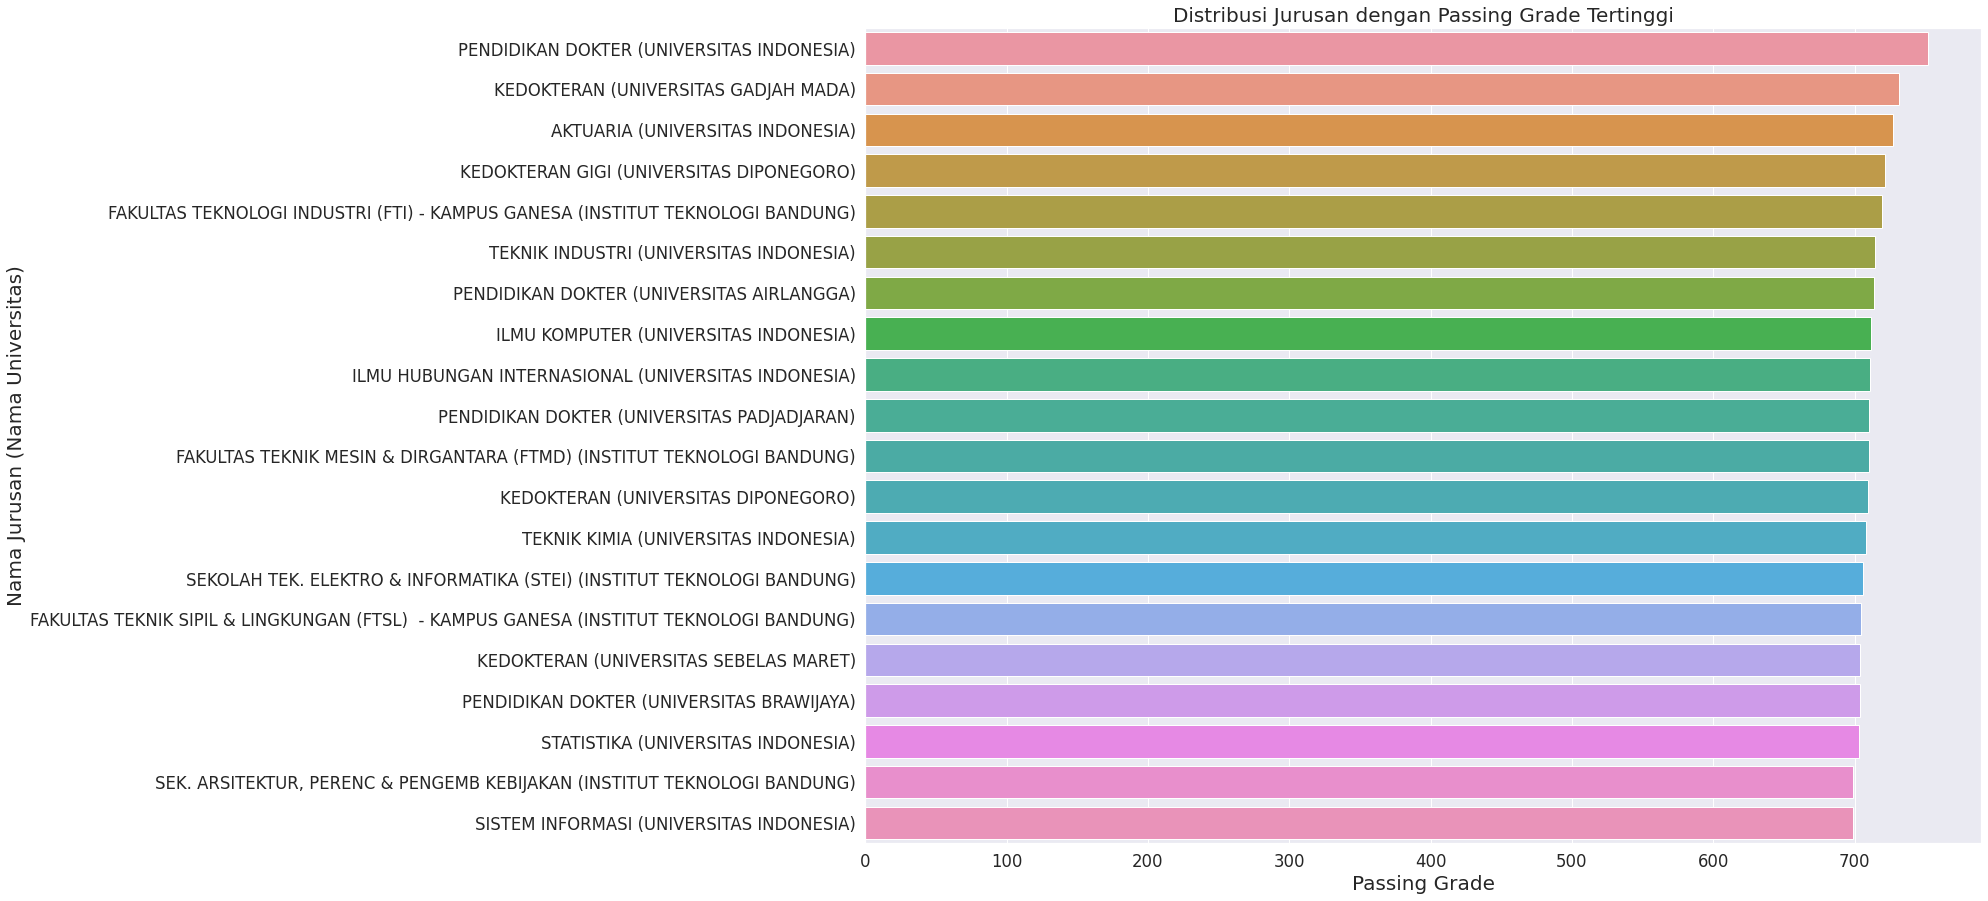

In [103]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df[0:20], x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Passing Grade', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan dengan Passing Grade Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan dengan Passing Grade Terendah')

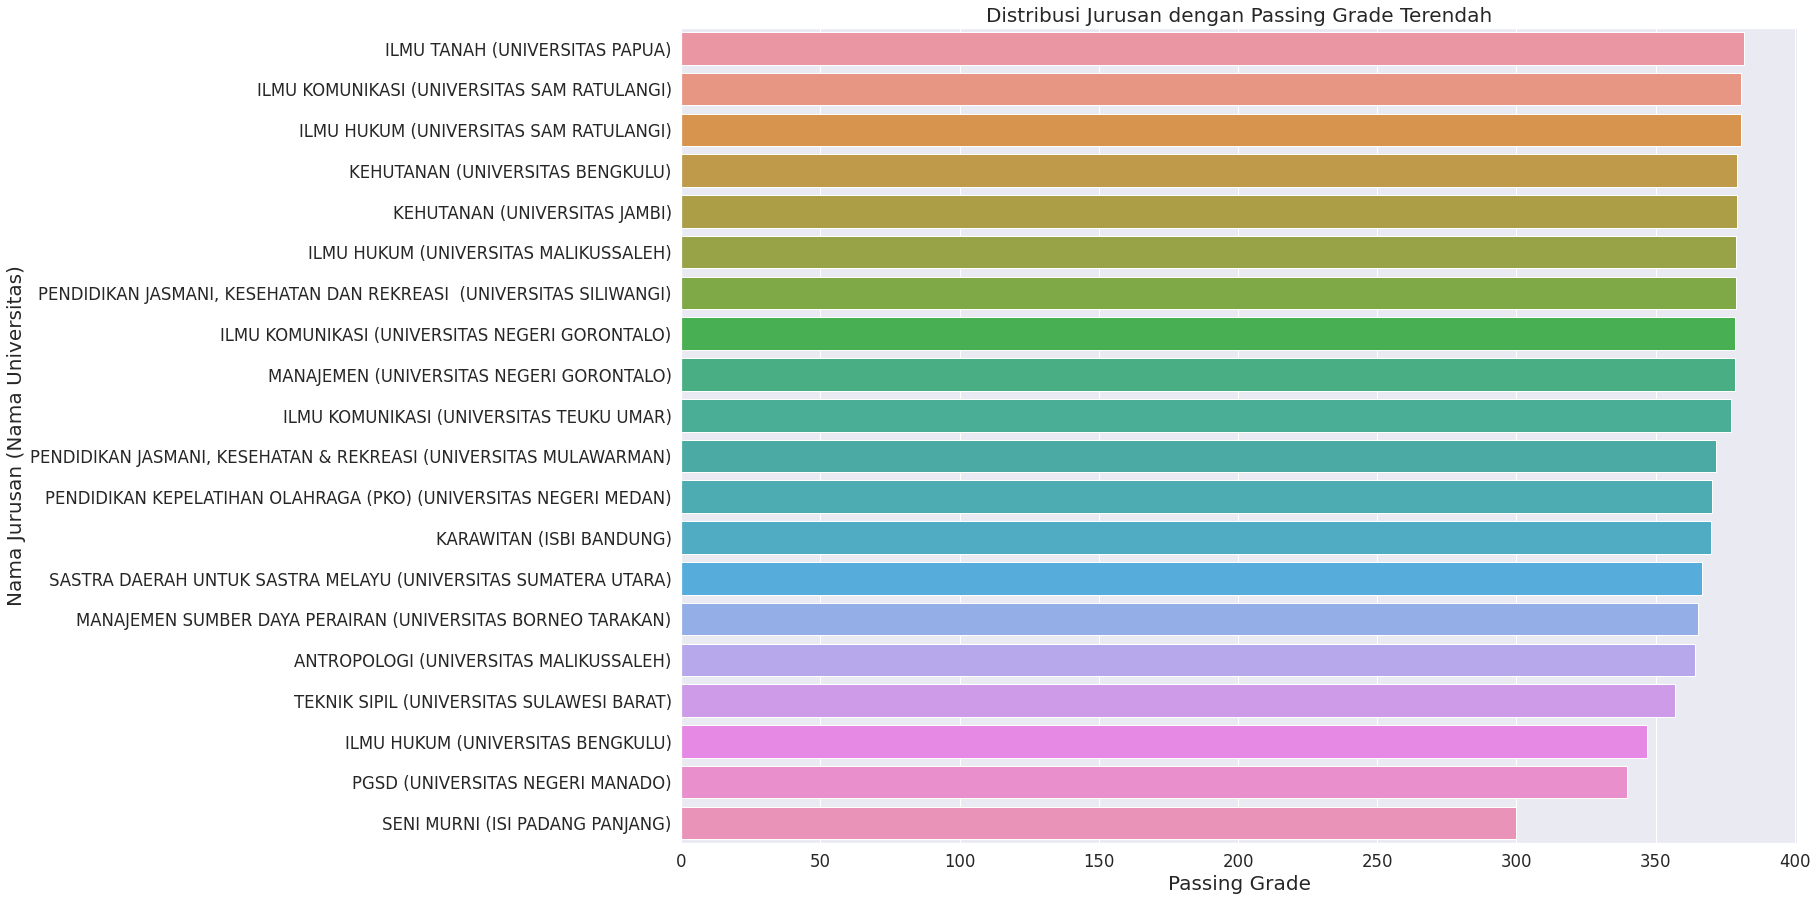

In [104]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df.tail(20), x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Passing Grade', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan dengan Passing Grade Terendah', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Soshum dengan Passing Grade Tertinggi')

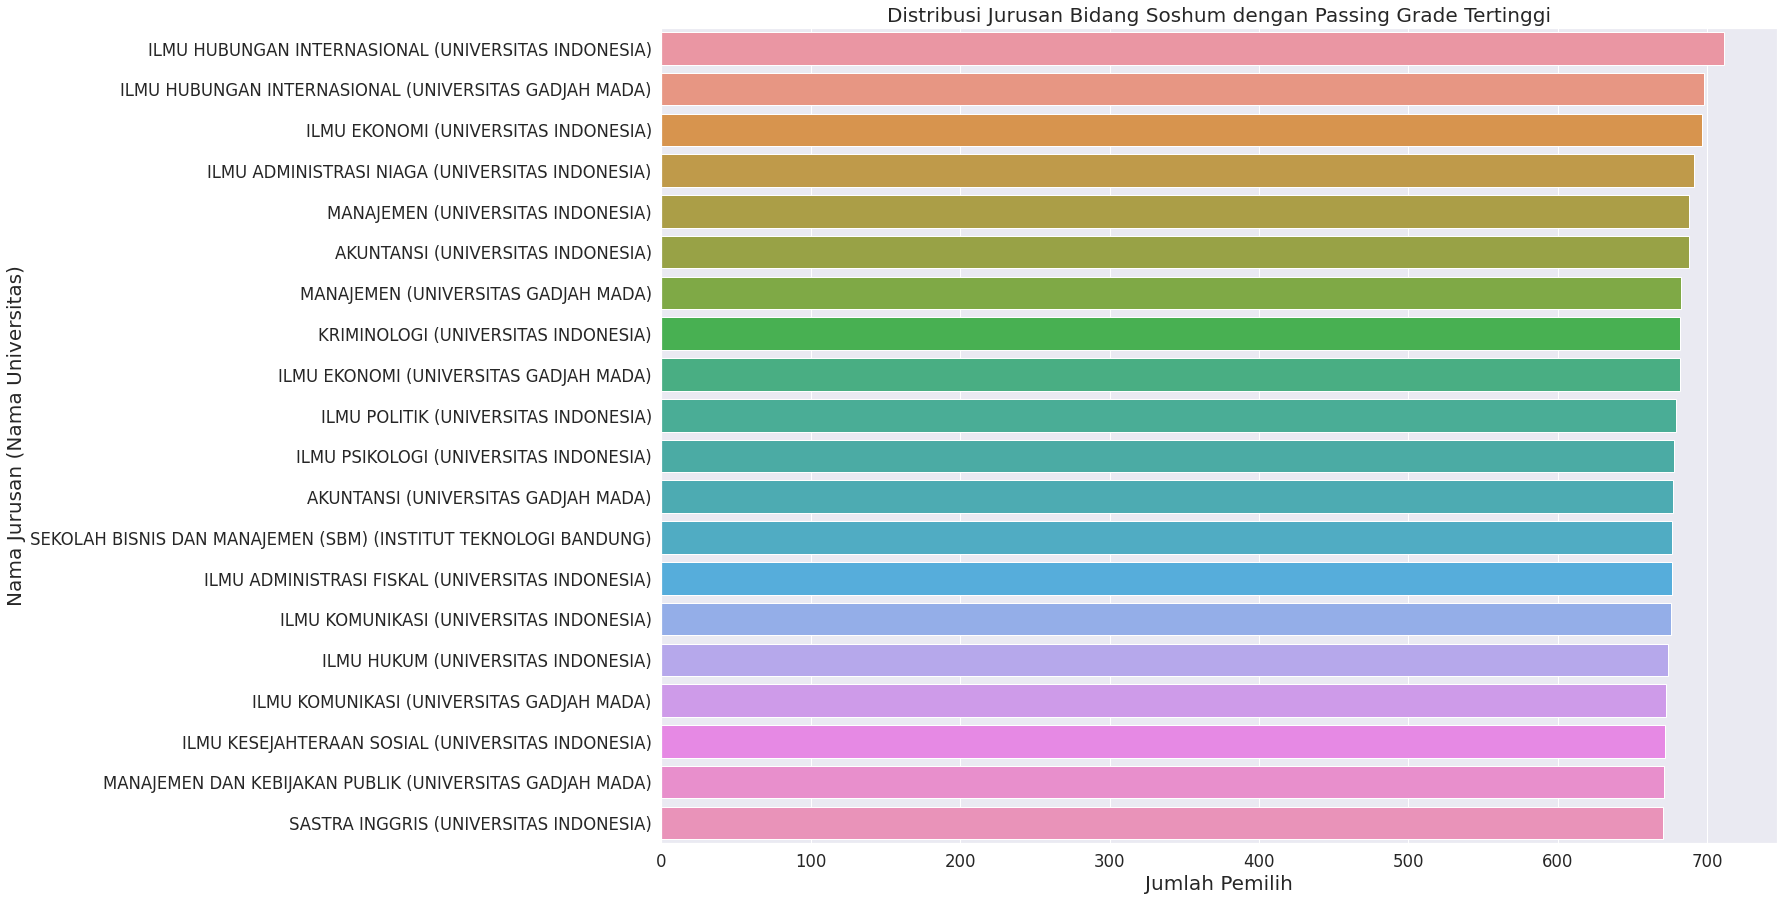

In [105]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df[univ_maj_df['Rumpun Bidang'] == 'humanities'][0:20], x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Soshum dengan Passing Grade Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Soshum dengan Passing Grade Terendah')

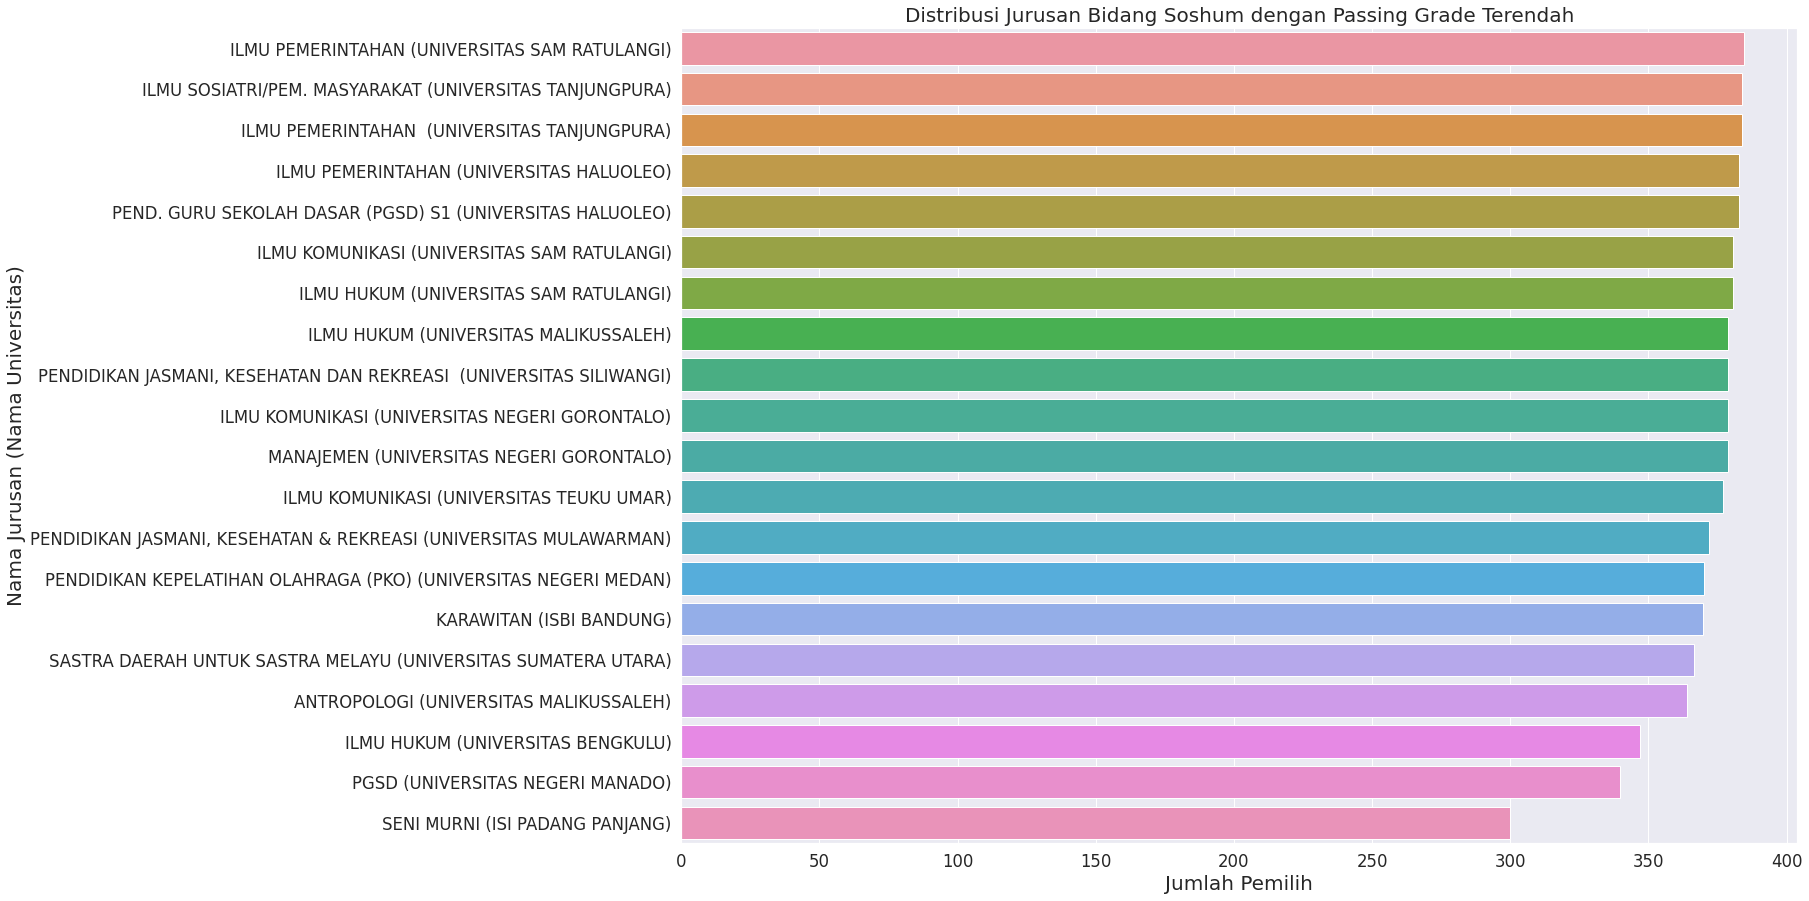

In [106]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df[univ_maj_df['Rumpun Bidang'] == 'humanities'].tail(20), x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Soshum dengan Passing Grade Terendah', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Saintek dengan Passing Grade Tertinggi')

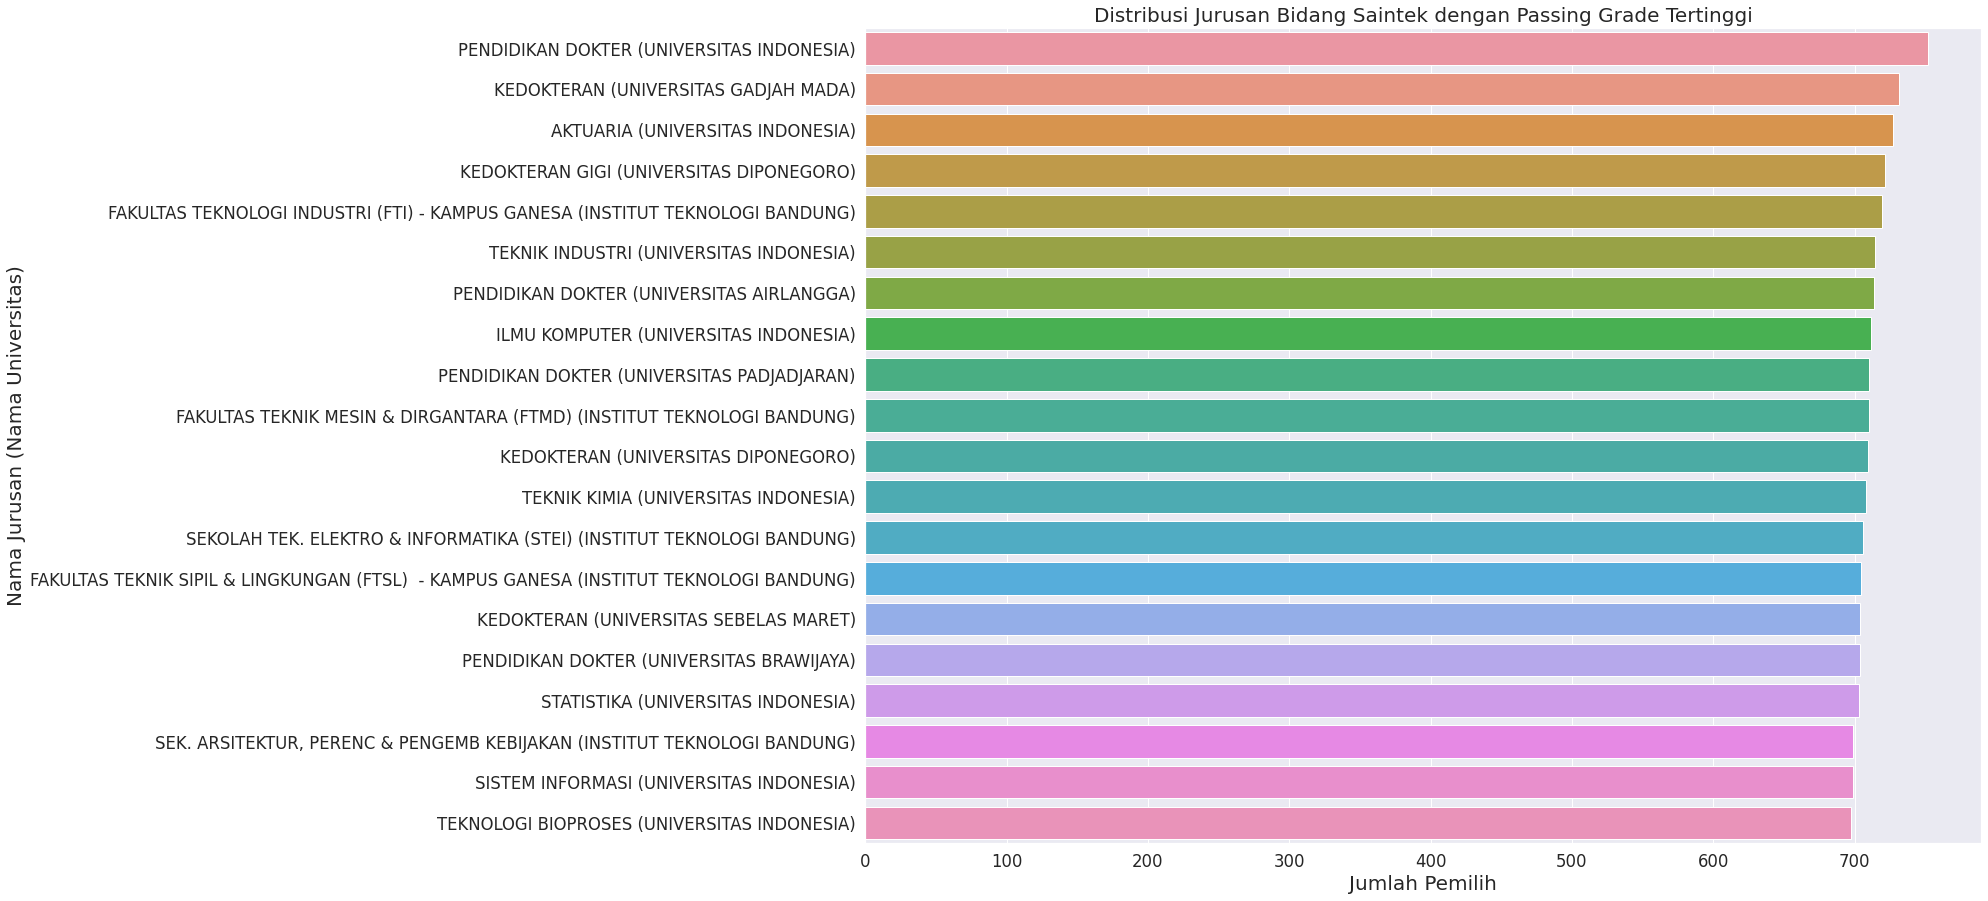

In [107]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df[univ_maj_df['Rumpun Bidang'] == 'science'][0:20], x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Saintek dengan Passing Grade Tertinggi', fontsize = 20)

Text(0.5, 1.0, 'Distribusi Jurusan Bidang Saintek dengan Passing Grade Terendah')

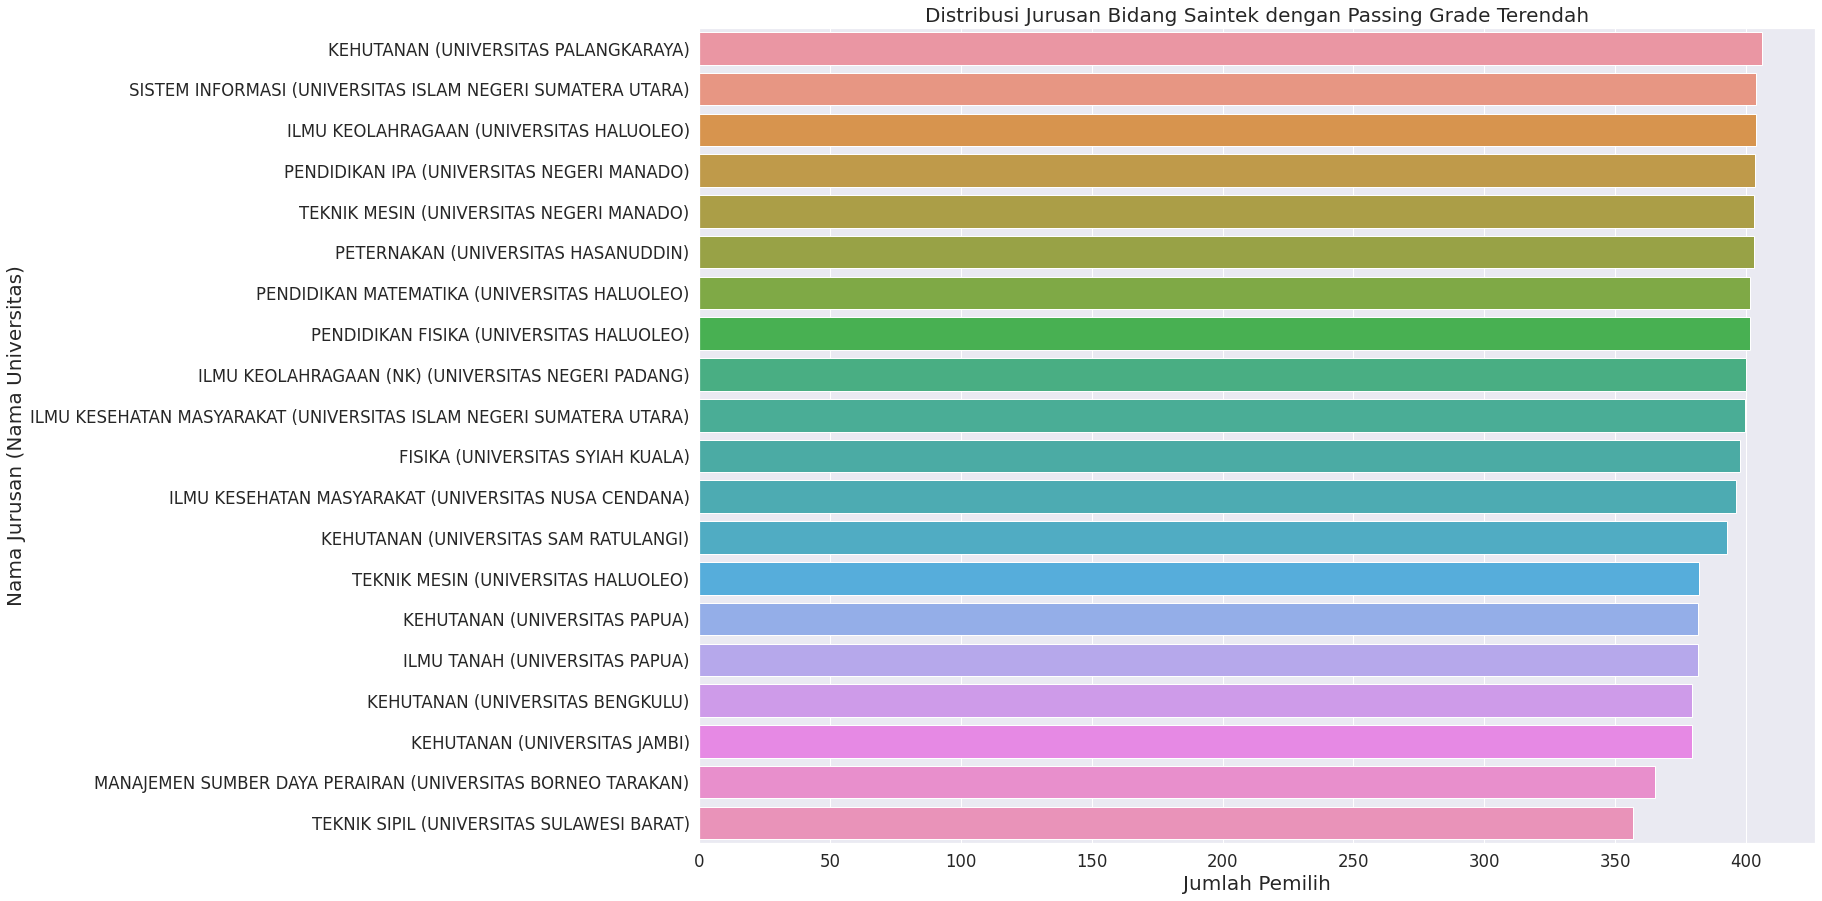

In [108]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
sns.barplot(data=univ_maj_df[univ_maj_df['Rumpun Bidang'] == 'science'].tail(20), x='Passing Grade', y='Jurusan(Kampus)')
plt.xlabel('Jumlah Pemilih', fontsize = 20)
plt.ylabel('Nama Jurusan (Nama Universitas)', fontsize = 20)
plt.title('Distribusi Jurusan Bidang Saintek dengan Passing Grade Terendah', fontsize = 20)

### Peserta Lolos dan Gagal
----
Dalam bagian ini kita akan membahas distribusi lolos atau tidaknya peserta UTBK 2019

In [109]:
#Ingat untuk peserta gagal berarti gagal dalam kedua pilihan, maka dari itu jumlah harus dibagi dua
Jumlah_Gagal =int(0.5*len(score_utbk_total_df[score_utbk_total_df['Hasil'] == 'Gagal']['Hasil']))
Jumlah_Lolos_Pertama = len(score_utbk_total_df[score_utbk_total_df['Hasil'] == 'Lolos Pilihan Pertama'])
Jumlah_Lolos_Kedua = len(score_utbk_total_df[score_utbk_total_df['Hasil'] == 'Lolos Pilihan Kedua'])

print('Jumlah peserta yang lolos UTBK 2019 pada pilihan pertama adalah ' + str(Jumlah_Lolos_Pertama) + ' peserta')
print('Jumlah peserta yang lolos UTBK 2019 pada pilihan kedua adalah ' + str(Jumlah_Lolos_Kedua) + ' peserta')
print('Jumlah peserta yang tidak lolos UTBK 2019 adalah ' + str(Jumlah_Gagal) + ' peserta')

Jumlah peserta yang lolos UTBK 2019 pada pilihan pertama adalah 18576 peserta
Jumlah peserta yang lolos UTBK 2019 pada pilihan kedua adalah 31352 peserta
Jumlah peserta yang tidak lolos UTBK 2019 adalah 122808 peserta


In [110]:
Jumlah_Gagal+Jumlah_Lolos_Pertama,Jumlah_Lolos_Kedua

(141384, 31352)

Text(0.5, 1.0, 'Perbandingan Peserta Lolos dan Gagal Dalam UTBK 2019')

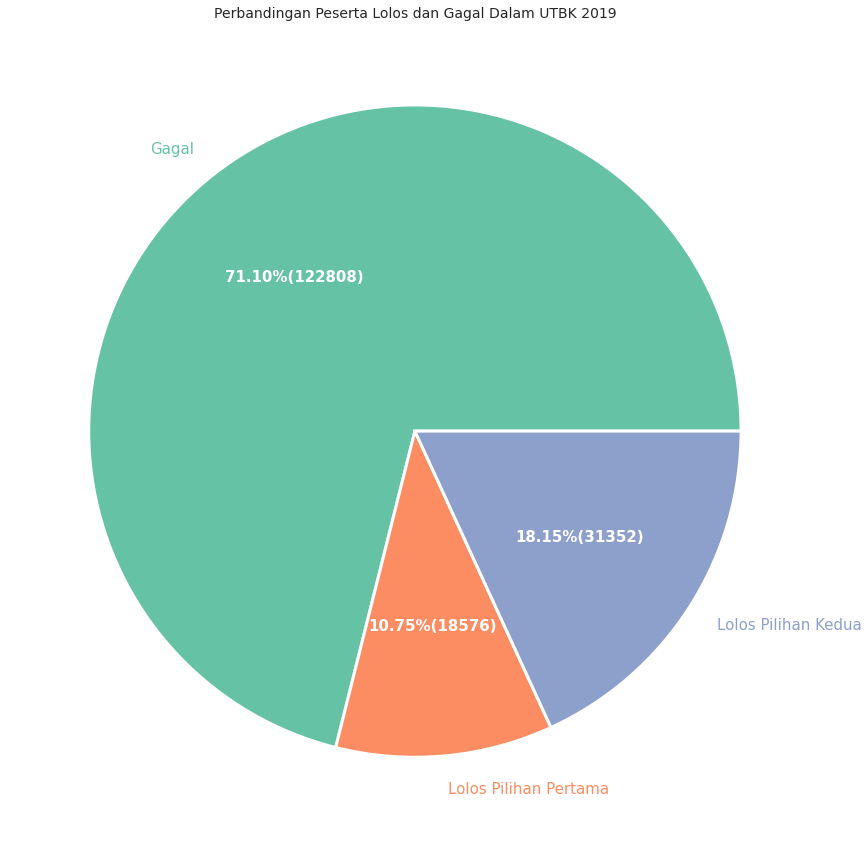

In [111]:
fig, ax = plt.subplots(figsize=(15, 15))

# Capture each of the return elements.
patches, texts, pcts = ax.pie(
    [Jumlah_Gagal, Jumlah_Lolos_Pertama, Jumlah_Lolos_Kedua], 
    labels = ['Gagal','Lolos Pilihan Pertama', 'Lolos Pilihan Kedua'],
    autopct = lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*(Jumlah_Gagal+Jumlah_Lolos_Pertama+Jumlah_Lolos_Kedua)),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 15},
    colors = sns.color_palette('Set2',3))
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Perbandingan Peserta Lolos dan Gagal Dalam UTBK 2019', fontsize=14)



# Referensi
---
[1] https://www.zenius.net/blog/cara-mengecek-nilai-utbk

[2] https://pahamify.com/blog/pahami-kampus/informasi-utbk-sbmptn/perbedaan-utbk-tahun-2019-dan-2020/

[3] https://itk.ac.id/skema-baru-seleksi-masuk-ptn-2019/#:~:text=Lebih%20lanjut%20Menteri%20Nasir%20menjelaskan,tampung%20tiap%20prodi%20di%20PTN.

[4] Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). The basic practice of statistics (6th ed.). New York, NY: W. H. Freeman and Company. Page (138).

[5] https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html

[6] https://www.webometrics.info/en/asia/indonesia%20

[7] https://www.kompas.com/edu/read/2022/08/18/090652371/5-fakultas-hukum-terbaik-di-indonesia-2022-dan-biaya-kuliahnya?page=all

[8] https://www.detik.com/edu/perguruan-tinggi/d-6198577/11-universitas-terbaik-di-indonesia-bidang-kedokteran-versi-the-aur-2022

[9] https://pddikti.kemdikbud.go.id/

[10] https://www.hotcourses.co.id/study-abroad-info/careers-prospects/masa-depan-menjanjikan-jurusan-agrikultur/

[11] https://campus.quipper.com/majors/id-peternakan
